In [1]:
############################################
########## My common Libraries #############
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import dates
import seaborn as sns
import datetime as datetime
#import scipy as sp
import statsmodels.api as sm
import sklearn
import random as r
###########################################
###########################################

############################################
##########  ignore warnings ################
import warnings
warnings.filterwarnings('ignore')
###########################################
############################################

#  Steps

### 1.) Abstract



### 2.) Introduction

[2.1] Intro

[2.2] Methodology


---


### 3.) Exploratory Data Analysis 

[3.1] Variable Identification 

[3.2] Univariate Analysis 

[3.3] Missing Data 

[3.4] Initial Observations 

---

### 4.) Feature Engineering

[4.1] Handling Missing Data  

[4.2] Variable Scaling

---

### 5.) Time Series Analysis

[5.1] Checking Assumptions

[A] Checking For Stationarity 

[B] Checking For Seasonality

[5.2] Transformations(Differencing)

[5.3] Train Test Split

[5.4] Model Building

[5.5] Model Diagnostics(Residual Analysis)

[5.6] Detecting Outliers

[5.7] Model Selection

[5.8] Forecasting

---

---

### 6.) Conclusion

---

### 7.) Weaknesses 

---



# $\color{red}{\textbf{1 Abstract}}$

# $\color{red}{\textbf{2 Introduction}}$

[2.1] (Intro) This step is done(check document)

[2.2] (Methodology) This step is done

# $\color{red}{\textbf{3 Exploratory Data Analysis}}$

In [2]:
#### Now eda begins ###

### upload data ###
EurUsd_data = pd.read_csv('EURUSD_daily.csv') # 00:00 --> 4:00 pm est --> 16:00:00
EurUsd_data = EurUsd_data.iloc[:-1 , :] # select all rows except last one

EurUsd_data.head()

Date  Time     Open     High      Low    Close  Volume
0  2012.01.02  0:00  1.29443  1.29681  1.29168  1.29338   40489
1  2012.01.03  0:00  1.29337  1.30762  1.29316  1.30509   82261
2  2012.01.04  0:00  1.30509  1.30719  1.28974  1.29361   80553
3  2012.01.05  0:00  1.29359  1.29434  1.27702  1.27904   92272
4  2012.01.06  0:00  1.27907  1.28121  1.26972  1.27188   78124

In [3]:
EurUsd_data.tail()

Date  Time     Open     High      Low    Close  Volume
2567  2021.11.23  0:00  1.12362  1.12750  1.12260  1.12474   81541
2568  2021.11.24  0:00  1.12461  1.12554  1.11861  1.11982   86483
2569  2021.11.25  0:00  1.11960  1.12299  1.11954  1.12083   48236
2570  2021.11.26  0:00  1.12060  1.13303  1.12044  1.13177  113519
2571  2021.11.29  0:00  1.13063  1.13117  1.12582  1.12918  101624

In [8]:
### skip
### create a dictionary to convert Time(hr) to est ###
est_time = {'0:00':'16:00:00','1:00':'17:00:00','2:00':'18:00:00','3:00':'19:00:00','4:00':'20:00:00',
            '5:00':'21:00:00','6:00':'22:00:00','7:00':'23:00:00','8:00':'00:00:00','9:00':'1:00:00',
            '10:00':'2:00:00','11:00':'3:00:00','12:00':'4:00:00','13:00':'5:00:00','14:00':'6:00:00',
            '15:00':'7:00:00','16:00':'8:00:00','17:00':'9:00:00','18:00':'10:00:00','19:00':'11:00:00',
            '20:00':'12:00:00','21:00':'13:00:00','22:00':'14:00:00','23:00':'15:00:00'}
 
    
### Time(hrs) est miltary time ###
EurUsd_data['Time(hr)_Est'] = EurUsd_data['Time(hr)'].map(est_time)
EurUsd_data.head()

KeyError: 'Time(hr)'

In [ ]:
### skip
### combine Date with est time ###
EurUsd_data['Date'] = EurUsd_data.apply(lambda x: x['Date'] +' '+x['Time(hr)_Est'], axis=1 )
EurUsd_data.head()

In [4]:
### convert the Date into a datetime object ###
EurUsd_data['Date']  = pd.to_datetime( EurUsd_data['Date'] )

### make a week day column ###
EurUsd_data['Day'] = EurUsd_data['Date'].dt.weekday
EurUsd_data.head()

Date  Time     Open     High      Low    Close  Volume  Day
0 2012-01-02  0:00  1.29443  1.29681  1.29168  1.29338   40489    0
1 2012-01-03  0:00  1.29337  1.30762  1.29316  1.30509   82261    1
2 2012-01-04  0:00  1.30509  1.30719  1.28974  1.29361   80553    2
3 2012-01-05  0:00  1.29359  1.29434  1.27702  1.27904   92272    3
4 2012-01-06  0:00  1.27907  1.28121  1.26972  1.27188   78124    4

In [5]:
### make the Date column my index
EurUsd_data.set_index('Date', inplace=True)
EurUsd_data.head()

Time     Open     High      Low    Close  Volume  Day
Date                                                             
2012-01-02  0:00  1.29443  1.29681  1.29168  1.29338   40489    0
2012-01-03  0:00  1.29337  1.30762  1.29316  1.30509   82261    1
2012-01-04  0:00  1.30509  1.30719  1.28974  1.29361   80553    2
2012-01-05  0:00  1.29359  1.29434  1.27702  1.27904   92272    3
2012-01-06  0:00  1.27907  1.28121  1.26972  1.27188   78124    4

In [6]:
EurUsd_data.tail()

Time     Open     High      Low    Close  Volume  Day
Date                                                             
2021-11-23  0:00  1.12362  1.12750  1.12260  1.12474   81541    1
2021-11-24  0:00  1.12461  1.12554  1.11861  1.11982   86483    2
2021-11-25  0:00  1.11960  1.12299  1.11954  1.12083   48236    3
2021-11-26  0:00  1.12060  1.13303  1.12044  1.13177  113519    4
2021-11-29  0:00  1.13063  1.13117  1.12582  1.12918  101624    0

In [7]:
### checking index ###
print( EurUsd_data.index ) ### my freq is none, which is bad

DatetimeIndex(['2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05',
               '2012-01-06', '2012-01-09', '2012-01-10', '2012-01-11',
               '2012-01-12', '2012-01-13',
               ...
               '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19',
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-29'],
              dtype='datetime64[ns]', name='Date', length=2572, freq=None)


In [8]:
len(EurUsd_data)

2572

In [9]:
### resample data to have business days only ###
EurUsd_data = EurUsd_data.resample(rule='B').mean()
EurUsd_data.head()

Open     High      Low    Close   Volume  Day
Date                                                        
2012-01-02  1.29443  1.29681  1.29168  1.29338  40489.0  0.0
2012-01-03  1.29337  1.30762  1.29316  1.30509  82261.0  1.0
2012-01-04  1.30509  1.30719  1.28974  1.29361  80553.0  2.0
2012-01-05  1.29359  1.29434  1.27702  1.27904  92272.0  3.0
2012-01-06  1.27907  1.28121  1.26972  1.27188  78124.0  4.0

In [10]:
### checking index ###
print( EurUsd_data.index ) ### my freq is now business days

DatetimeIndex(['2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05',
               '2012-01-06', '2012-01-09', '2012-01-10', '2012-01-11',
               '2012-01-12', '2012-01-13',
               ...
               '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19',
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-29'],
              dtype='datetime64[ns]', name='Date', length=2586, freq='B')


In [11]:
len(EurUsd_data)
### set freq index to business days ###
#len(EurUsd_data.asfreq('b').index)

2586

In [12]:
print( EurUsd_data.index ) ### my freq is none, which is bad

DatetimeIndex(['2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05',
               '2012-01-06', '2012-01-09', '2012-01-10', '2012-01-11',
               '2012-01-12', '2012-01-13',
               ...
               '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19',
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-29'],
              dtype='datetime64[ns]', name='Date', length=2586, freq='B')


In [13]:
EurUsd_data['Day'].unique()

array([ 0.,  1.,  2.,  3.,  4., nan])

In [14]:
EurUsd_data.tail()

Open     High      Low    Close    Volume  Day
Date                                                         
2021-11-23  1.12362  1.12750  1.12260  1.12474   81541.0  1.0
2021-11-24  1.12461  1.12554  1.11861  1.11982   86483.0  2.0
2021-11-25  1.11960  1.12299  1.11954  1.12083   48236.0  3.0
2021-11-26  1.12060  1.13303  1.12044  1.13177  113519.0  4.0
2021-11-29  1.13063  1.13117  1.12582  1.12918  101624.0  0.0

### Columns

In [14]:
EurUsd_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Day'], dtype='object')

In [16]:
# EurUsd_close = EurUsd_data['Close'].copy()

### Variable Analysis

### The type of variables in the dataset

### statisics analysis

In [15]:
# overall description
EurUsd_data.describe()

Open         High          Low        Close         Volume  \
count  2572.000000  2572.000000  2572.000000  2572.000000    2572.000000   
mean      1.191962     1.196376     1.187770     1.191963   80107.288880   
std       0.092497     0.092370     0.092392     0.092456   41297.107921   
min       1.038460     1.041750     1.032490     1.038670    1372.000000   
25%       1.118153     1.122083     1.114025     1.118205   49989.500000   
50%       1.172160     1.175645     1.168390     1.172045   69767.000000   
75%       1.269020     1.274882     1.263705     1.268795  102827.250000   
max       1.393040     1.399320     1.390970     1.393040  308716.000000   

               Day  
count  2572.000000  
mean      1.998056  
std       1.414625  
min       0.000000  
25%       1.000000  
50%       2.000000  
75%       3.000000  
max       4.000000

In [18]:
# description in 2020
EurUsd_data['2020':'2020'].describe()

Open        High         Low       Close         Volume  \
count  260.000000  260.000000  260.000000  260.000000     260.000000   
mean     1.141169    1.145776    1.137300    1.141583   64673.738462   
std      0.044190    0.044098    0.044486    0.044450   36709.041692   
min      1.066140    1.081170    1.063550    1.065890   18552.000000   
25%      1.100887    1.103922    1.095267    1.100872   42506.500000   
50%      1.130785    1.136485    1.126515    1.130795   54634.000000   
75%      1.181365    1.185080    1.177965    1.181385   74869.750000   
max      1.229630    1.230990    1.224700    1.229610  244937.000000   

              Day  
count  260.000000  
mean     1.996154  
std      1.412843  
min      0.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      4.000000

In [19]:
# description in october 2021
EurUsd_data['2021-10':'2021-10'].describe()

Open       High        Low      Close        Volume        Day
count  21.000000  21.000000  21.000000  21.000000     21.000000  21.000000
mean    1.159739   1.162849   1.157294   1.159853  61828.952381   2.095238
std     0.003549   0.003643   0.003088   0.003660   8939.764144   1.480026
min     1.152940   1.157020   1.152420   1.152950  46485.000000   0.000000
25%     1.157400   1.160190   1.154740   1.157360  56588.000000   1.000000
50%     1.159590   1.162450   1.158240   1.159720  61186.000000   2.000000
75%     1.161840   1.165860   1.158800   1.161930  65189.000000   3.000000
max     1.167810   1.169200   1.161940   1.168010  82814.000000   4.000000

### graph analysis

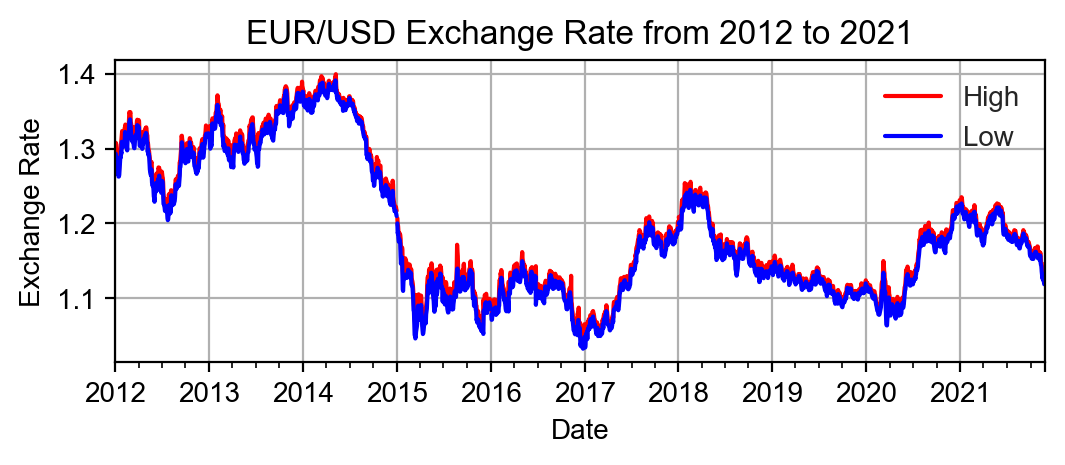

In [20]:
fig, axes = plt.subplots(figsize = (6,2),dpi=200)
style.use('seaborn-whitegrid')

EurUsd_data['High'].plot(legend=True,color='red')
EurUsd_data['Low'].plot(legend=True,color='blue')

axes.set_title('EUR/USD Exchange Rate from 2012 to 2021')
axes.autoscale(axis = 'x',tight=True)
axes.set_ylabel('Exchange Rate');

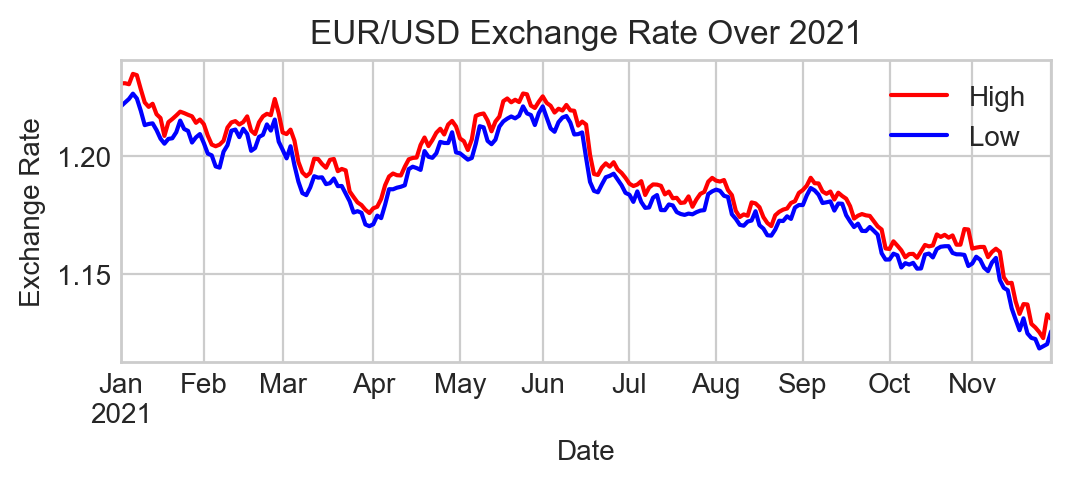

In [74]:
fig, axes = plt.subplots(figsize = (6,2),dpi=200)
style.use('seaborn-whitegrid')

EurUsd_data['High']['2021':].plot(legend=True,color='red')
EurUsd_data['Low']['2021':].plot(legend=True,color='blue')

axes.set_title('EUR/USD Exchange Rate Over 2021')
axes.autoscale(axis = 'x',tight=True)
axes.set_ylabel('Exchange Rate');

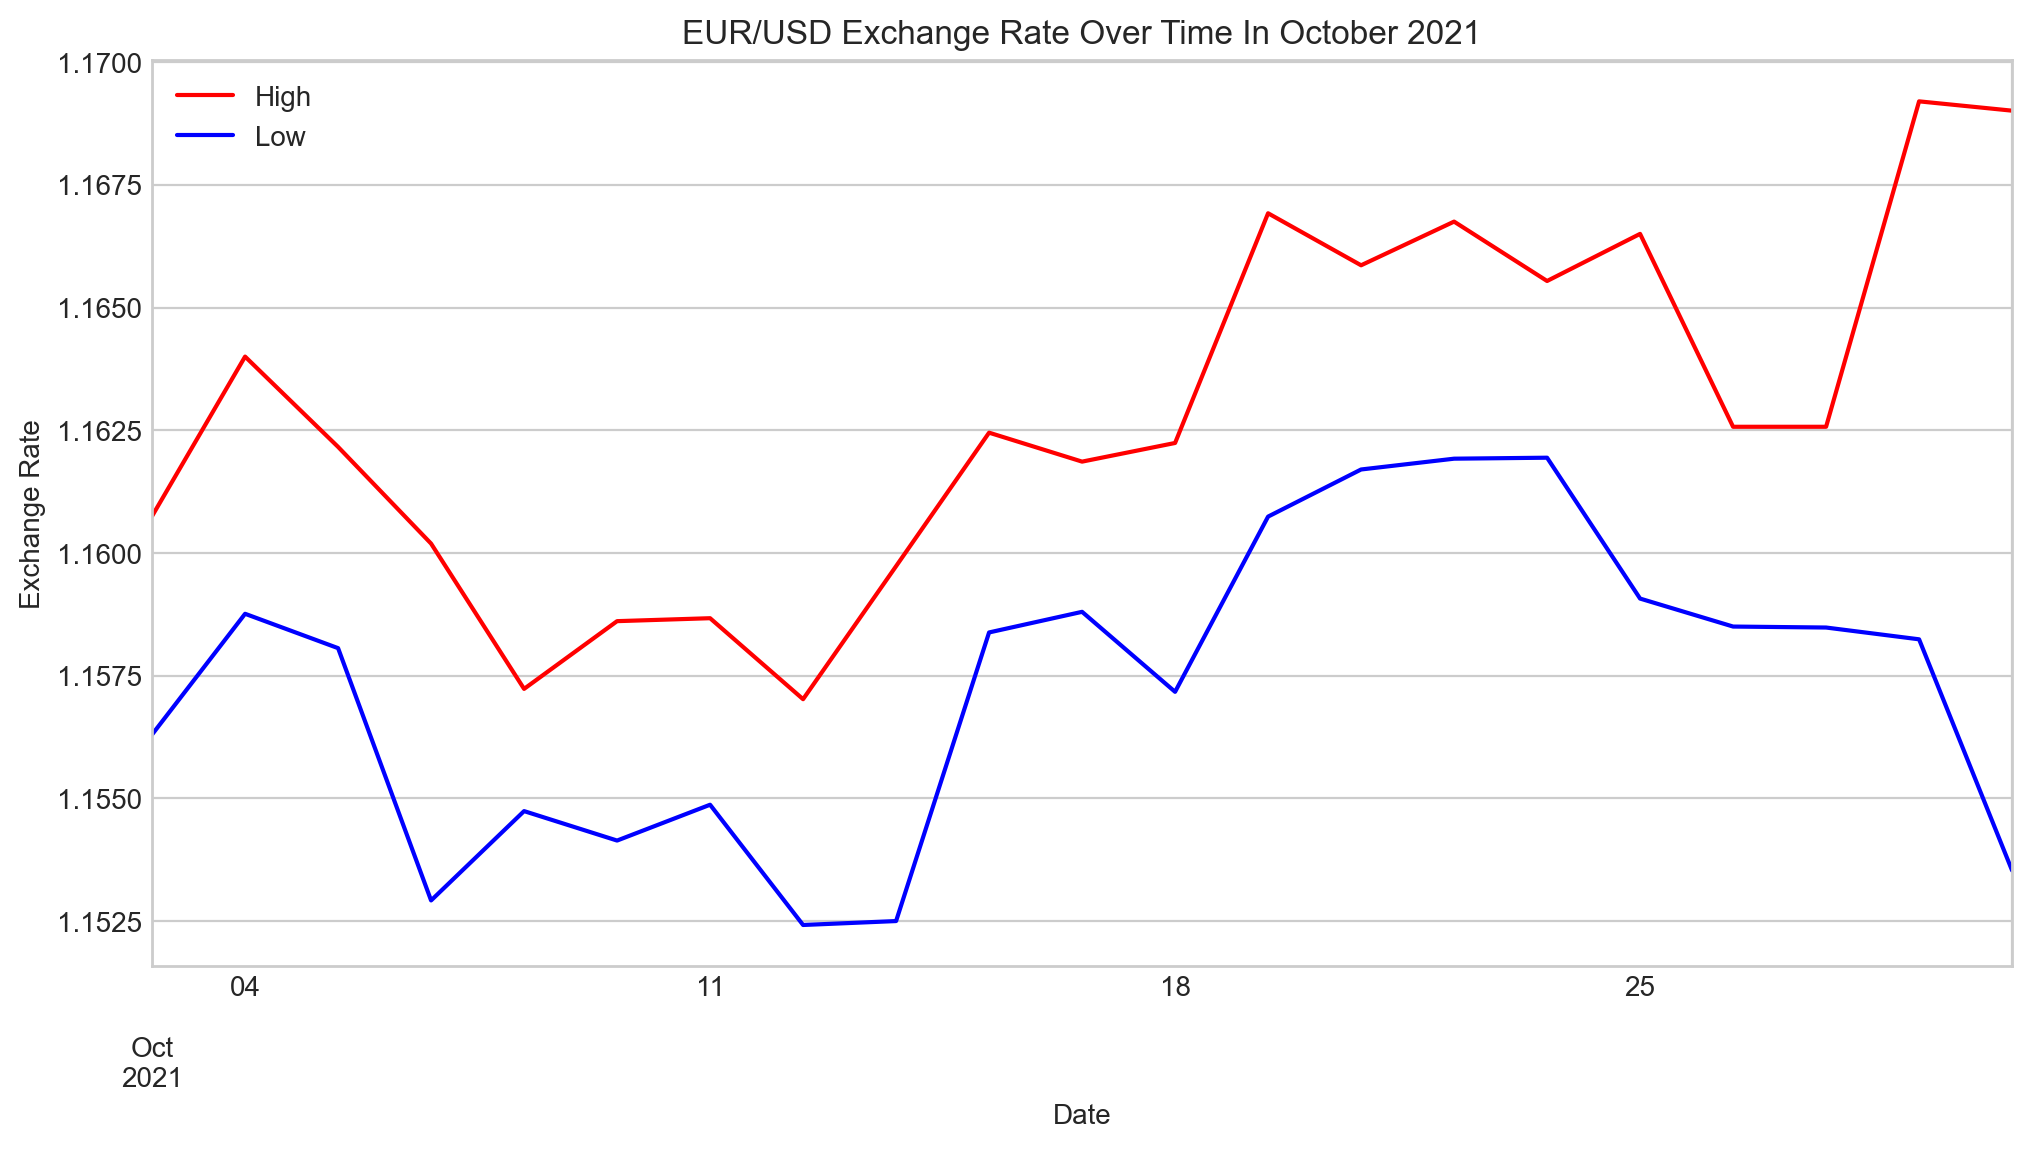

In [22]:
fig, axes = plt.subplots(figsize = (12,6),dpi=200)
style.use('seaborn-whitegrid')

EurUsd_data['High']['2021-10':'2021-10'].plot(legend=True,color='red')
EurUsd_data['Low']['2021-10':'2021-10'].plot(legend=True,color='blue')

axes.set_title('EUR/USD Exchange Rate Over Time In October 2021')
axes.autoscale(axis = 'x',tight=True)
axes.set_ylabel('Exchange Rate');

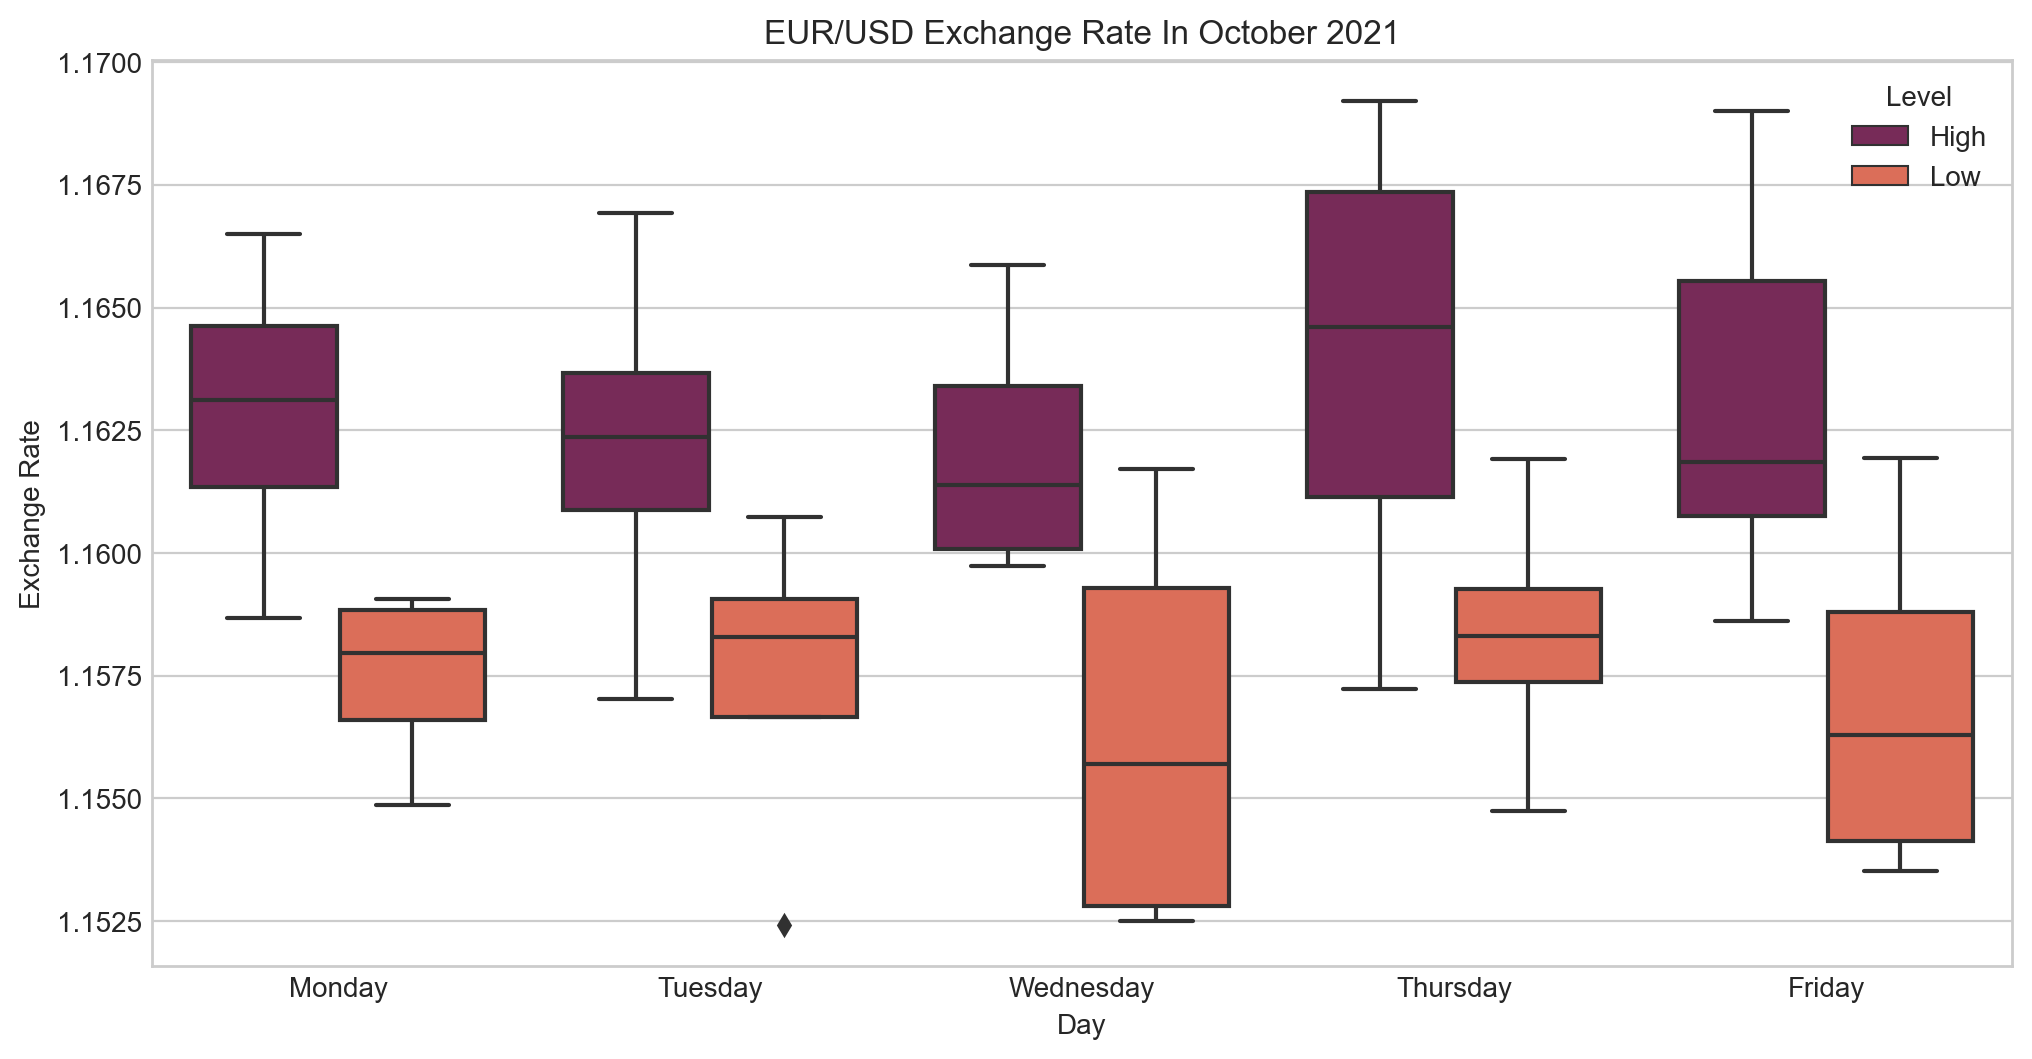

In [68]:
fig, axes = plt.subplots(figsize = (12,6),dpi=200)
style.use('seaborn-whitegrid')

axes.set_title('EUR/USD Exchange Rate In October 2021')

dd=pd.melt(EurUsd_data.copy()['2021-10':'2021-10'],
           id_vars=['Day'],
           value_vars=['High','Low'],
           var_name='Level')

sns.boxplot(x='Day',y='value' , data=dd,hue='Level',palette='rocket');
axes.set_ylabel('Exchange Rate')
axes.set_xticklabels(['Monday',"Tuesday","Wednesday","Thursday","Friday"]);

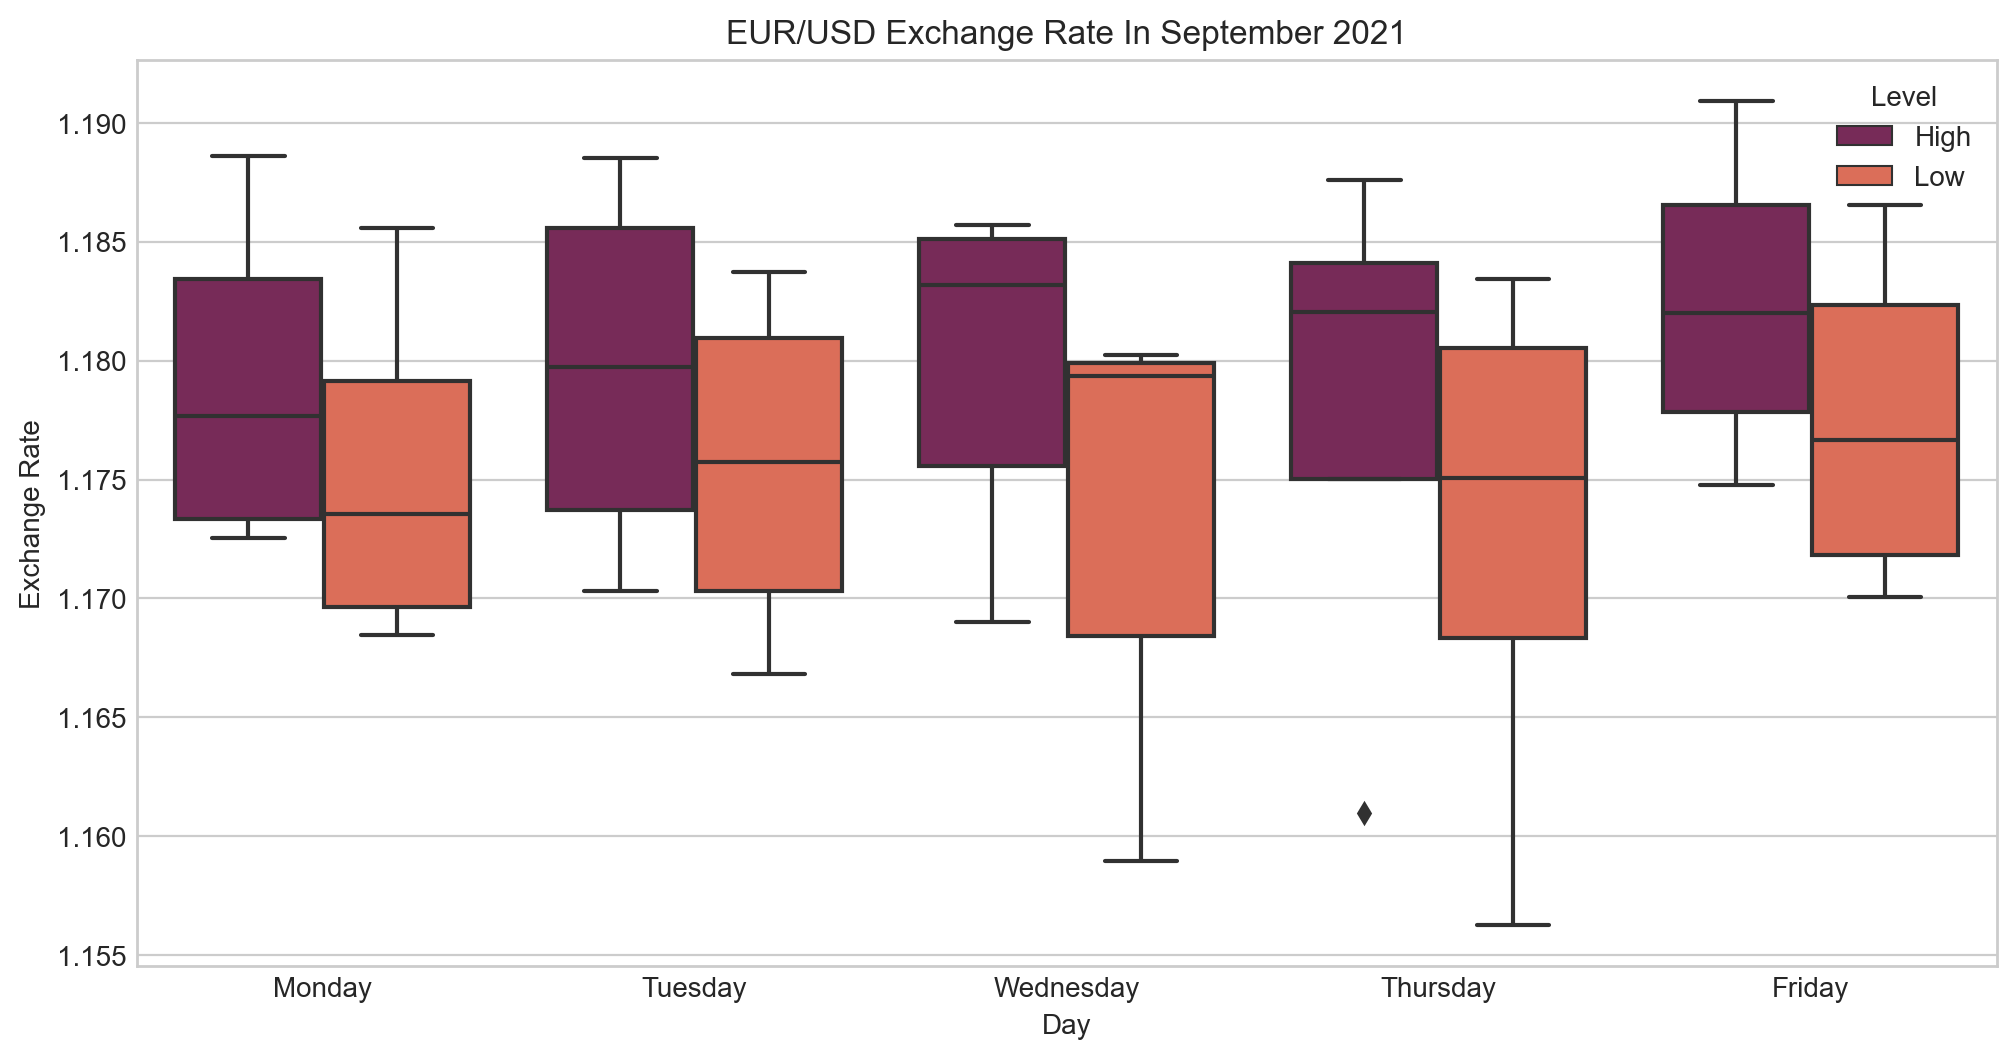

In [69]:
fig, axes = plt.subplots(figsize = (12,6),dpi=200)
style.use('seaborn-whitegrid')

axes.set_title('EUR/USD Exchange Rate In September 2021')

dd=pd.melt(EurUsd_data.copy()['2021-09':'2021-09'],
           id_vars=['Day'],
           value_vars=['High','Low'],
           var_name='Level')

sns.boxplot(x='Day',y='value' , data=dd,hue='Level',palette='rocket');
axes.set_ylabel('Exchange Rate')
axes.set_xticklabels(['Monday',"Tuesday","Wednesday","Thursday","Friday"]);

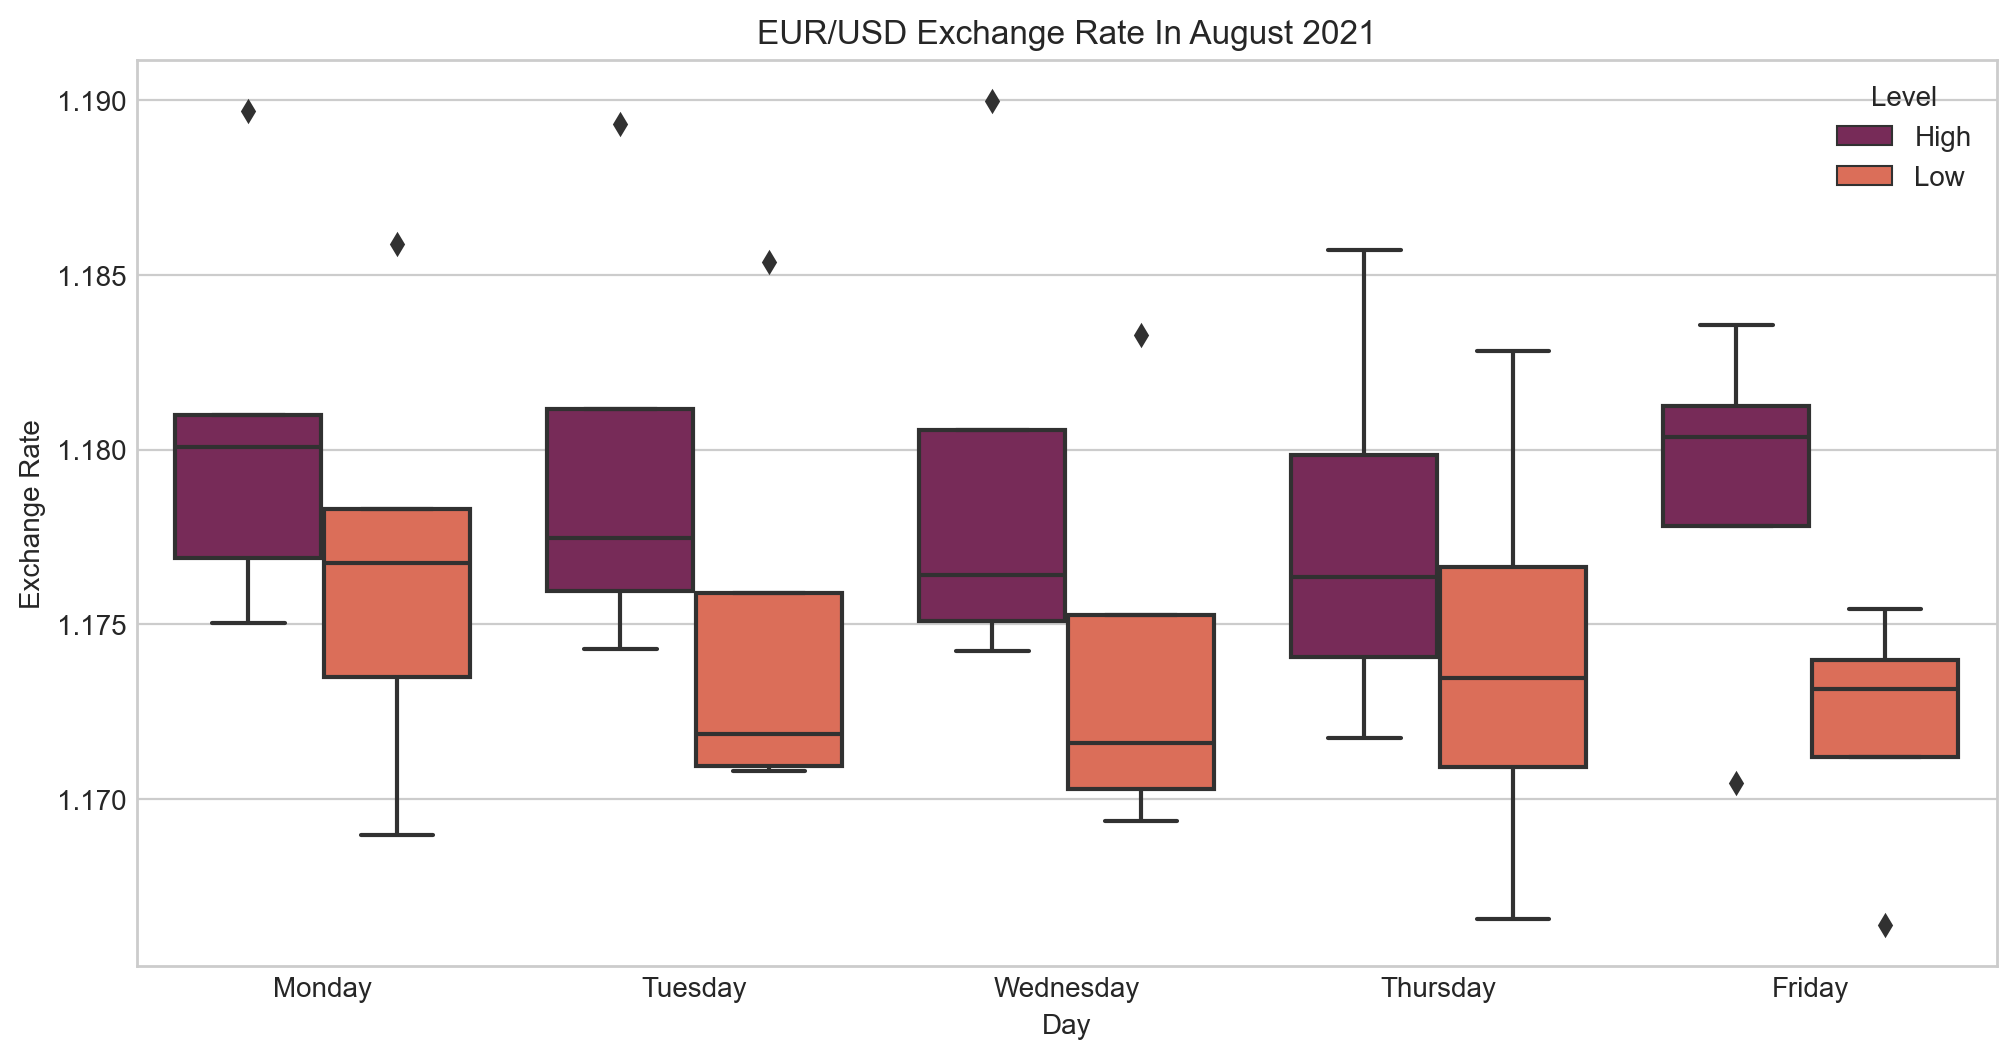

In [70]:
fig, axes = plt.subplots(figsize = (12,6),dpi=200)
style.use('seaborn-whitegrid')

axes.set_title('EUR/USD Exchange Rate In August 2021')

dd=pd.melt(EurUsd_data.copy()['2021-08-01':'2021-08-30'],
           id_vars=['Day'],
           value_vars=['High','Low'],
           var_name='Level')

sns.boxplot(x='Day',y='value' , data=dd,hue='Level',palette='rocket');
axes.set_ylabel('Exchange Rate')
axes.set_xticklabels(['Monday',"Tuesday","Wednesday","Thursday","Friday"]);

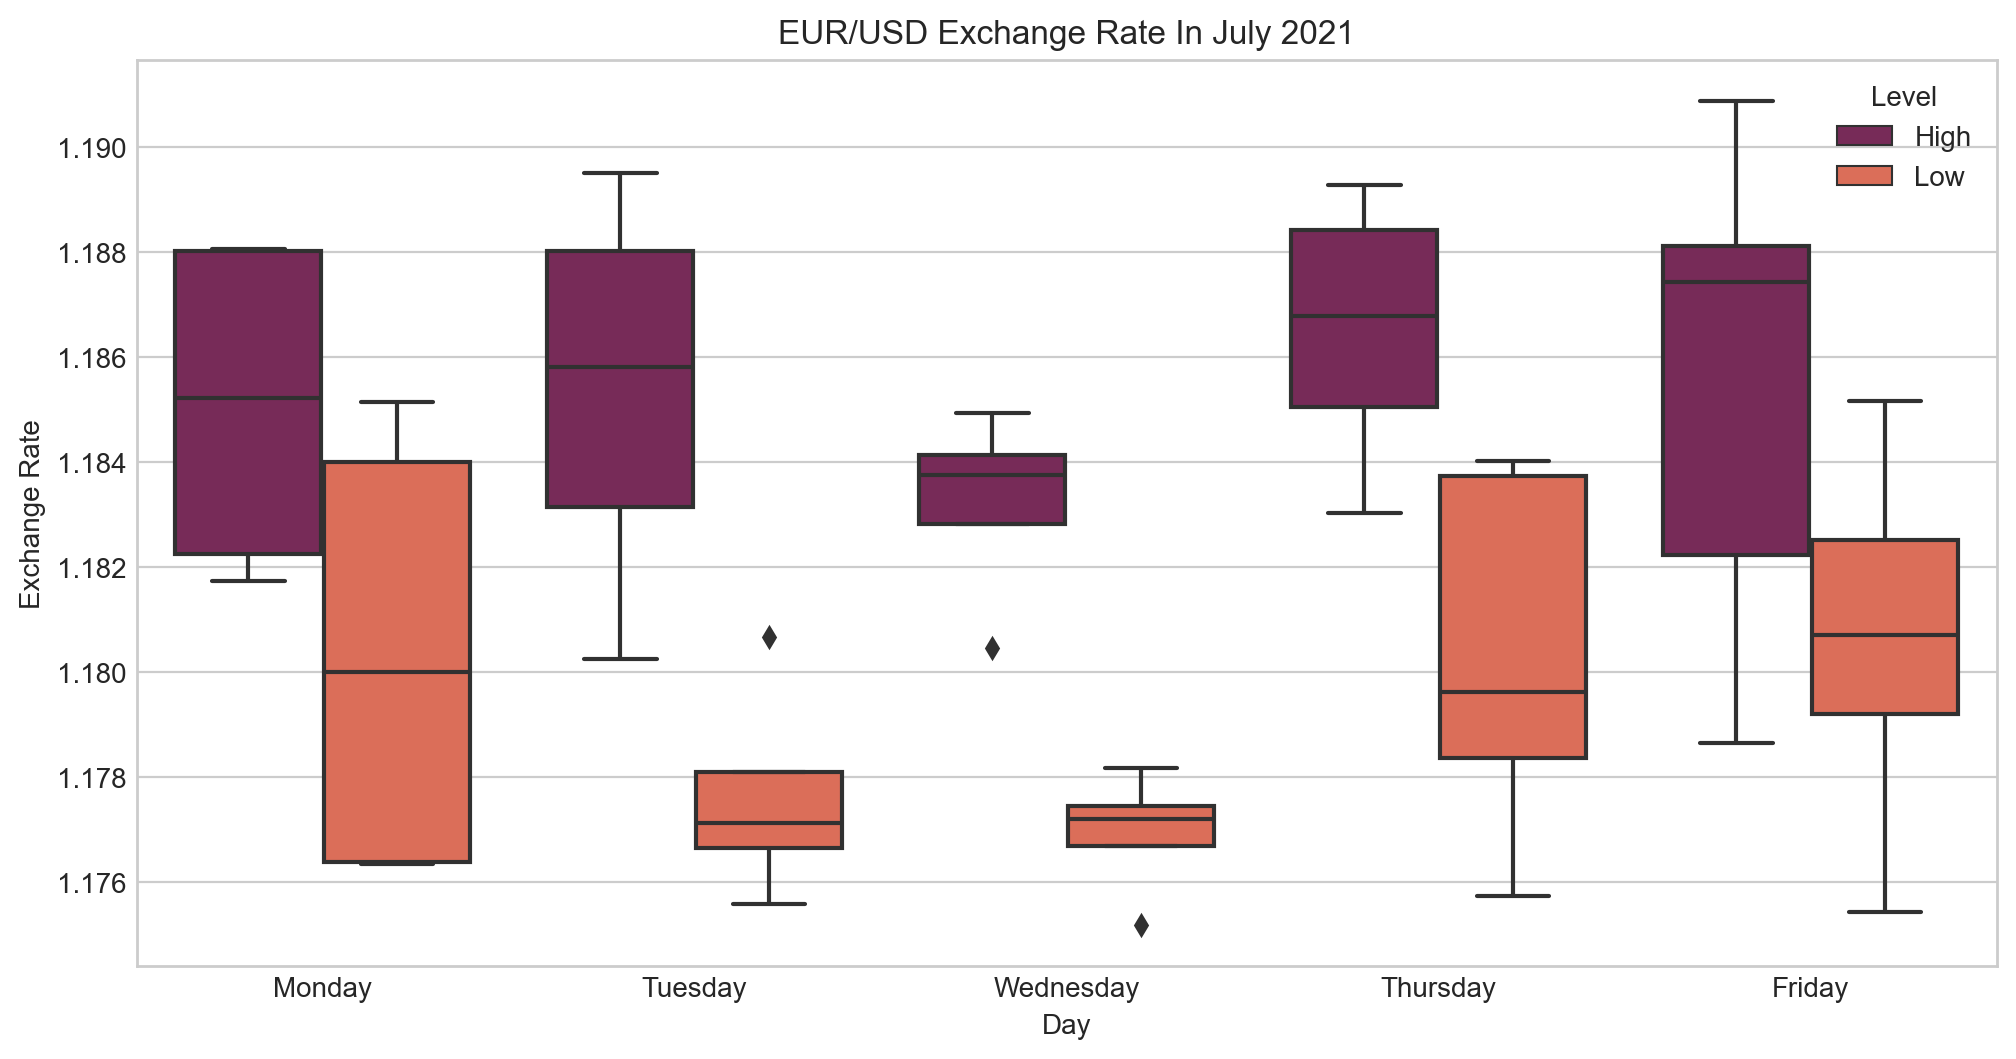

In [71]:
fig, axes = plt.subplots(figsize = (12,6),dpi=200)
style.use('seaborn-whitegrid')

axes.set_title('EUR/USD Exchange Rate In July 2021')

dd=pd.melt(EurUsd_data.copy()['2021-07':'2021-07'],
           id_vars=['Day'],
           value_vars=['High','Low'],
           var_name='Level')

sns.boxplot(x='Day',y='value' , data=dd,hue='Level',palette='rocket');
axes.set_ylabel('Exchange Rate')
axes.set_xticklabels(['Monday',"Tuesday","Wednesday","Thursday","Friday"]);

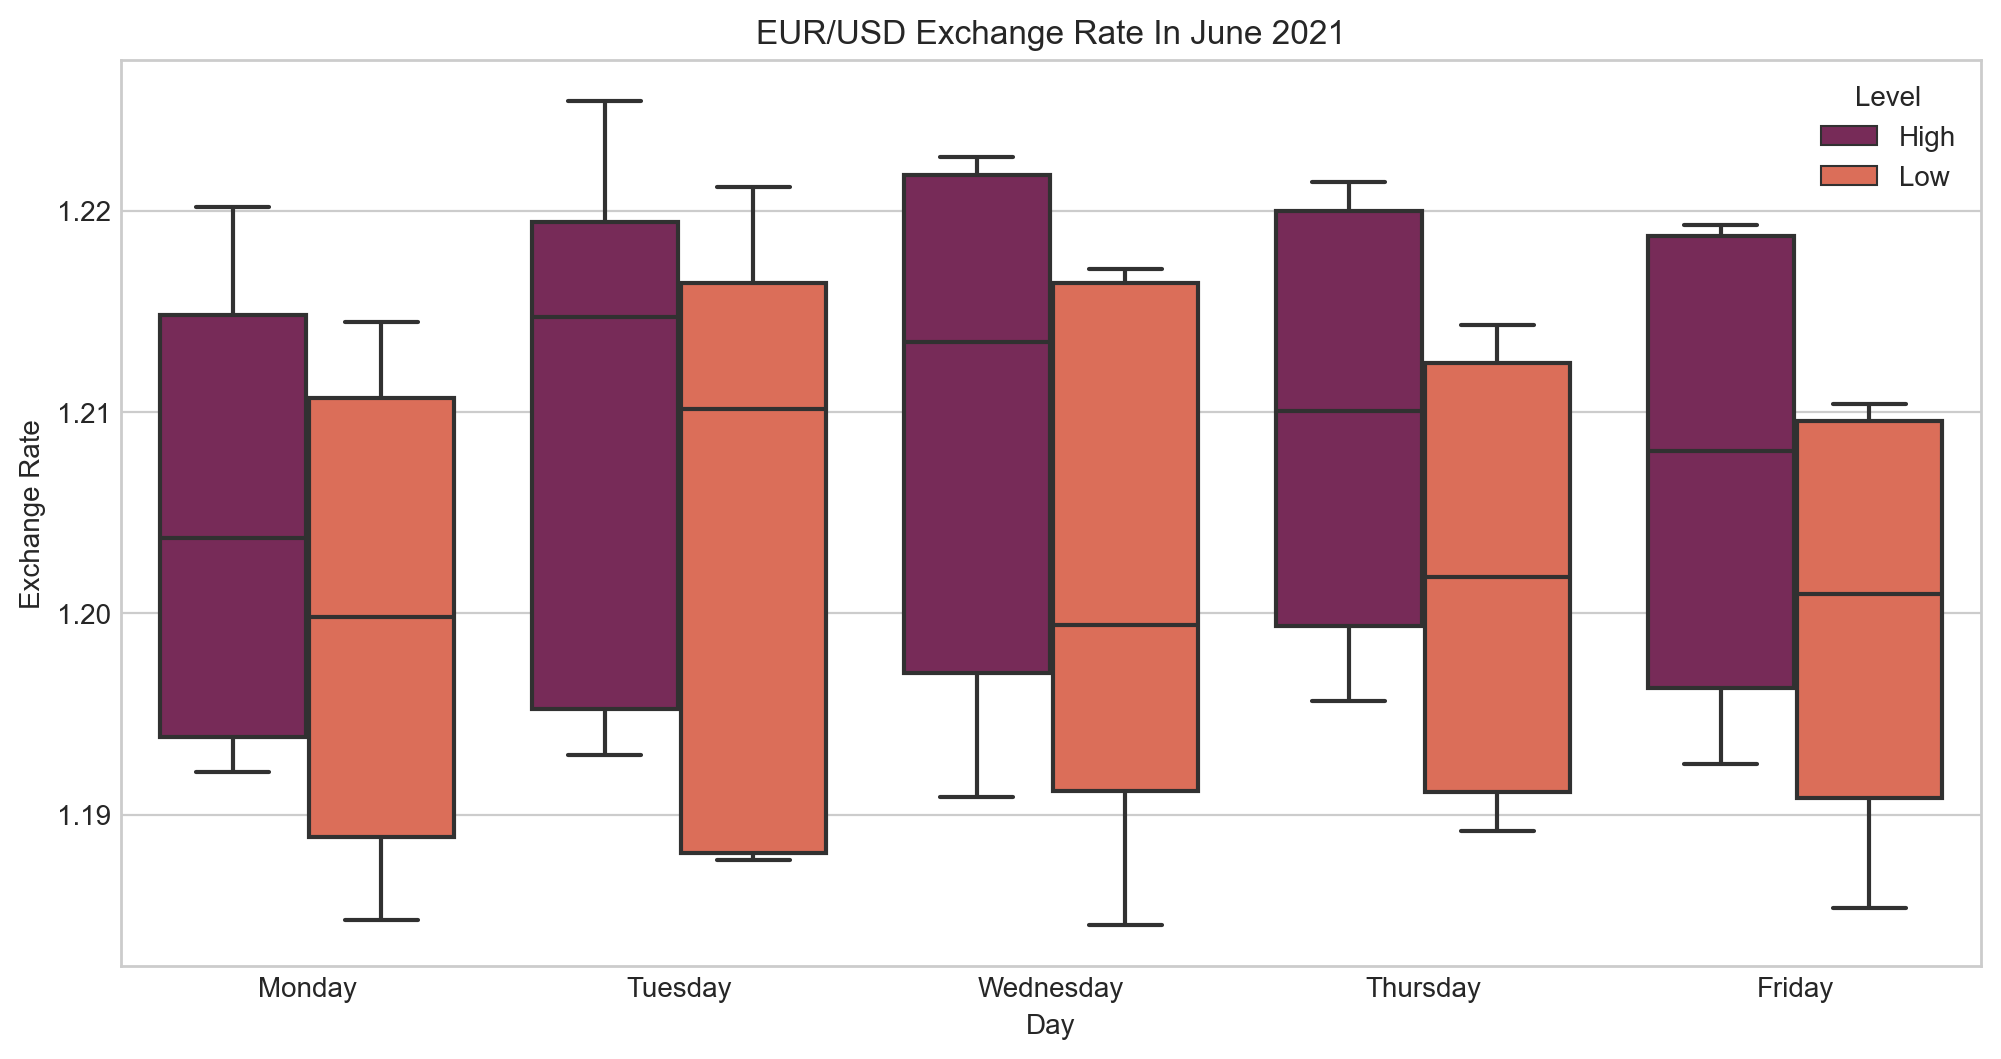

In [72]:
fig, axes = plt.subplots(figsize = (12,6),dpi=200)
style.use('seaborn-whitegrid')

axes.set_title('EUR/USD Exchange Rate In June 2021')

dd=pd.melt(EurUsd_data.copy()['2021-06':'2021-06'],
           id_vars=['Day'],
           value_vars=['High','Low'],
           var_name='Level')

sns.boxplot(x='Day',y='value' , data=dd,hue='Level',palette='rocket');
axes.set_ylabel('Exchange Rate')
axes.set_xticklabels(['Monday',"Tuesday","Wednesday","Thursday","Friday"]);

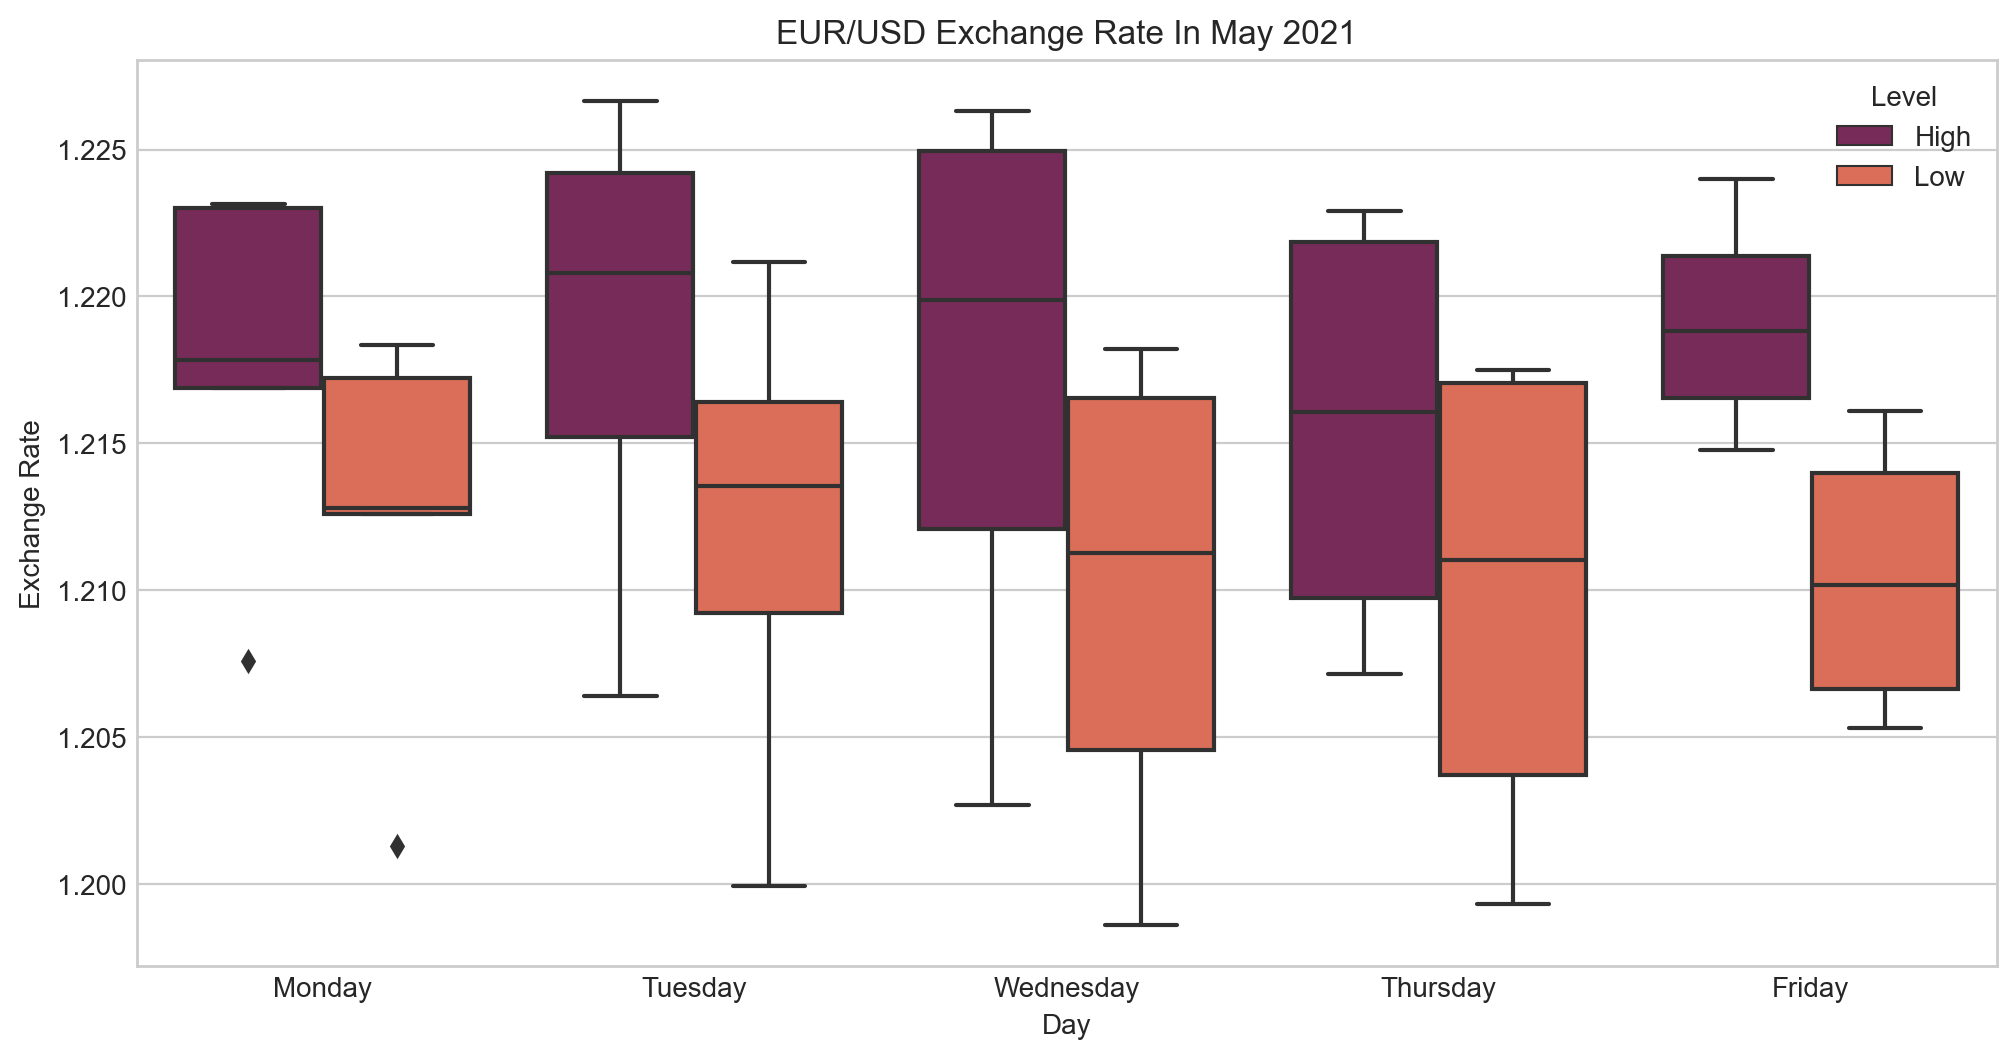

In [73]:
fig, axes = plt.subplots(figsize = (12,6),dpi=200)
style.use('seaborn-whitegrid')

axes.set_title('EUR/USD Exchange Rate In May 2021')

dd=pd.melt(EurUsd_data.copy()['2021-05':'2021-05'],
           id_vars=['Day'],
           value_vars=['High','Low'],
           var_name='Level')

sns.boxplot(x='Day',y='value' , data=dd,hue='Level',palette='rocket');
axes.set_ylabel('Exchange Rate')
axes.set_xticklabels(['Monday',"Tuesday","Wednesday","Thursday","Friday"]);

### Decompose analysis

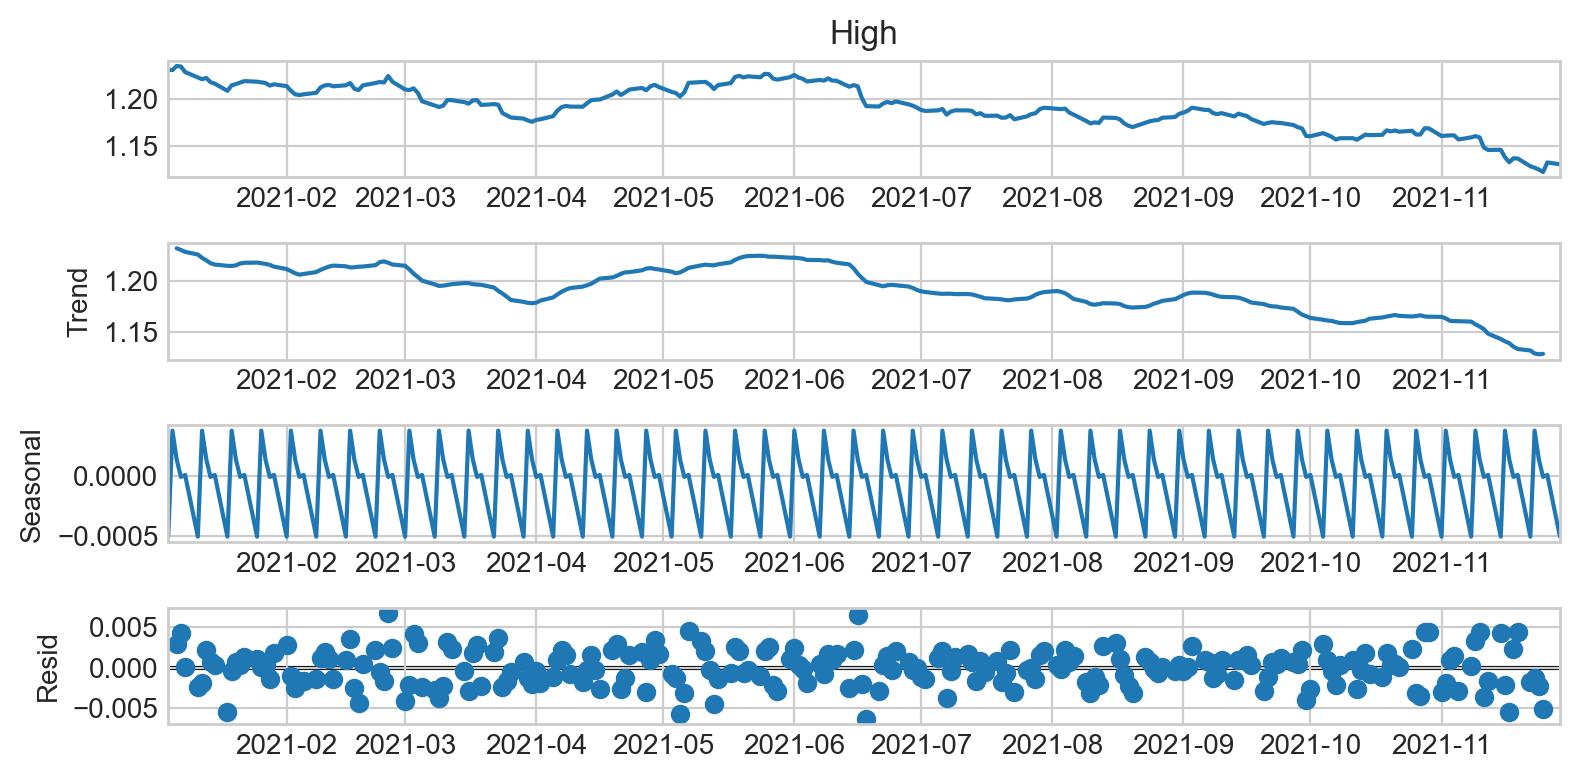

In [23]:
# 2021 conponents high

from statsmodels.tsa.seasonal import seasonal_decompose
plt.rc("figure", figsize=(8,4),dpi=200)

result = seasonal_decompose(x=EurUsd_data['High']['2021':'2021'].dropna());
result.plot();

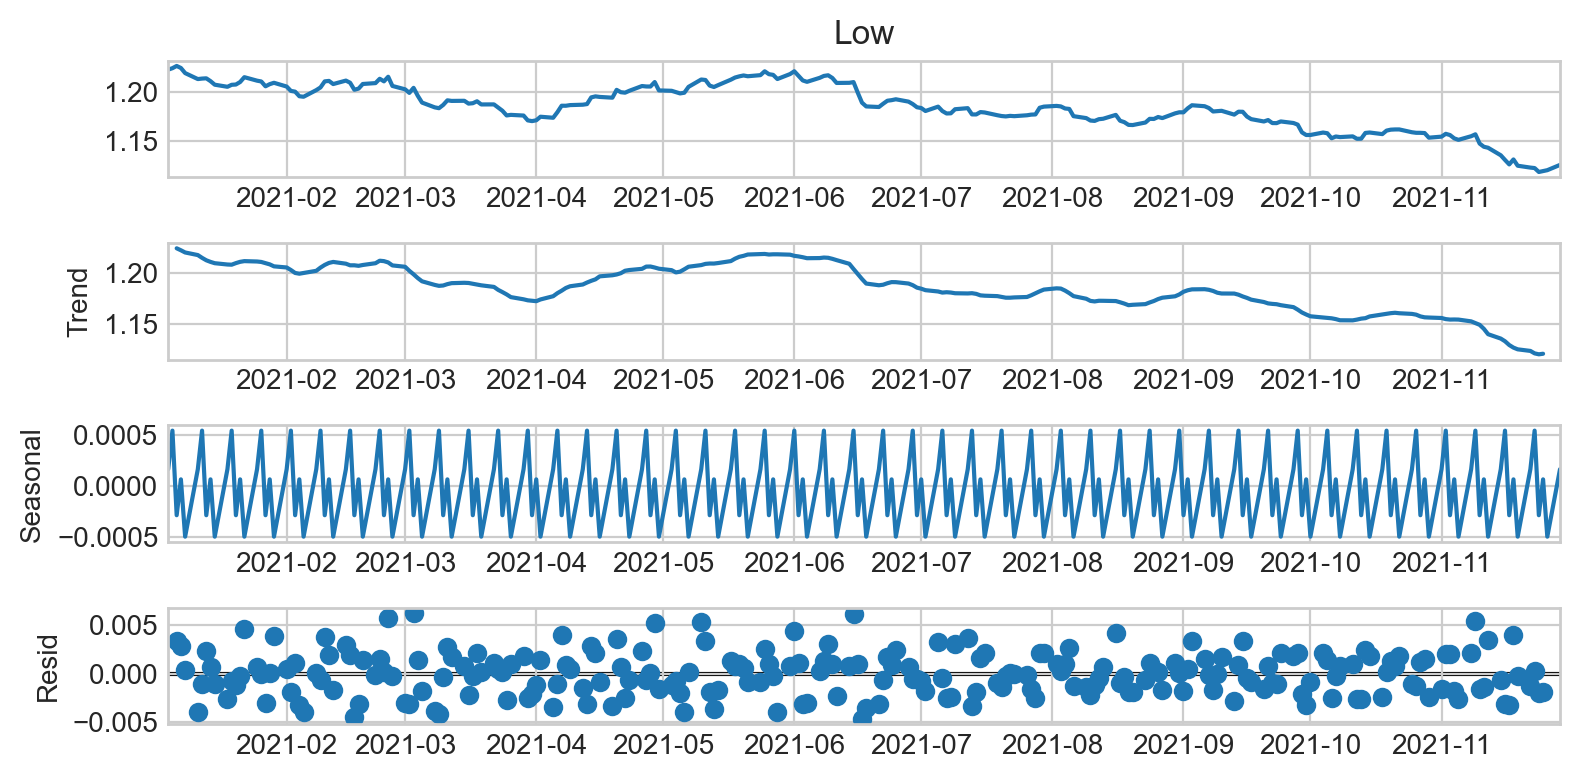

In [24]:
# 2021 conponents Low
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rc("figure", figsize=(8,4),dpi=200)
result = seasonal_decompose(x=EurUsd_data['Low']['2021':'2021'].dropna());
result.plot();

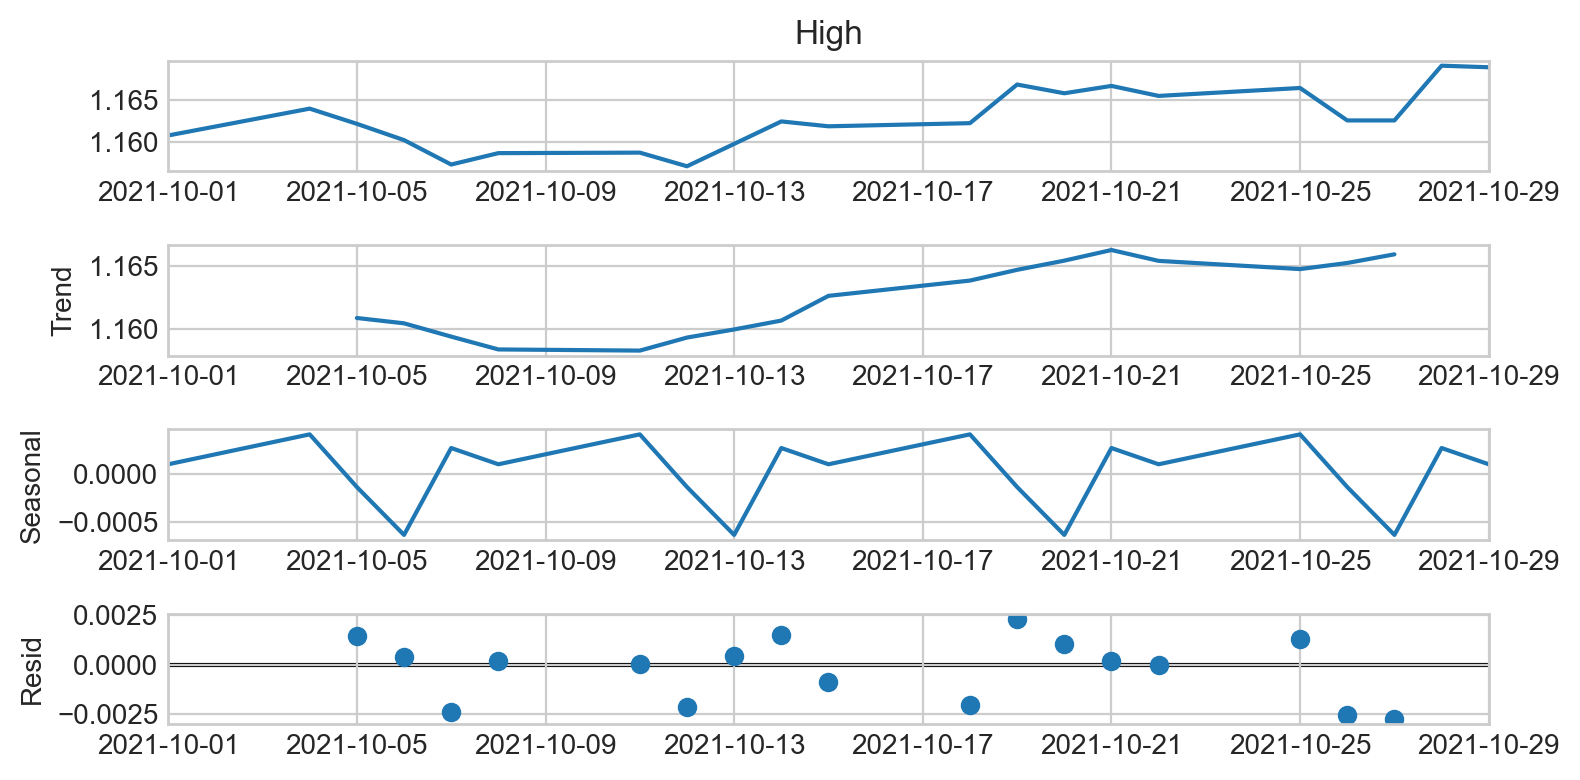

In [25]:
# 2021 October conponents high
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(x=EurUsd_data['High']['2021-10':'2021-10'].dropna());
result.plot();

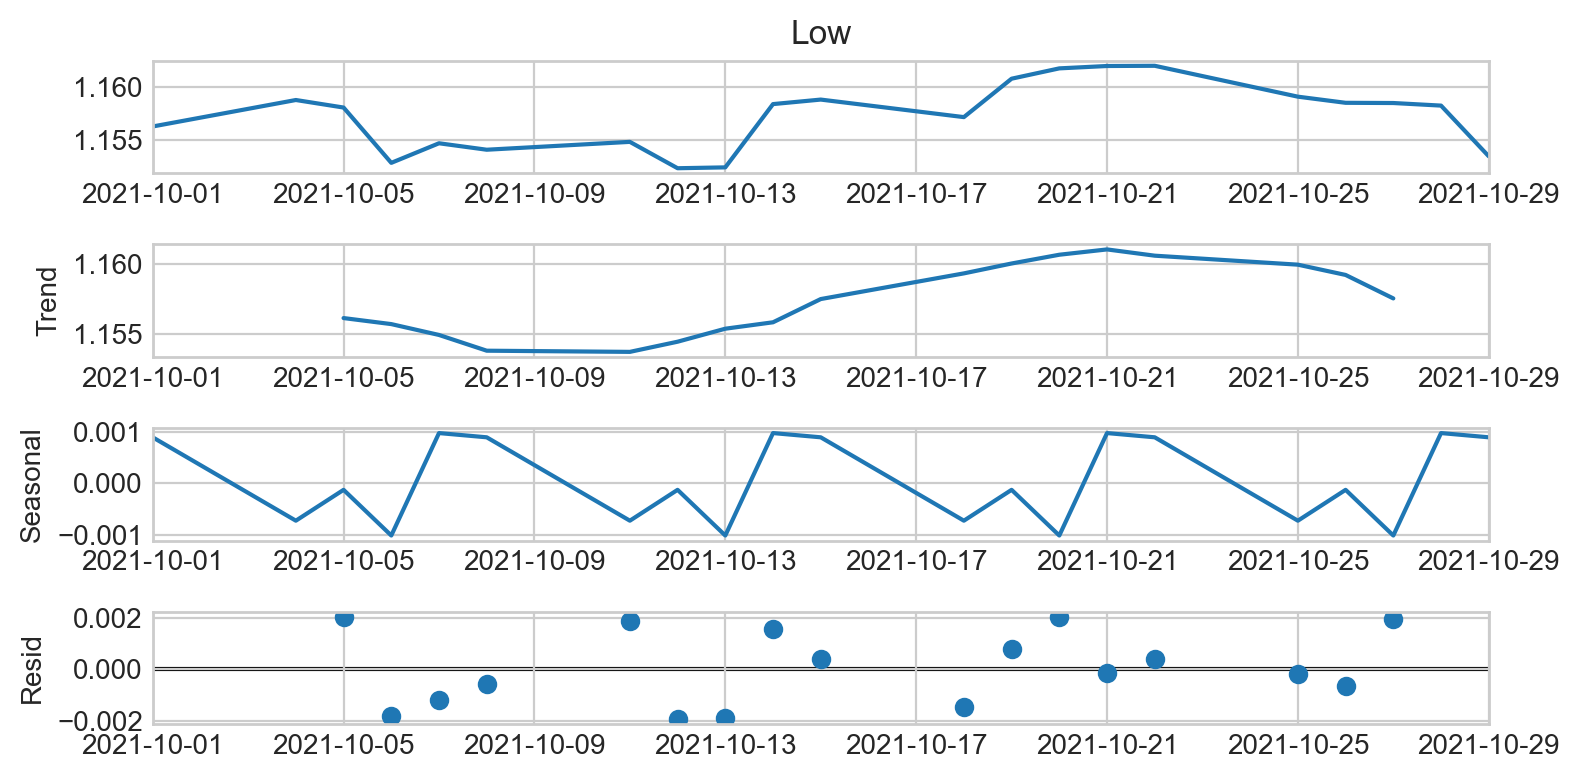

In [26]:
# 2021 October conponents high
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(x=EurUsd_data['Low']['2021-10':'2021-10'].dropna());
result.plot();

# $\color{red}{\textbf{4 Variable Engineering}}$

### missing data 

In [16]:
EurUsd_data.isnull().sum()

Open      14
High      14
Low       14
Close     14
Volume    14
Day       14
dtype: int64

### Day missing col

In [17]:
EurUsd_data['Day'] = EurUsd_data.index.weekday
EurUsd_data.isnull().sum()

Open      14
High      14
Low       14
Close     14
Volume    14
Day        0
dtype: int64

In [18]:
### show the rows of nan values
EurUsd_data[EurUsd_data.isna().any(axis=1)]

Open  High  Low  Close  Volume  Day
Date                                           
2012-12-25   NaN   NaN  NaN    NaN     NaN    1
2013-12-25   NaN   NaN  NaN    NaN     NaN    2
2014-12-25   NaN   NaN  NaN    NaN     NaN    3
2015-01-01   NaN   NaN  NaN    NaN     NaN    3
2015-12-25   NaN   NaN  NaN    NaN     NaN    4
2016-01-01   NaN   NaN  NaN    NaN     NaN    4
2017-12-25   NaN   NaN  NaN    NaN     NaN    0
2018-01-01   NaN   NaN  NaN    NaN     NaN    0
2018-12-25   NaN   NaN  NaN    NaN     NaN    1
2019-01-01   NaN   NaN  NaN    NaN     NaN    1
2019-12-25   NaN   NaN  NaN    NaN     NaN    2
2020-01-01   NaN   NaN  NaN    NaN     NaN    2
2020-12-25   NaN   NaN  NaN    NaN     NaN    4
2021-01-01   NaN   NaN  NaN    NaN     NaN    4

In [19]:
### we will use last observation carried forward method ###
EurUsd_data = EurUsd_data.ffill(axis = 0)

In [20]:
EurUsd_data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Day       0
dtype: int64

In [21]:
EurUsd_data.head()

Open     High      Low    Close   Volume  Day
Date                                                        
2012-01-02  1.29443  1.29681  1.29168  1.29338  40489.0    0
2012-01-03  1.29337  1.30762  1.29316  1.30509  82261.0    1
2012-01-04  1.30509  1.30719  1.28974  1.29361  80553.0    2
2012-01-05  1.29359  1.29434  1.27702  1.27904  92272.0    3
2012-01-06  1.27907  1.28121  1.26972  1.27188  78124.0    4

### Variable Scaling

In [22]:
EurUsd_data_high = EurUsd_data[['High','Day']].copy()
EurUsd_data_low = EurUsd_data[['Low','Day']].copy()

In [23]:
### log scaling ###
log_transformer = lambda x: np.log(x)
invert_log_transformer = lambda x: np.e**(x)

EurUsd_data_high['High_log'] = log_transformer(EurUsd_data_high['High'])
EurUsd_data_low['Low_log'] = log_transformer(EurUsd_data_low['Low'])

In [24]:
### recipical scaling ###
recipical_transformer = lambda x: 1/x
invert_recipical_transformer = lambda x: x**(-1) 

EurUsd_data_high['High_recip'] = recipical_transformer(EurUsd_data_high['High'])
EurUsd_data_low['Low_recip'] = recipical_transformer(EurUsd_data_low['Low'])

In [25]:
### sqroot scaling ###
sqrt_transformer = lambda x: x**(1/2)
invert_sqrt_transformer = lambda x: x**(2) 

EurUsd_data_high['High_sqrt'] = sqrt_transformer(EurUsd_data_high['High'])
EurUsd_data_low['Low_sqrt'] = sqrt_transformer(EurUsd_data_low['Low'])

In [26]:
### sq scaling ###
sq_transformer = lambda x: x**(2)
invert_sq_transformer = lambda x: x**(1/2) 

EurUsd_data_high['High_sq'] = sq_transformer(EurUsd_data_high['High'])
EurUsd_data_low['Low_sq'] = sq_transformer(EurUsd_data_low['Low'])

In [27]:
### box-cox scaling ###
from scipy.stats import boxcox 

boxcox_transformer = lambda x: boxcox(x)[0]

EurUsd_data_high['High_box'] = boxcox_transformer(EurUsd_data_high['High'])
EurUsd_data_low['Low_box'] = boxcox_transformer(EurUsd_data_low['Low'])

####################################################################################
from scipy.special import inv_boxcox
lambda_high = boxcox(EurUsd_data_high['High'])[1]
lambda_low = boxcox(EurUsd_data_low['Low'])[1]

invert_boxcox_transformer_high = lambda x,y: inv_boxcox(x,lambda_high) 
invert_boxcox_transformer_low = lambda x,y: inv_boxcox(x,lambda_low) 

In [28]:
EurUsd_data_high.columns

Index(['High', 'Day', 'High_log', 'High_recip', 'High_sqrt', 'High_sq',
       'High_box'],
      dtype='object')

In [29]:
EurUsd_data_low.columns

Index(['Low', 'Day', 'Low_log', 'Low_recip', 'Low_sqrt', 'Low_sq', 'Low_box'], dtype='object')

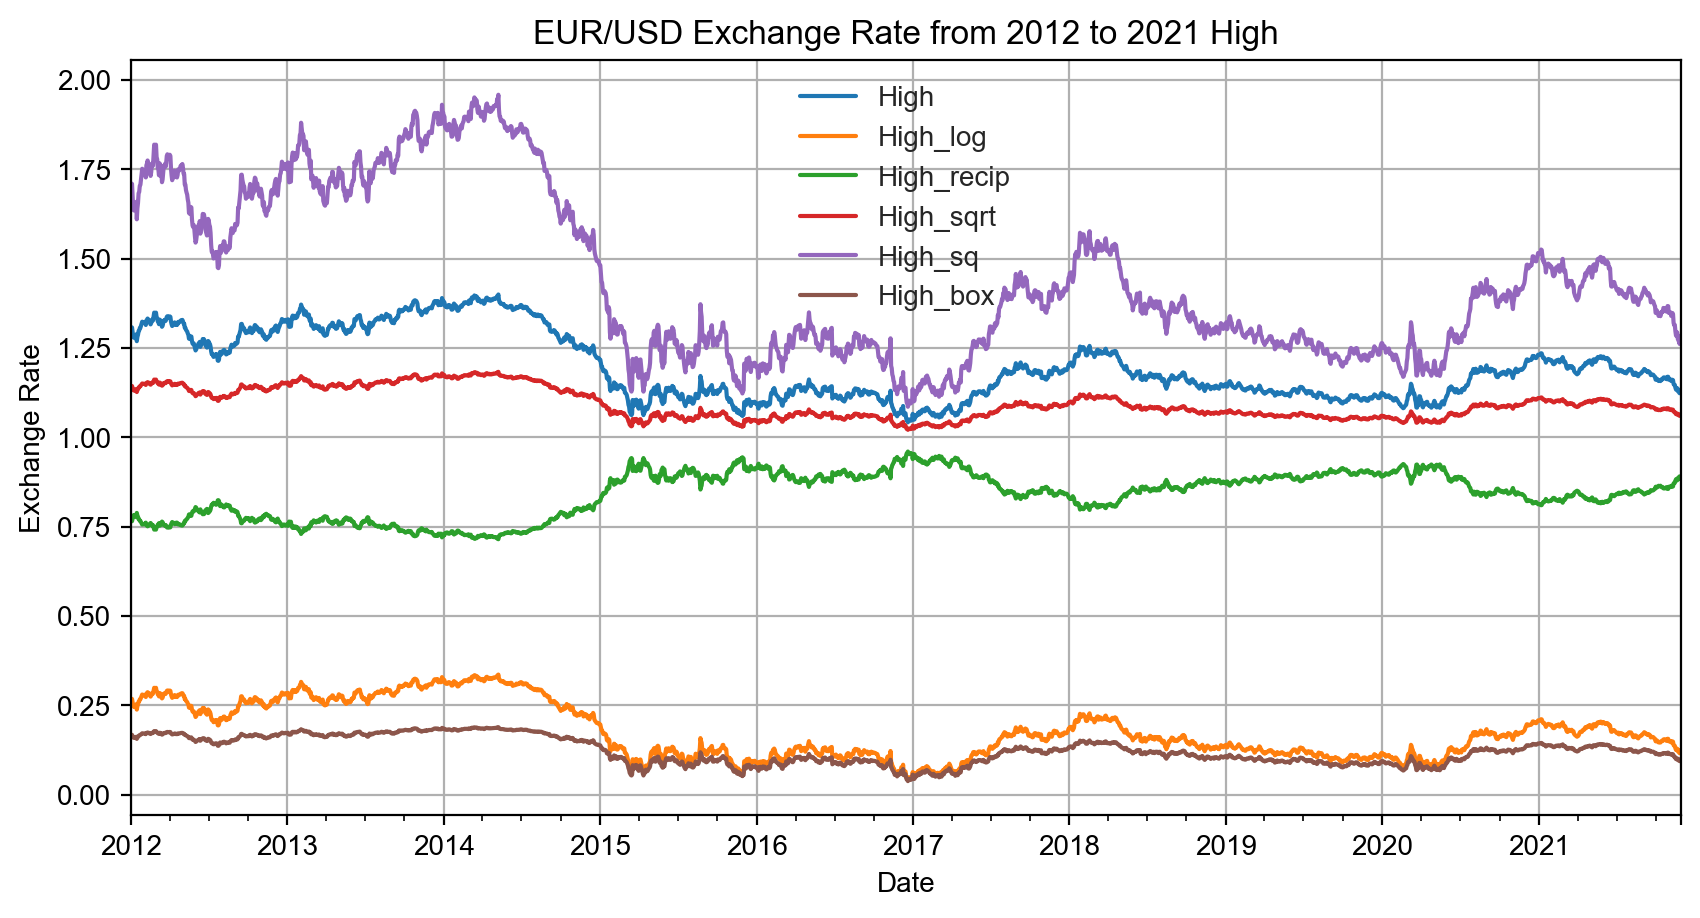

In [30]:
fig, axes = plt.subplots(figsize = (10,5),dpi=200)
style.use('seaborn-whitegrid')

EurUsd_data_high[['High', 'High_log', 'High_recip', 'High_sqrt', 'High_sq', 'High_box']].plot(legend=True,ax=axes);


axes.set_title('EUR/USD Exchange Rate from 2012 to 2021 High');
axes.autoscale(axis = 'x',tight=True);
axes.set_ylabel('Exchange Rate');

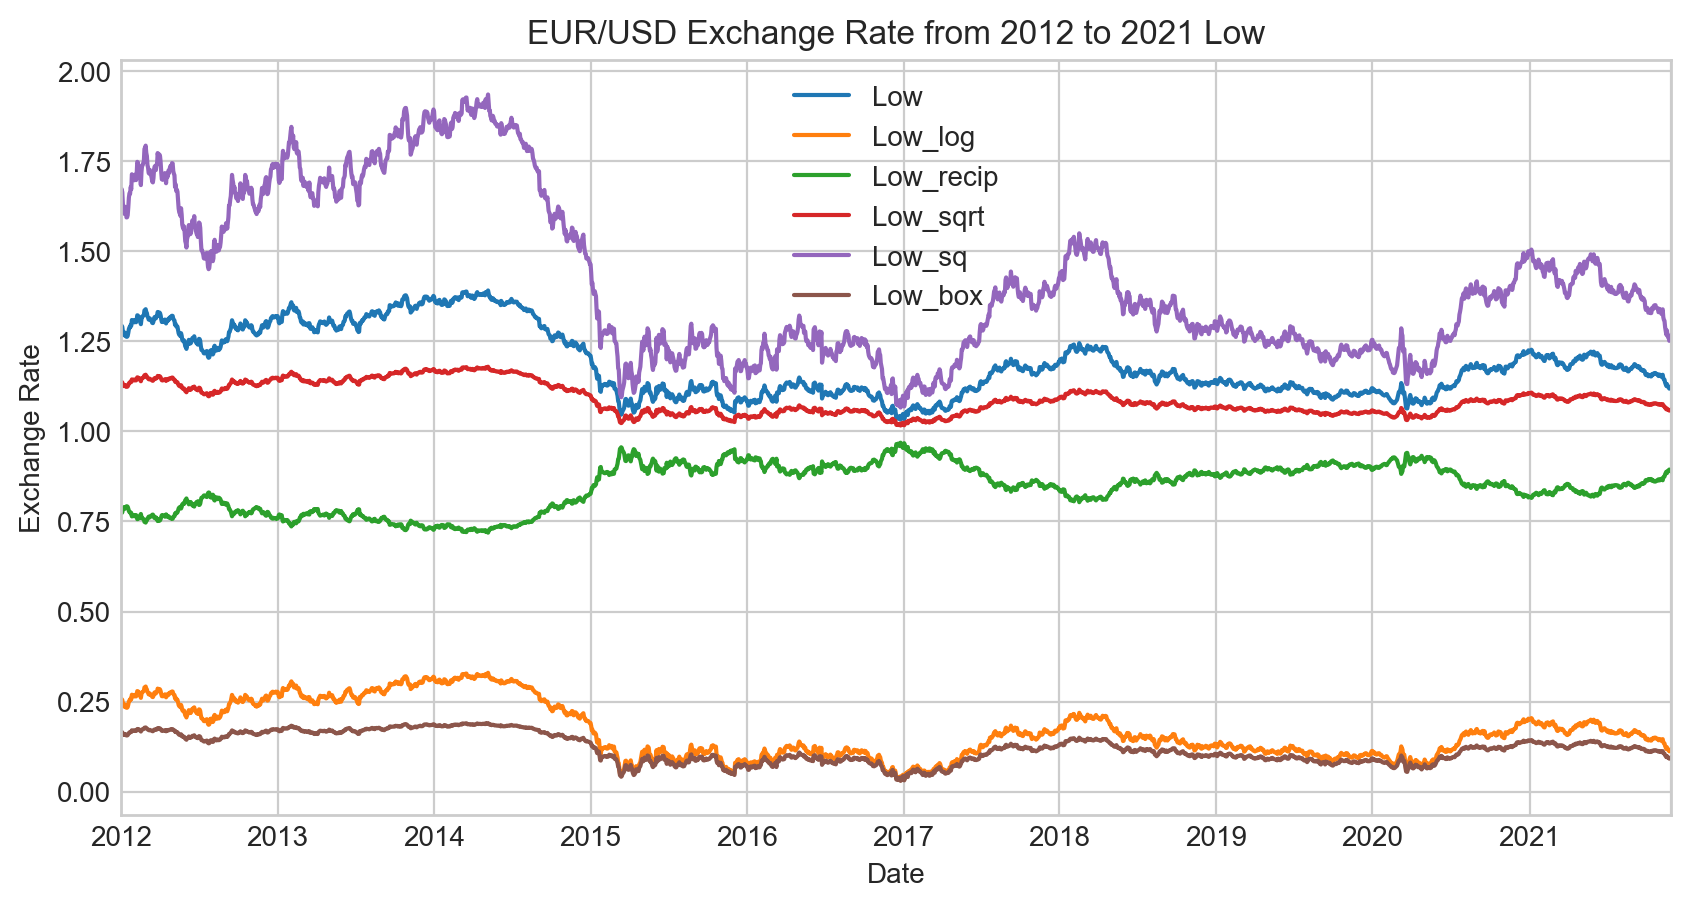

In [31]:
fig, axes = plt.subplots(figsize = (10,5),dpi=200)
style.use('seaborn-whitegrid')

EurUsd_data_low[['Low', 'Low_log', 'Low_recip', 'Low_sqrt', 'Low_sq', 'Low_box']].plot(legend=True,ax=axes);


axes.set_title('EUR/USD Exchange Rate from 2012 to 2021 Low');
axes.autoscale(axis = 'x',tight=True);
axes.set_ylabel('Exchange Rate');

# $\color{red}{\textbf{5 Time Series Analysis}}$

[5.1] Checking Assumptions

[A] Checking For Stationarity

[B] Checking For Seasonality

[5.2] Transformations(Differencing)

[5.3] Train Test Split

[5.4] Model Building

[5.5] Model Diagnostics(Residual Analysis)

[5.6] Detecting Outliers

[5.7] Model Selection

[5.8] Forecasting

## Checking Assumptions

### Checking For Stationarity

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
### make a list of col names high
EurUsd_data_high_cols = list(EurUsd_data_high.columns)
del EurUsd_data_high_cols[1]

In [34]:
### make a list of col names low
EurUsd_data_low_cols = list(EurUsd_data_low.columns)
del EurUsd_data_low_cols[1]

In [35]:
def dickey_fuller_test(x,p_value):
    result = adfuller(x)
    print("Test-Statistic:", result[0])
    print("P-Value:", result[1])
    if result[1] < p_value:
        print("We reject the null hypothesis.")
        print("There is strong evidence that the time series has no unit root and is stationary.")
    else:
        print("We failed to reject the null hypothesis.")
        print("There is little evidence that the time series has a unit root and is not stationary.")

In [36]:
### High stationary ###
for i in EurUsd_data_high_cols:
    print(i)
    dickey_fuller_test(EurUsd_data_high[i],0.05)
    print('###########\n')

High
Test-Statistic: -1.7162451941246
P-Value: 0.4227624982477763
We failed to reject the null hypothesis.
There is little evidence that the time series has a unit root and is not stationary.
###########

High_log
Test-Statistic: -1.766720395256574
P-Value: 0.39710472172540506
We failed to reject the null hypothesis.
There is little evidence that the time series has a unit root and is not stationary.
###########

High_recip
Test-Statistic: -1.8265390406070583
P-Value: 0.3673676529539187
We failed to reject the null hypothesis.
There is little evidence that the time series has a unit root and is not stationary.
###########

High_sqrt
Test-Statistic: -1.7402860740601576
P-Value: 0.4104844519844637
We failed to reject the null hypothesis.
There is little evidence that the time series has a unit root and is not stationary.
###########

High_sq
Test-Statistic: -1.7230102841298651
P-Value: 0.41929757571320914
We failed to reject the null hypothesis.
There is little evidence that the time ser

In [37]:
### Low stationary ###
for i in EurUsd_data_low_cols:
    print(i)
    dickey_fuller_test(EurUsd_data_low[i],0.05)
    print('###########\n')

Low
Test-Statistic: -1.6980950096504381
P-Value: 0.43209425153713565
We failed to reject the null hypothesis.
There is little evidence that the time series has a unit root and is not stationary.
###########

Low_log
Test-Statistic: -1.745600805039998
P-Value: 0.40778381109521805
We failed to reject the null hypothesis.
There is little evidence that the time series has a unit root and is not stationary.
###########

Low_recip
Test-Statistic: -1.802442132555798
P-Value: 0.3792499184272408
We failed to reject the null hypothesis.
There is little evidence that the time series has a unit root and is not stationary.
###########

Low_sqrt
Test-Statistic: -1.7206530428457174
P-Value: 0.4205040488311454
We failed to reject the null hypothesis.
There is little evidence that the time series has a unit root and is not stationary.
###########

Low_sq
Test-Statistic: -1.6076676538647647
P-Value: 0.47974074382122883
We failed to reject the null hypothesis.
There is little evidence that the time serie

### Differencing

In [38]:
from statsmodels.tsa.statespace.tools import diff

difference_transformer = lambda x: diff(x,k_diff=1)

In [39]:
### Difference 1 ###
for i in EurUsd_data_high_cols:
    EurUsd_data_high[i+'_DIFF1'] = difference_transformer(EurUsd_data_high[i])
    
for i in EurUsd_data_low_cols:
    EurUsd_data_low[i+'_DIFF1'] = difference_transformer(EurUsd_data_low[i])

In [40]:
### High stationary ###
for i in EurUsd_data_high_cols:
    print(i)
    dickey_fuller_test(EurUsd_data_high[i],0.05)
    print('###########\n')

High
Test-Statistic: -1.7162451941246
P-Value: 0.4227624982477763
We failed to reject the null hypothesis.
There is little evidence that the time series has a unit root and is not stationary.
###########

High_log
Test-Statistic: -1.766720395256574
P-Value: 0.39710472172540506
We failed to reject the null hypothesis.
There is little evidence that the time series has a unit root and is not stationary.
###########

High_recip
Test-Statistic: -1.8265390406070583
P-Value: 0.3673676529539187
We failed to reject the null hypothesis.
There is little evidence that the time series has a unit root and is not stationary.
###########

High_sqrt
Test-Statistic: -1.7402860740601576
P-Value: 0.4104844519844637
We failed to reject the null hypothesis.
There is little evidence that the time series has a unit root and is not stationary.
###########

High_sq
Test-Statistic: -1.7230102841298651
P-Value: 0.41929757571320914
We failed to reject the null hypothesis.
There is little evidence that the time ser

In [41]:
### High stationary ###
for i in list(EurUsd_data_high.columns)[-6:]:
    print(i)
    dickey_fuller_test(EurUsd_data_high[i].dropna(),0.05)
    print('###########\n')

High_DIFF1
Test-Statistic: -34.9678814795115
P-Value: 0.0
We reject the null hypothesis.
There is strong evidence that the time series has no unit root and is stationary.
###########

High_log_DIFF1
Test-Statistic: -34.9913282754127
P-Value: 0.0
We reject the null hypothesis.
There is strong evidence that the time series has no unit root and is stationary.
###########

High_recip_DIFF1
Test-Statistic: -35.02039362383474
P-Value: 0.0
We reject the null hypothesis.
There is strong evidence that the time series has no unit root and is stationary.
###########

High_sqrt_DIFF1
Test-Statistic: -34.978872875804
P-Value: 0.0
We reject the null hypothesis.
There is strong evidence that the time series has no unit root and is stationary.
###########

High_sq_DIFF1
Test-Statistic: -34.95060547301639
P-Value: 0.0
We reject the null hypothesis.
There is strong evidence that the time series has no unit root and is stationary.
###########

High_box_DIFF1
Test-Statistic: -20.41245307689397
P-Value: 0.

In [42]:
### Low stationary ###
for i in list(EurUsd_data_low.columns)[-6:]:
    print(i)
    dickey_fuller_test(EurUsd_data_low[i].dropna(),0.05)
    print('###########\n')

Low_DIFF1
Test-Statistic: -44.57354036605
P-Value: 0.0
We reject the null hypothesis.
There is strong evidence that the time series has no unit root and is stationary.
###########

Low_log_DIFF1
Test-Statistic: -44.66489510657587
P-Value: 0.0
We reject the null hypothesis.
There is strong evidence that the time series has no unit root and is stationary.
###########

Low_recip_DIFF1
Test-Statistic: -44.774661152663924
P-Value: 0.0
We reject the null hypothesis.
There is strong evidence that the time series has no unit root and is stationary.
###########

Low_sqrt_DIFF1
Test-Statistic: -44.616720958471255
P-Value: 0.0
We reject the null hypothesis.
There is strong evidence that the time series has no unit root and is stationary.
###########

Low_sq_DIFF1
Test-Statistic: -34.33369076738016
P-Value: 0.0
We reject the null hypothesis.
There is strong evidence that the time series has no unit root and is stationary.
###########

Low_box_DIFF1
Test-Statistic: -14.344257651765165
P-Value: 1.04

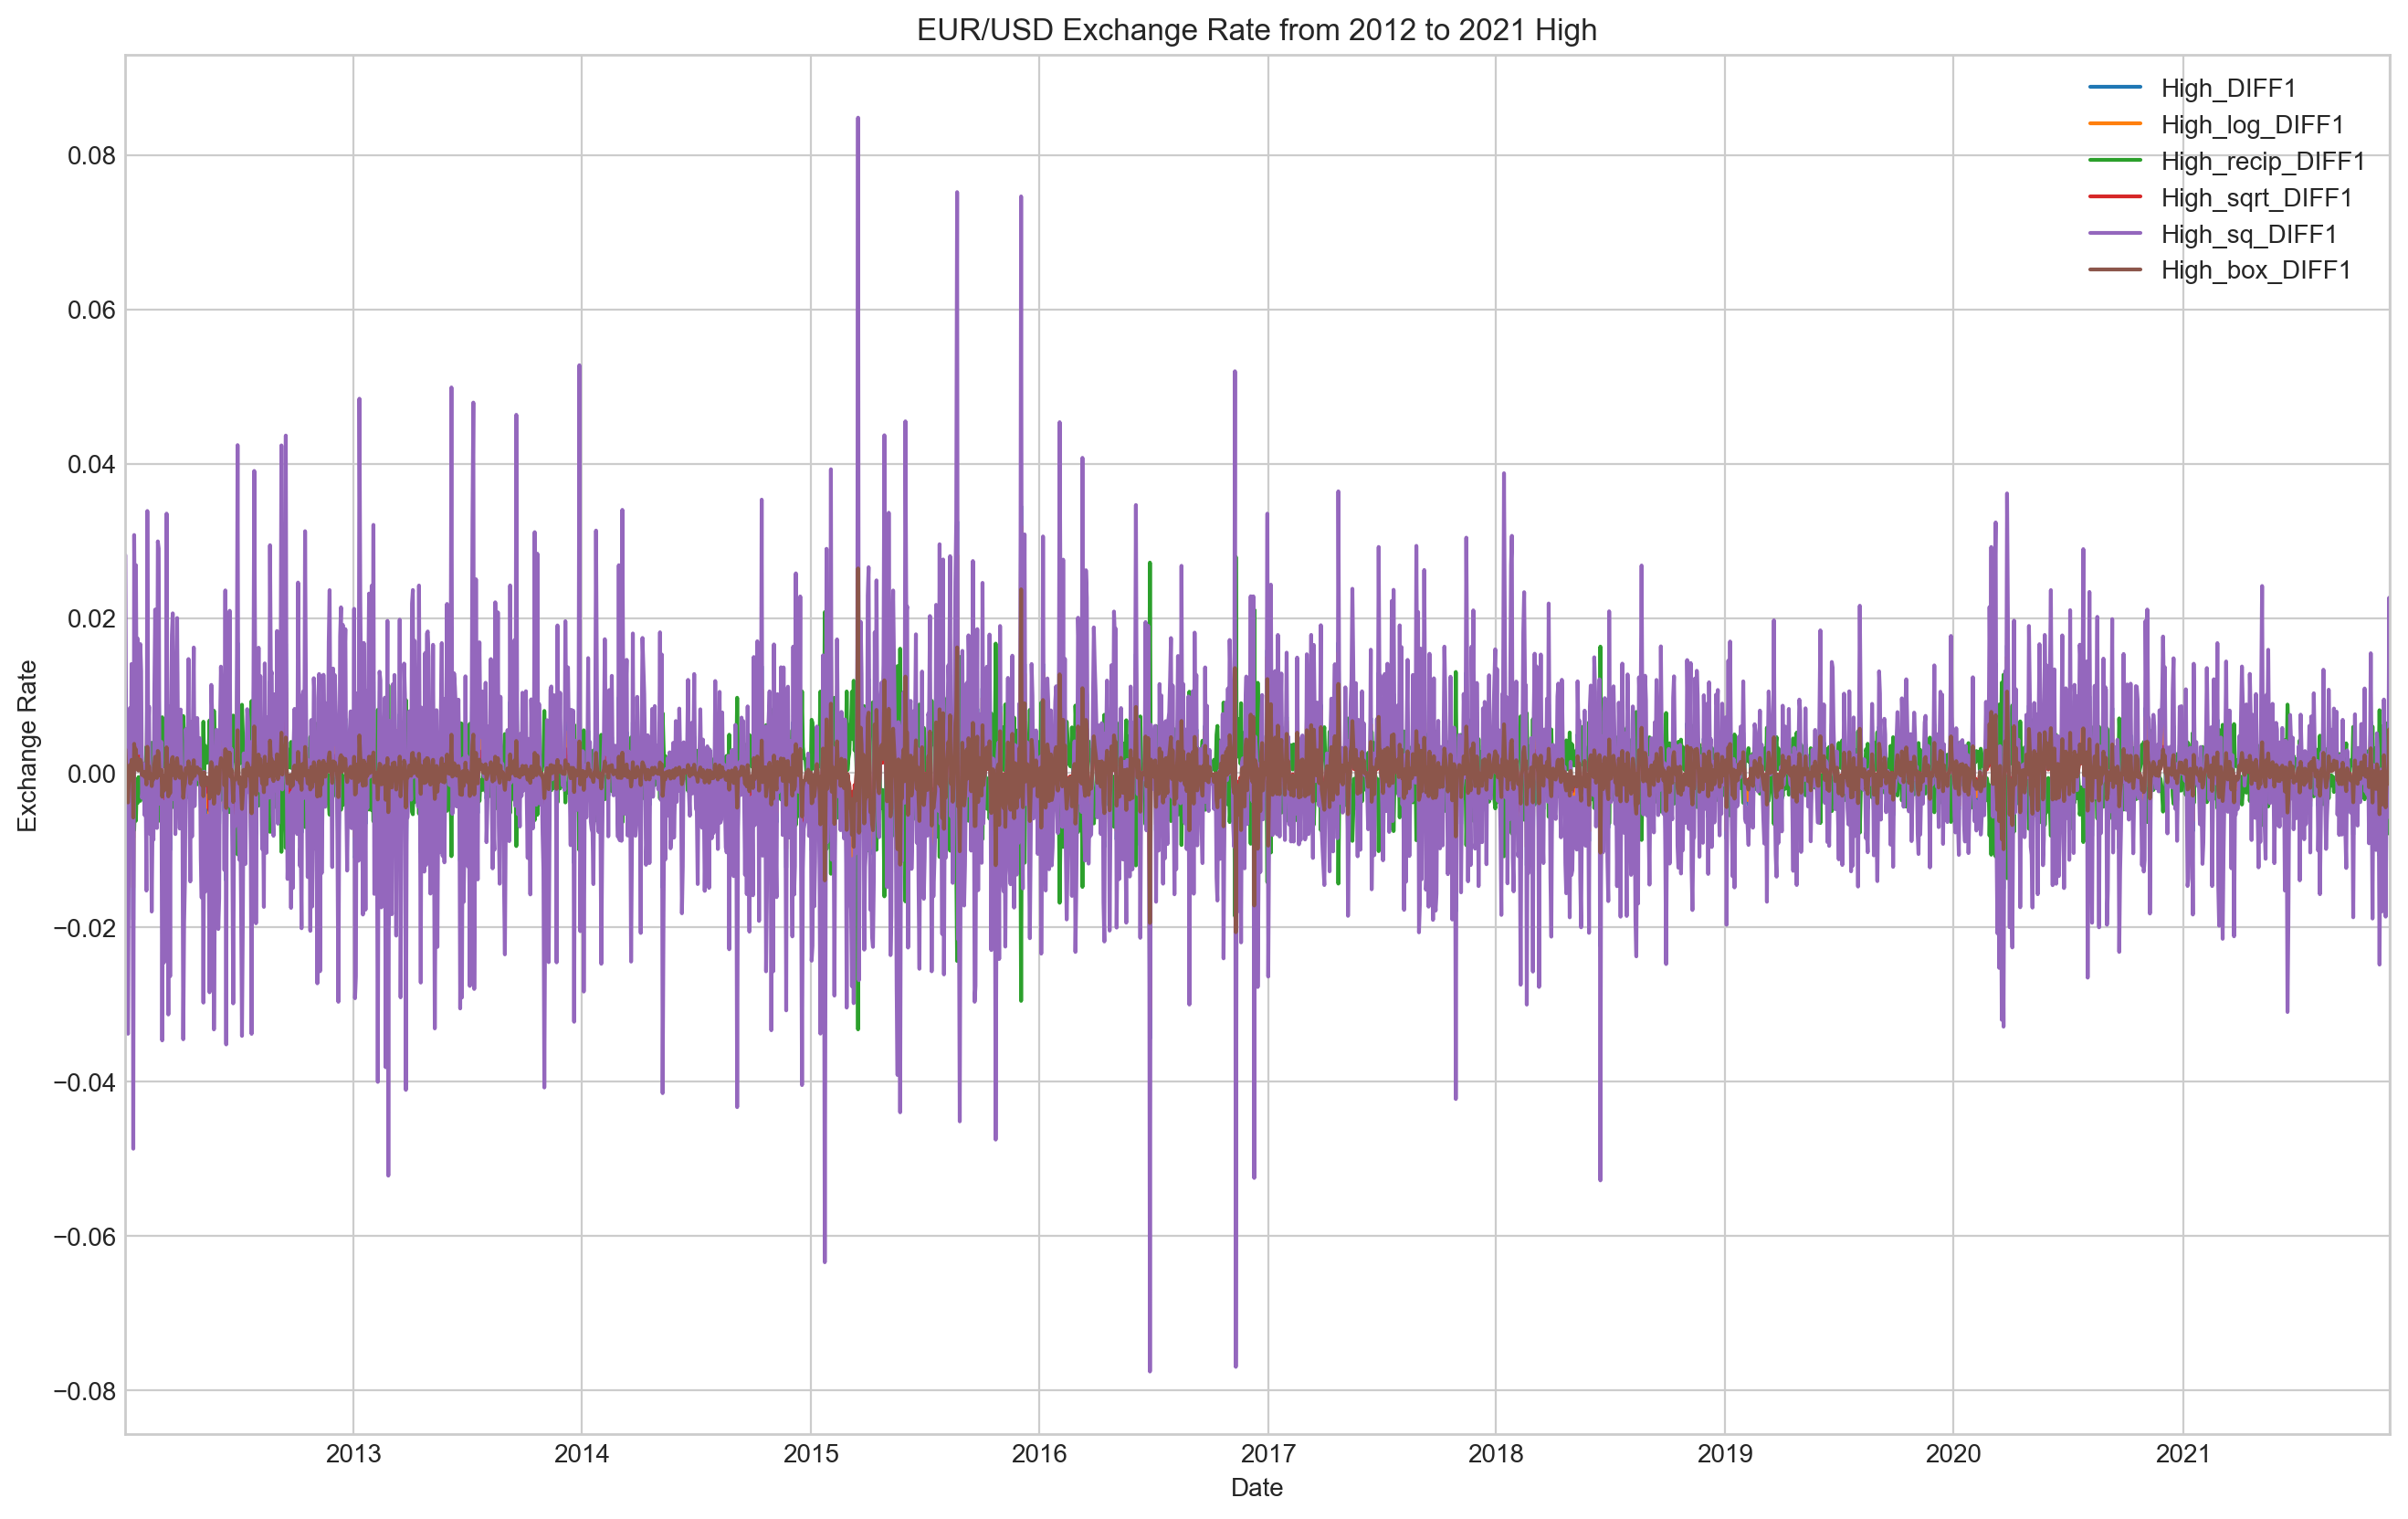

In [43]:
fig, axes = plt.subplots(figsize = (16,10),dpi=200)
style.use('seaborn-whitegrid')

EurUsd_data_high[['High_DIFF1', 'High_log_DIFF1', 'High_recip_DIFF1', 'High_sqrt_DIFF1', 'High_sq_DIFF1', 'High_box_DIFF1']].plot(legend=True,ax=axes);


axes.set_title('EUR/USD Exchange Rate from 2012 to 2021 High');
axes.autoscale(axis = 'x',tight=True);
axes.set_ylabel('Exchange Rate');

In [44]:
EurUsd_data_high.head()

High  Day  High_log  High_recip  High_sqrt   High_sq  High_box  \
Date                                                                            
2012-01-02  1.29681    0  0.259907    0.771123   1.138776  1.681716  0.164507   
2012-01-03  1.30762    1  0.268209    0.764748   1.143512  1.709870  0.167522   
2012-01-04  1.30719    2  0.267880    0.765000   1.143324  1.708746  0.167404   
2012-01-05  1.29434    3  0.258001    0.772595   1.137691  1.675316  0.163800   
2012-01-06  1.28121    4  0.247805    0.780512   1.131905  1.641499  0.159935   

            High_DIFF1  High_log_DIFF1  High_recip_DIFF1  High_sqrt_DIFF1  \
Date                                                                        
2012-01-02         NaN             NaN               NaN              NaN   
2012-01-03     0.01081        0.008301         -0.006375         0.004736   
2012-01-04    -0.00043       -0.000329          0.000252        -0.000188   
2012-01-05    -0.01285       -0.009879          0.007595        -0.005633   
2012-01-06    -0.01313       -0.010196          0.007918        -0.005785   

            High_sq_DIFF1  High_box_DIFF1  
Date                                       
2012-01-02            NaN             NaN  
2012-01-03       0.028154        0.003015  
2012-01-04      -0.001124       -0.000118  
2012-01-05      -0.033430       -0.003604  
2012-01-06      -0.033817       -0.003865

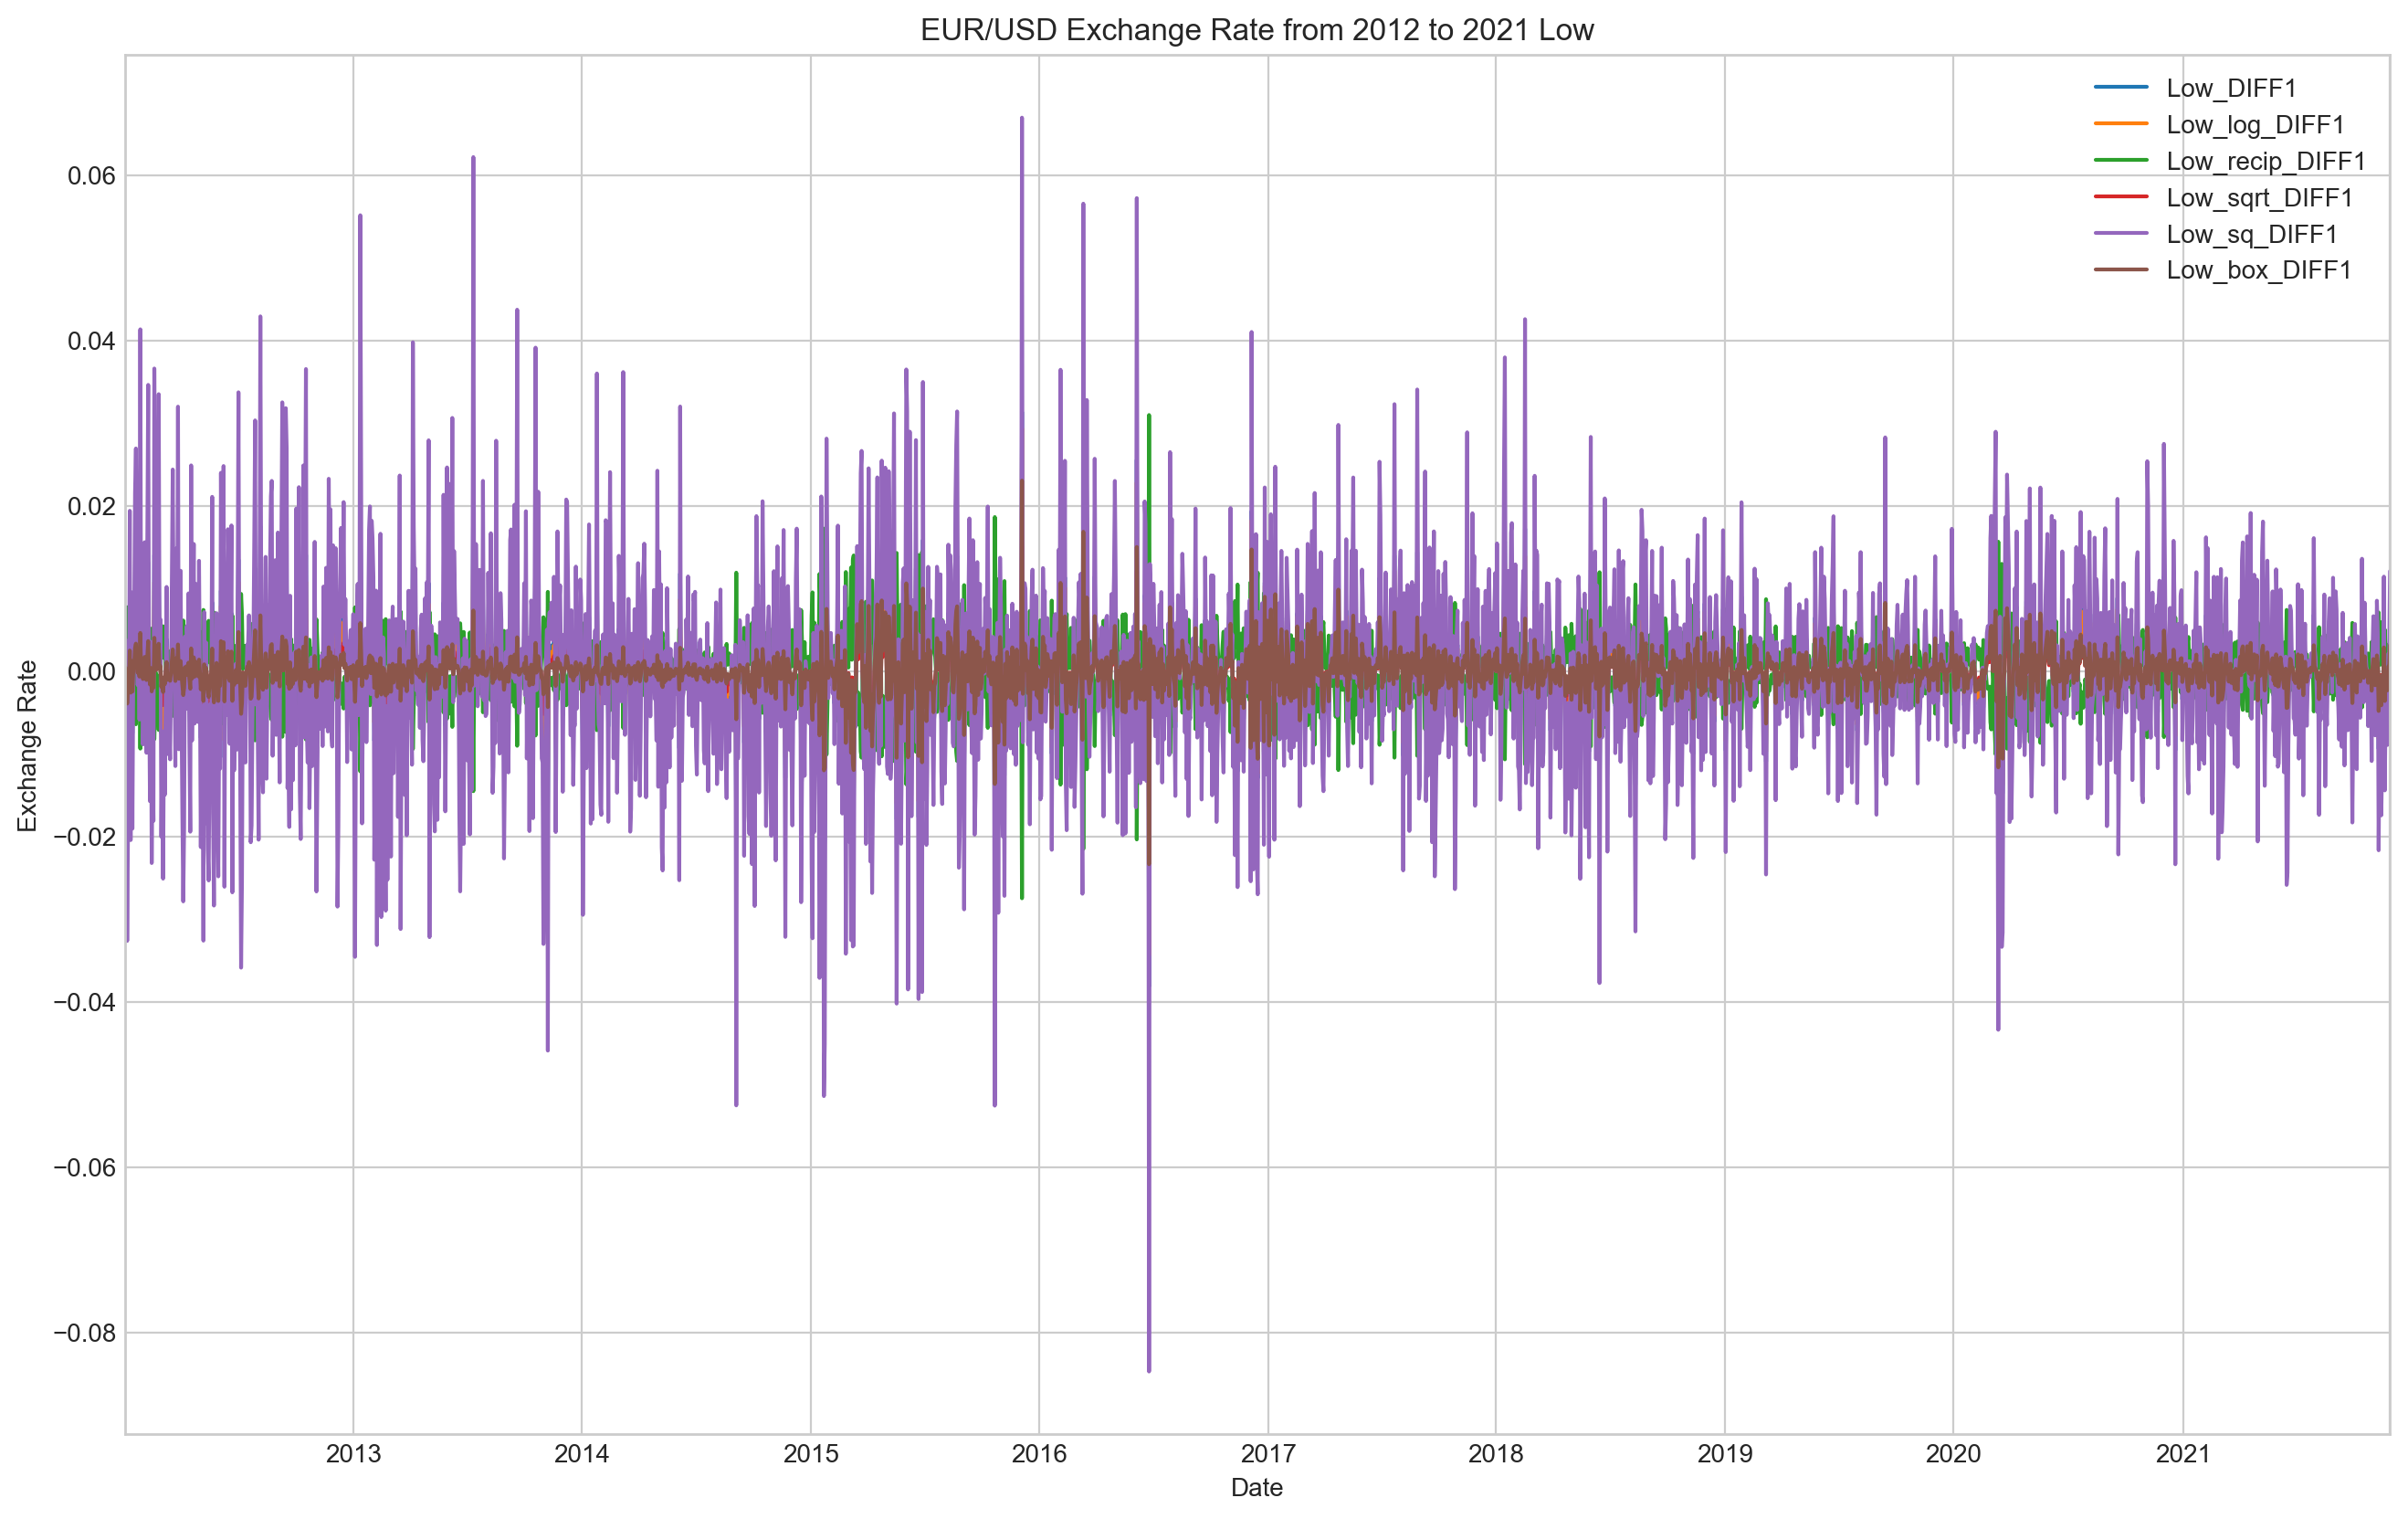

In [45]:
fig, axes = plt.subplots(figsize = (16,10),dpi=200)
style.use('seaborn-whitegrid')

EurUsd_data_low[['Low_DIFF1', 'Low_log_DIFF1', 'Low_recip_DIFF1', 'Low_sqrt_DIFF1', 'Low_sq_DIFF1', 'Low_box_DIFF1']].plot(legend=True,ax=axes);


axes.set_title('EUR/USD Exchange Rate from 2012 to 2021 Low');
axes.autoscale(axis = 'x',tight=True);
axes.set_ylabel('Exchange Rate');

### Train Test validate Split

In [ ]:
### skip ###
#### test set last 90 days #########################
test_high_set = EurUsd_data_high[-90:].copy() #
test_low_set = EurUsd_data_low[-90:].copy() #
####################################################
####################################################
####################################################

#### training and validation set set last 90 days ##
high_set = EurUsd_data_high[:-90].copy()  
low_set = EurUsd_data_low[:-90].copy()

train_high_80 = int(len(high_set)*0.80//1)
train_low_80 = int(len(low_set)*0.80//1)

train_high_set = high_set[:train_high_80].copy() #
validation_high_set = high_set[train_high_80:].copy() #

train_low_set = low_set[:train_low_80].copy() #
validation_low_set = low_set[train_low_80:].copy() #
####################################################
####################################################
####################################################

In [562]:
#### test set last 90 days #########################
test_high_set = EurUsd_data_high[-90:].copy() #
test_low_set = EurUsd_data_low[-90:].copy() #
####################################################
####################################################
####################################################

#### training and validation set set last 90 days ##
high_set = EurUsd_data_high[:-90].copy()  
low_set = EurUsd_data_low[:-90].copy()

train_high_80 = int(len(high_set)*0.80//1)
train_low_80 = int(len(low_set)*0.80//1)
################################################################################################################

### TRAINING SET AND VALIDATION SET ###
from pmdarima import model_selection

train_high_set, validation_high_set = model_selection.train_test_split(high_set, train_size = train_high_80)
train_low_set, validation_low_set = model_selection.train_test_split(low_set, train_size = train_low_80)
################################################################################################################

##  Model Building

## ACF and PACF graphs

In [47]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

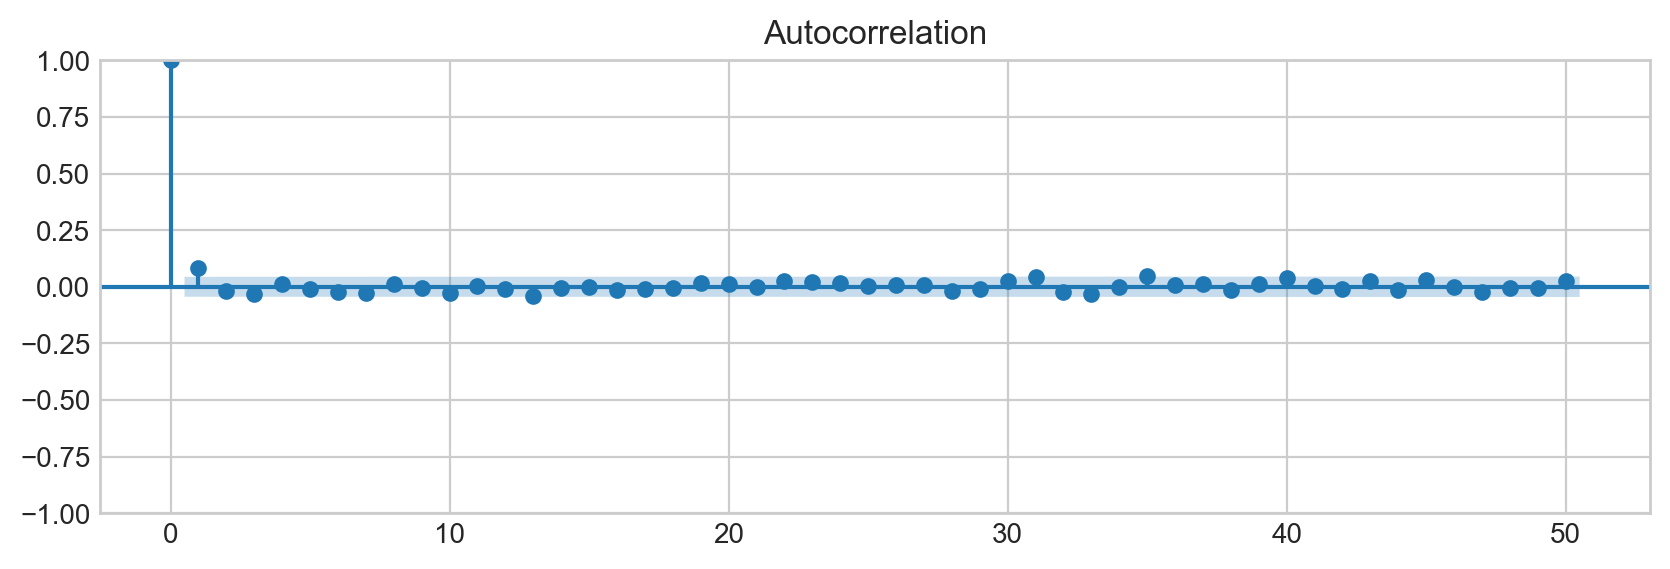

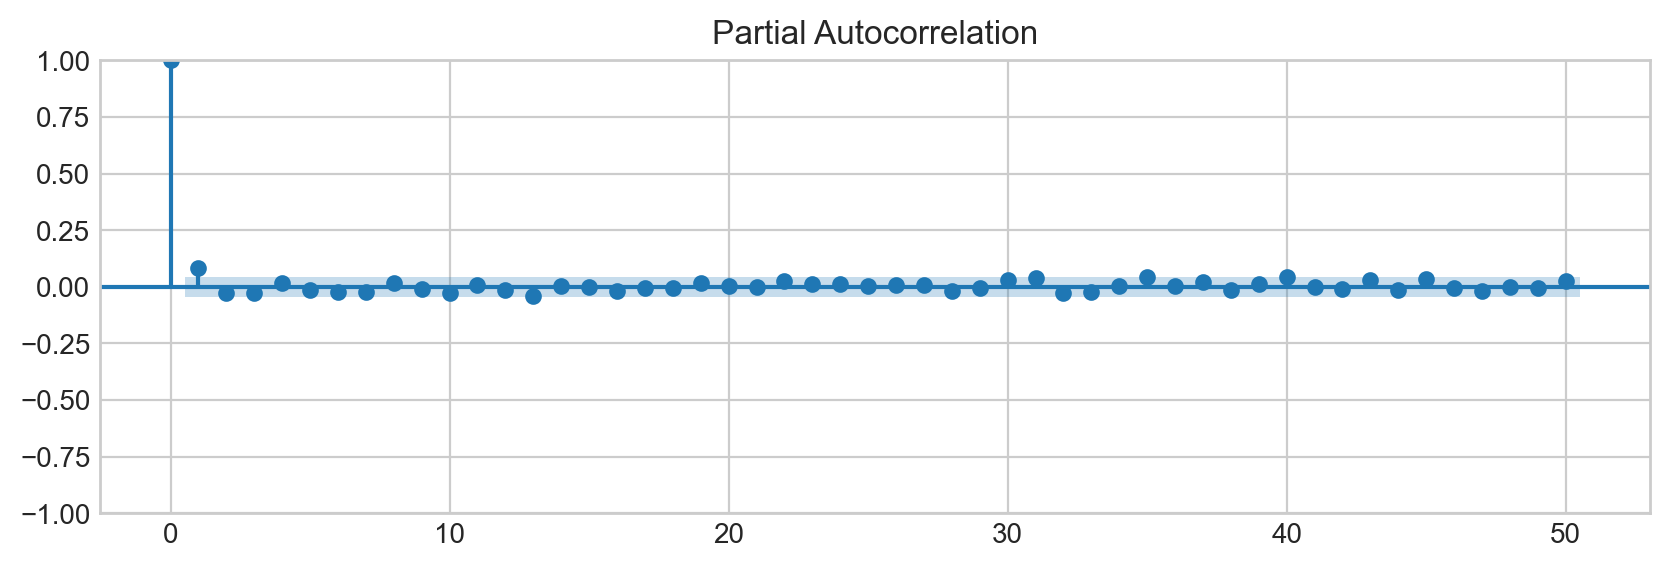

In [58]:
### plot acf high ###

fig, axes = plt.subplots(figsize=(10, 3))
plot_acf(train_high_set['High_DIFF1'].dropna(), ax=axes,lags=50);


### plot pacf high ###

fig, axes = plt.subplots(figsize=(10, 3))
plot_pacf(train_high_set['High_DIFF1'].dropna(), ax=axes,lags=50);

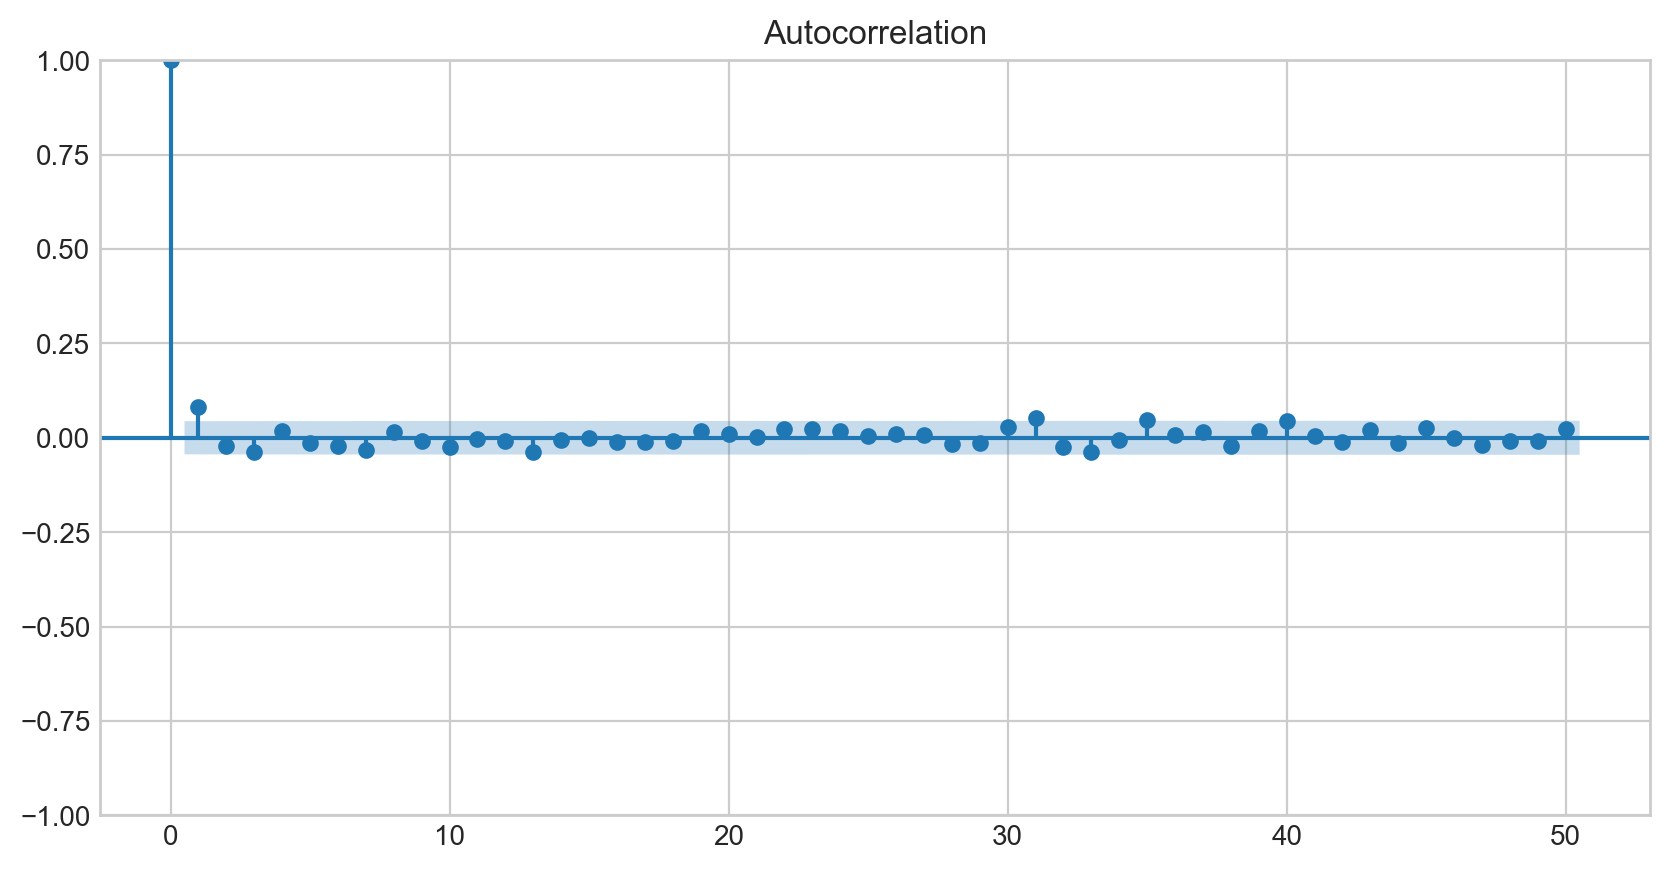

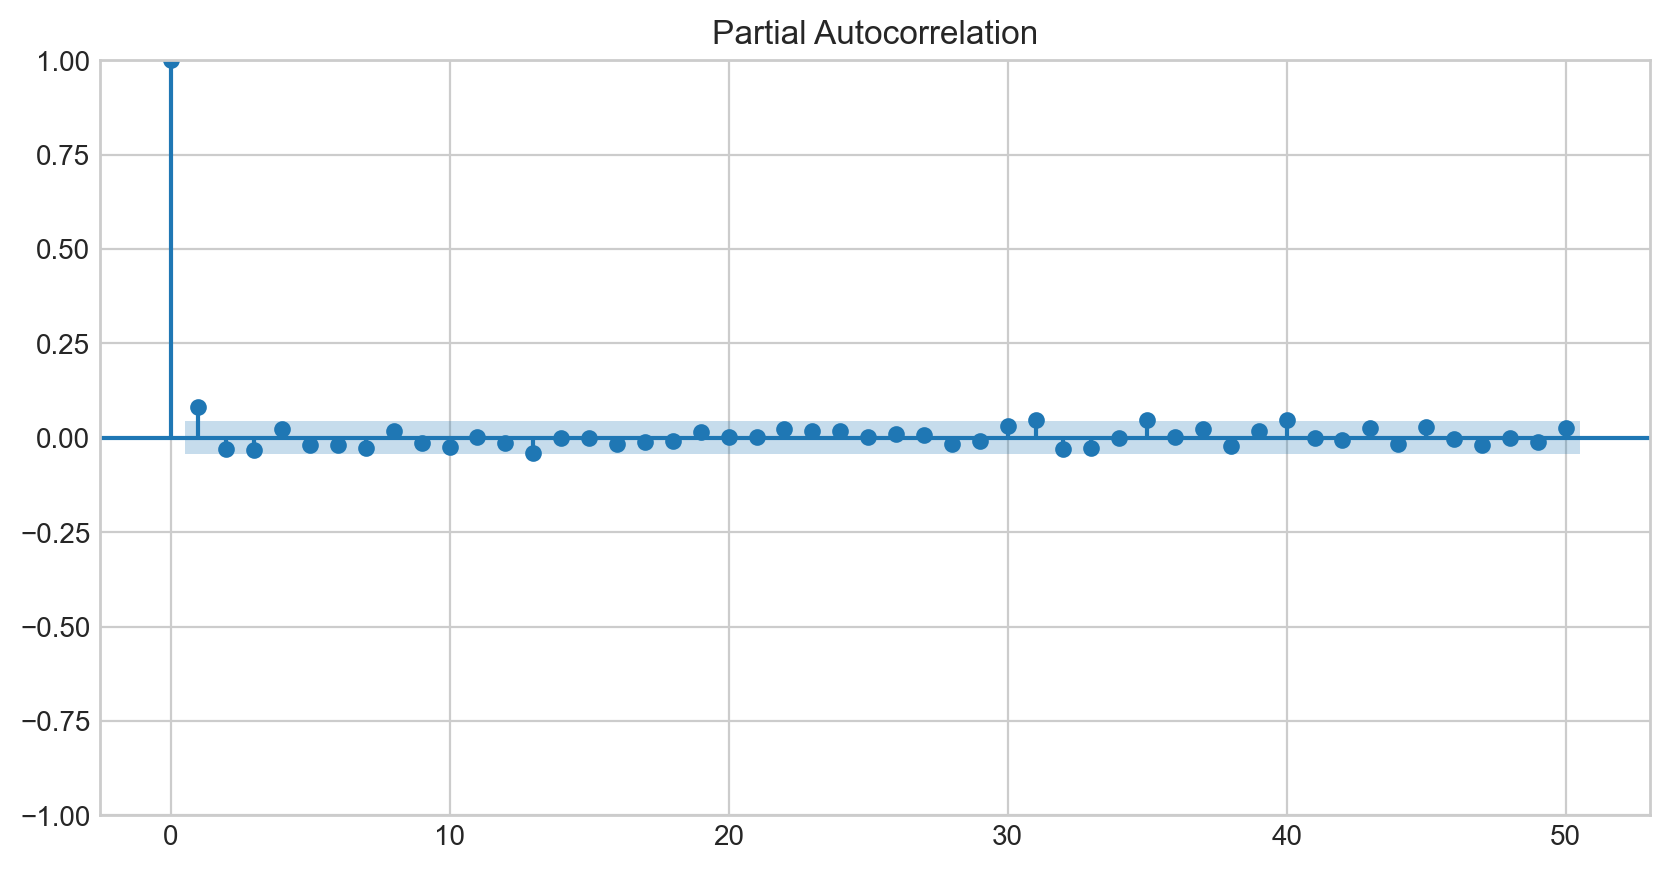

In [114]:
### plot acf high ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_acf(train_high_set['High_log_DIFF1'].dropna(), ax=axes,lags=50);

### plot pacf high ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_pacf(train_high_set['High_log_DIFF1'].dropna(), ax=axes,lags=50);

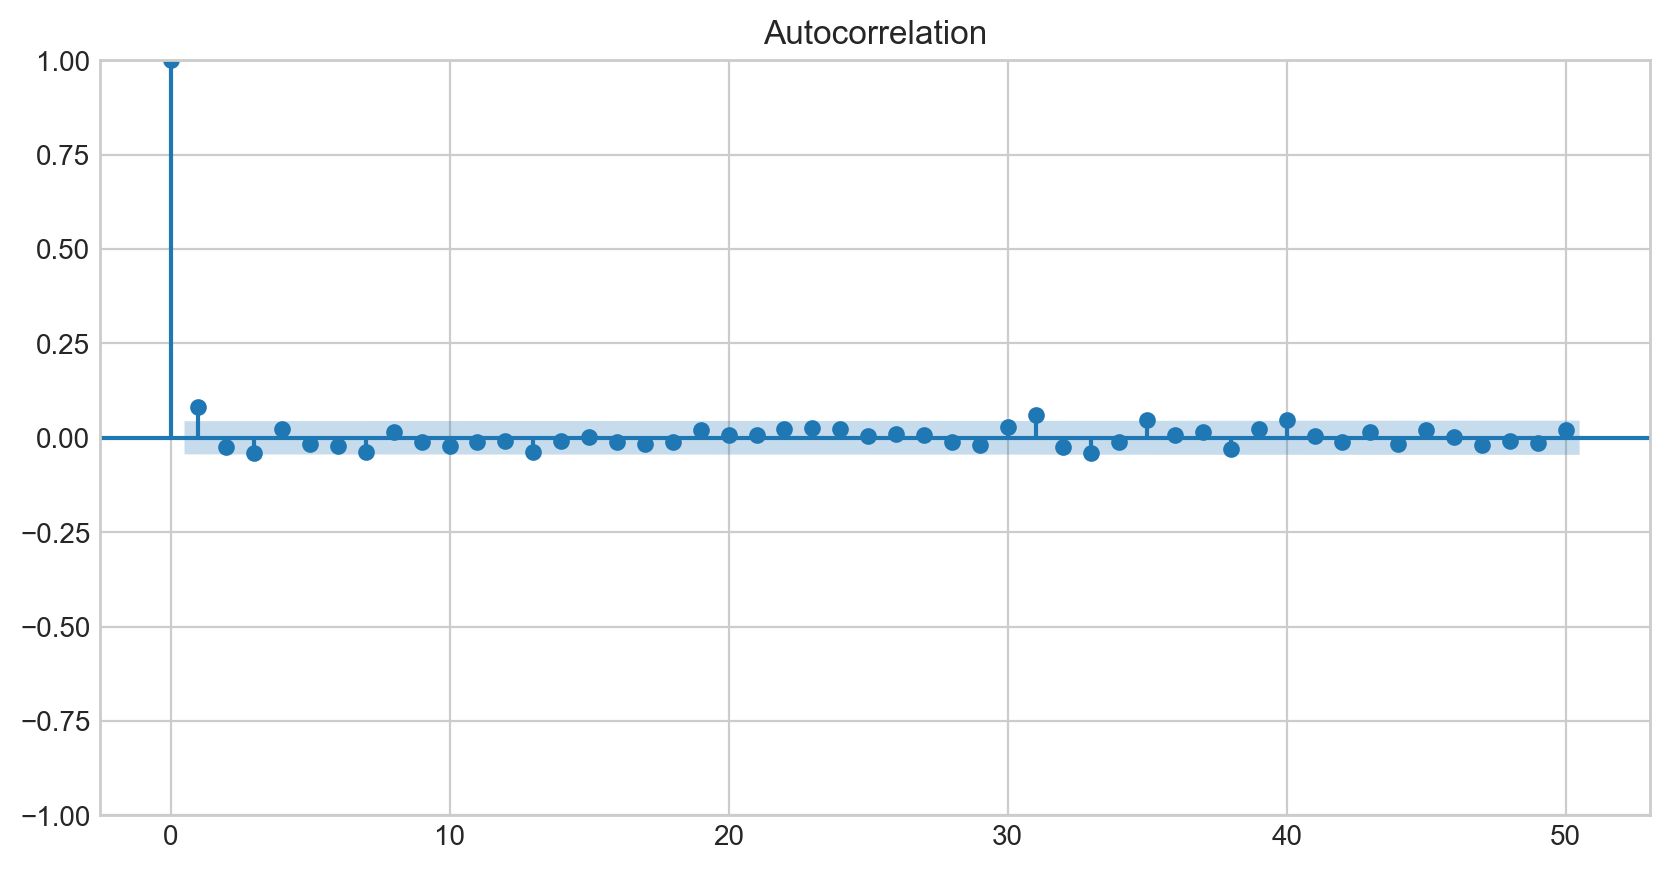

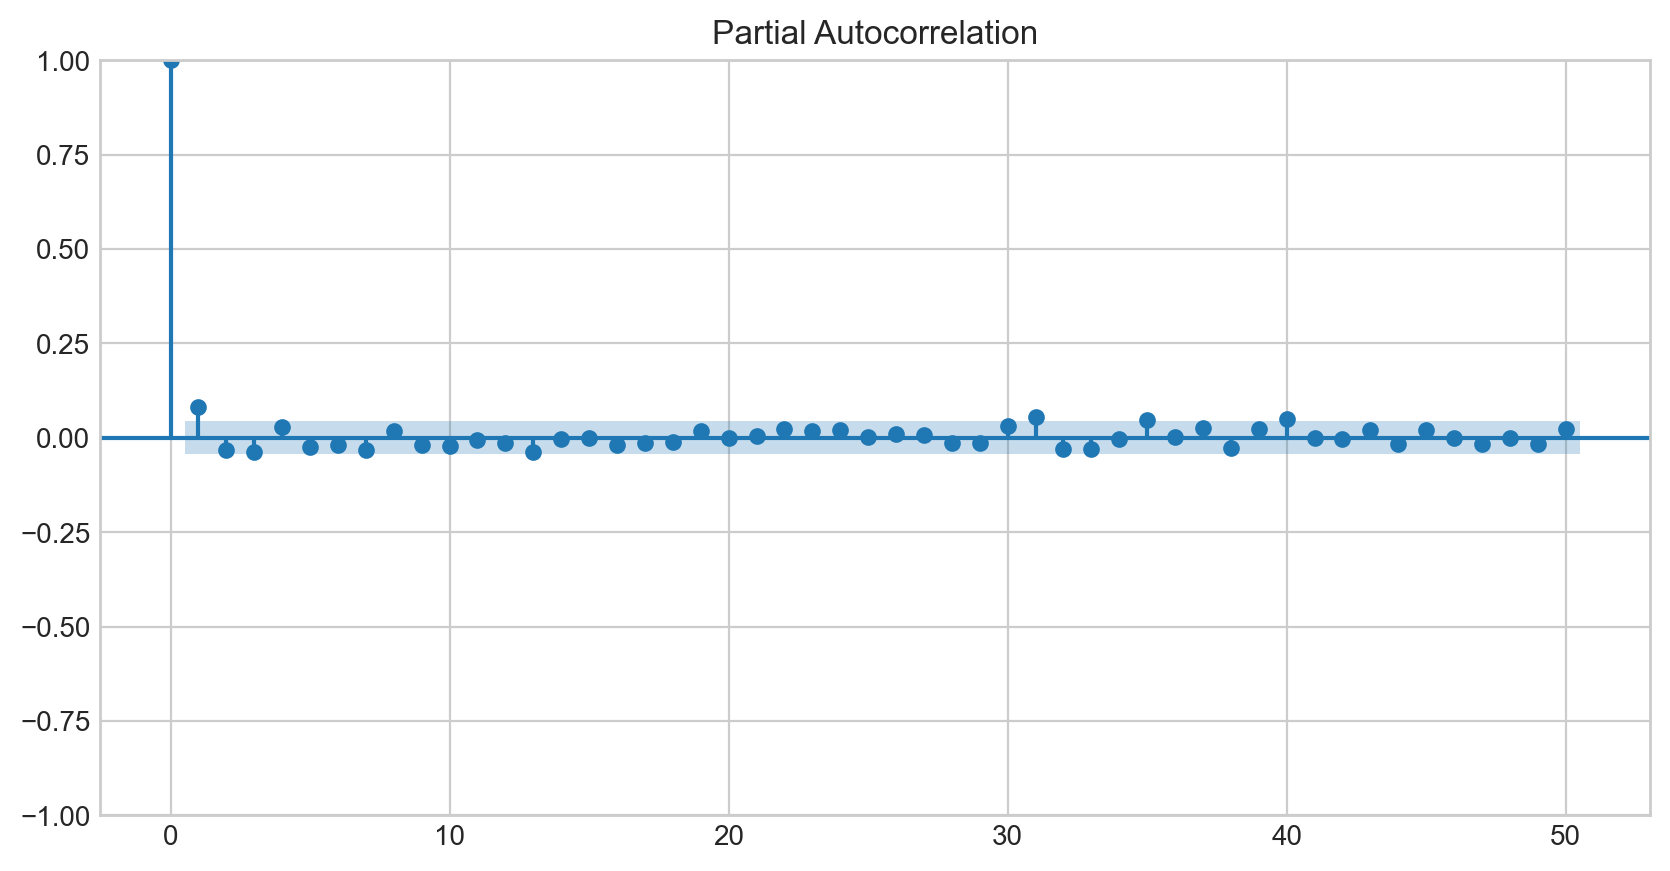

In [115]:
### plot acf high ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_acf(train_high_set['High_recip_DIFF1'].dropna(), ax=axes,lags=50);

### plot pacf high ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_pacf(train_high_set['High_recip_DIFF1'].dropna(), ax=axes,lags=50);

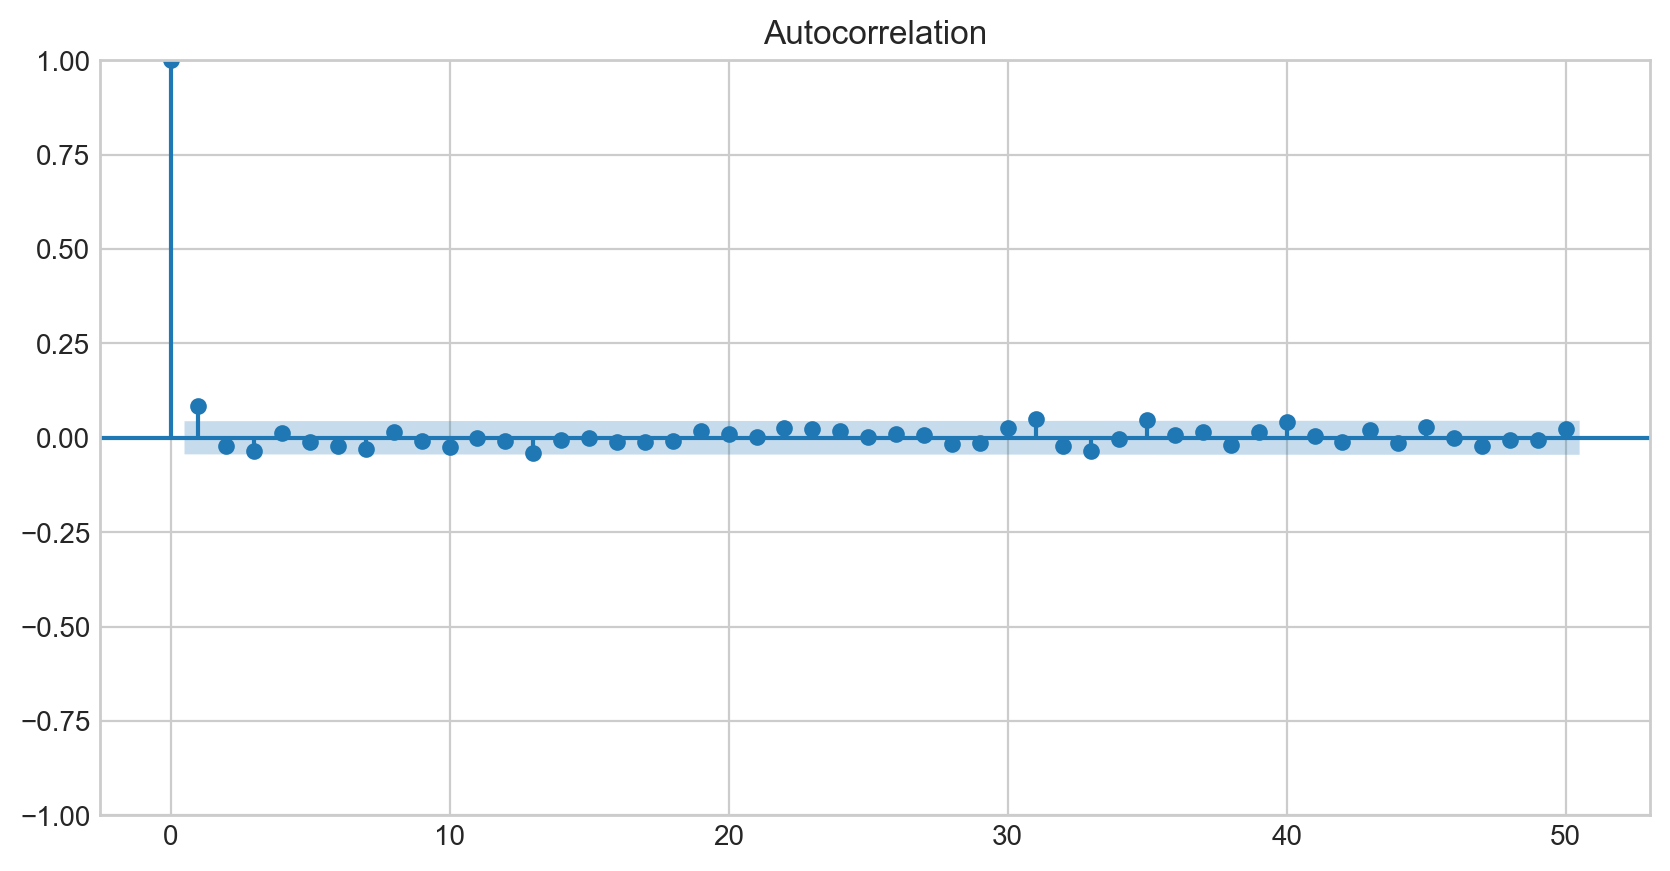

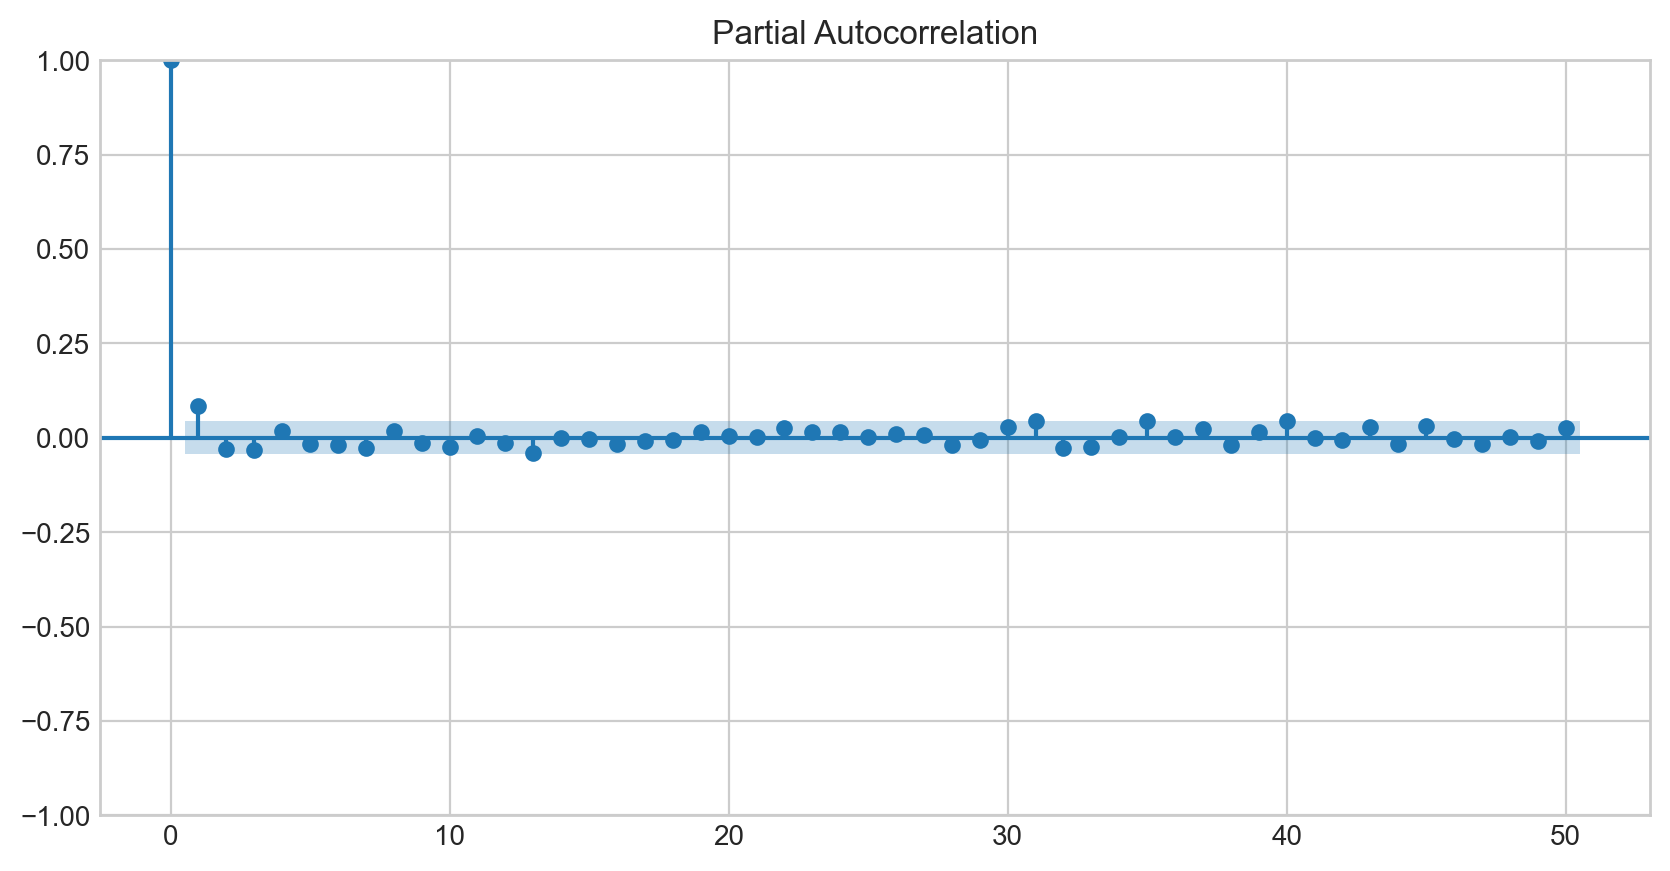

In [116]:
### plot acf high ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_acf(train_high_set['High_sqrt_DIFF1'].dropna(), ax=axes,lags=50);

### plot pacf high ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_pacf(train_high_set['High_sqrt_DIFF1'].dropna(), ax=axes,lags=50);

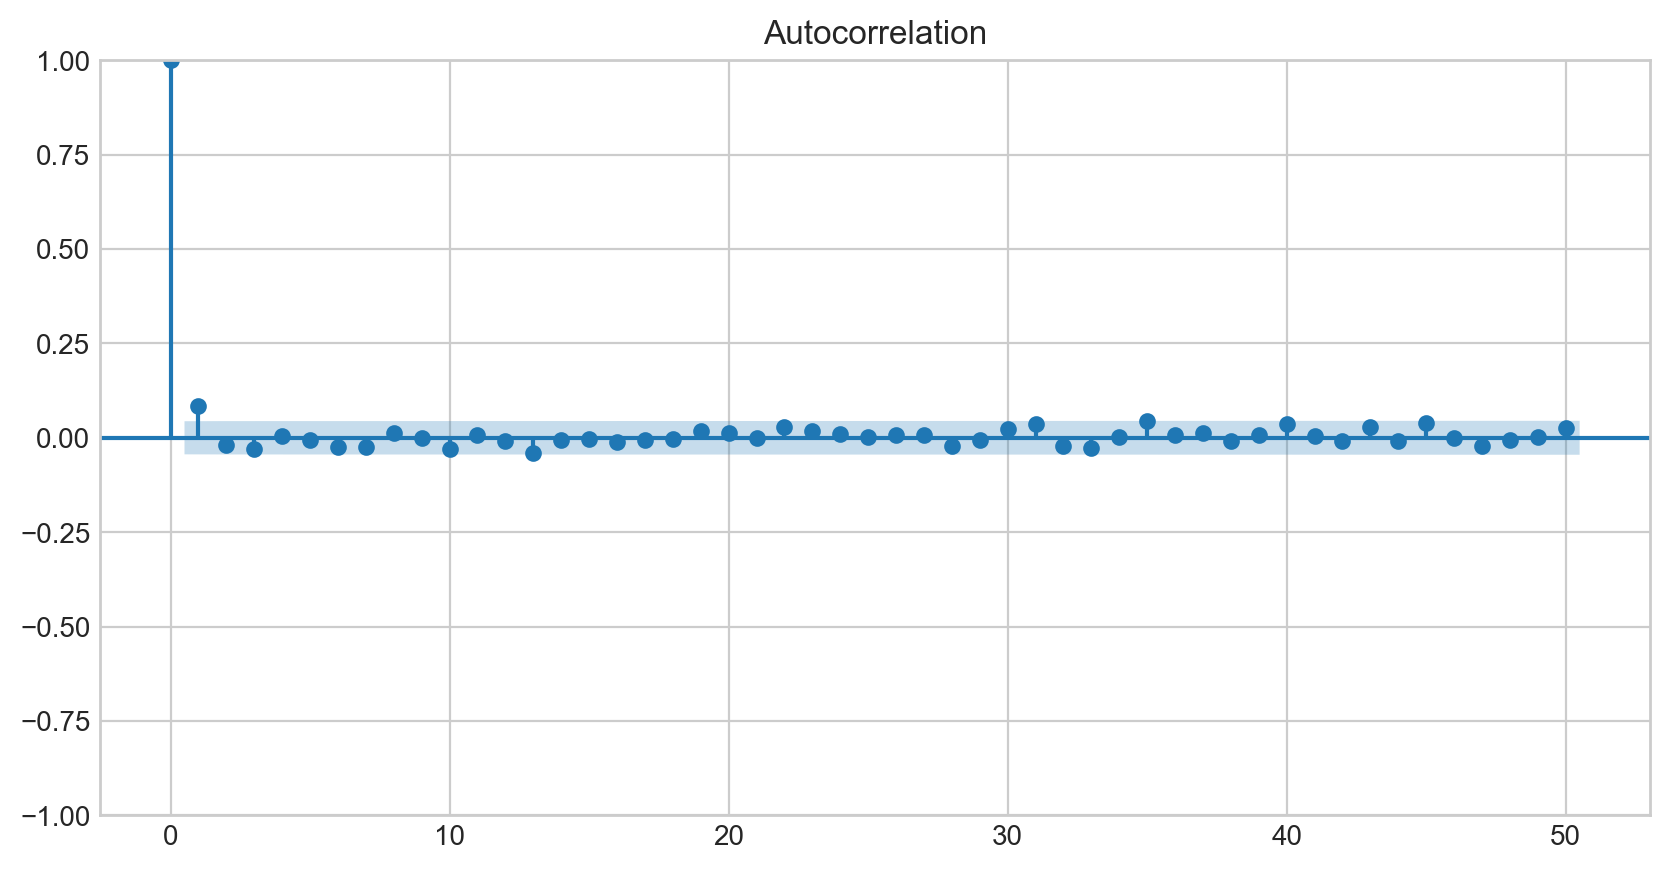

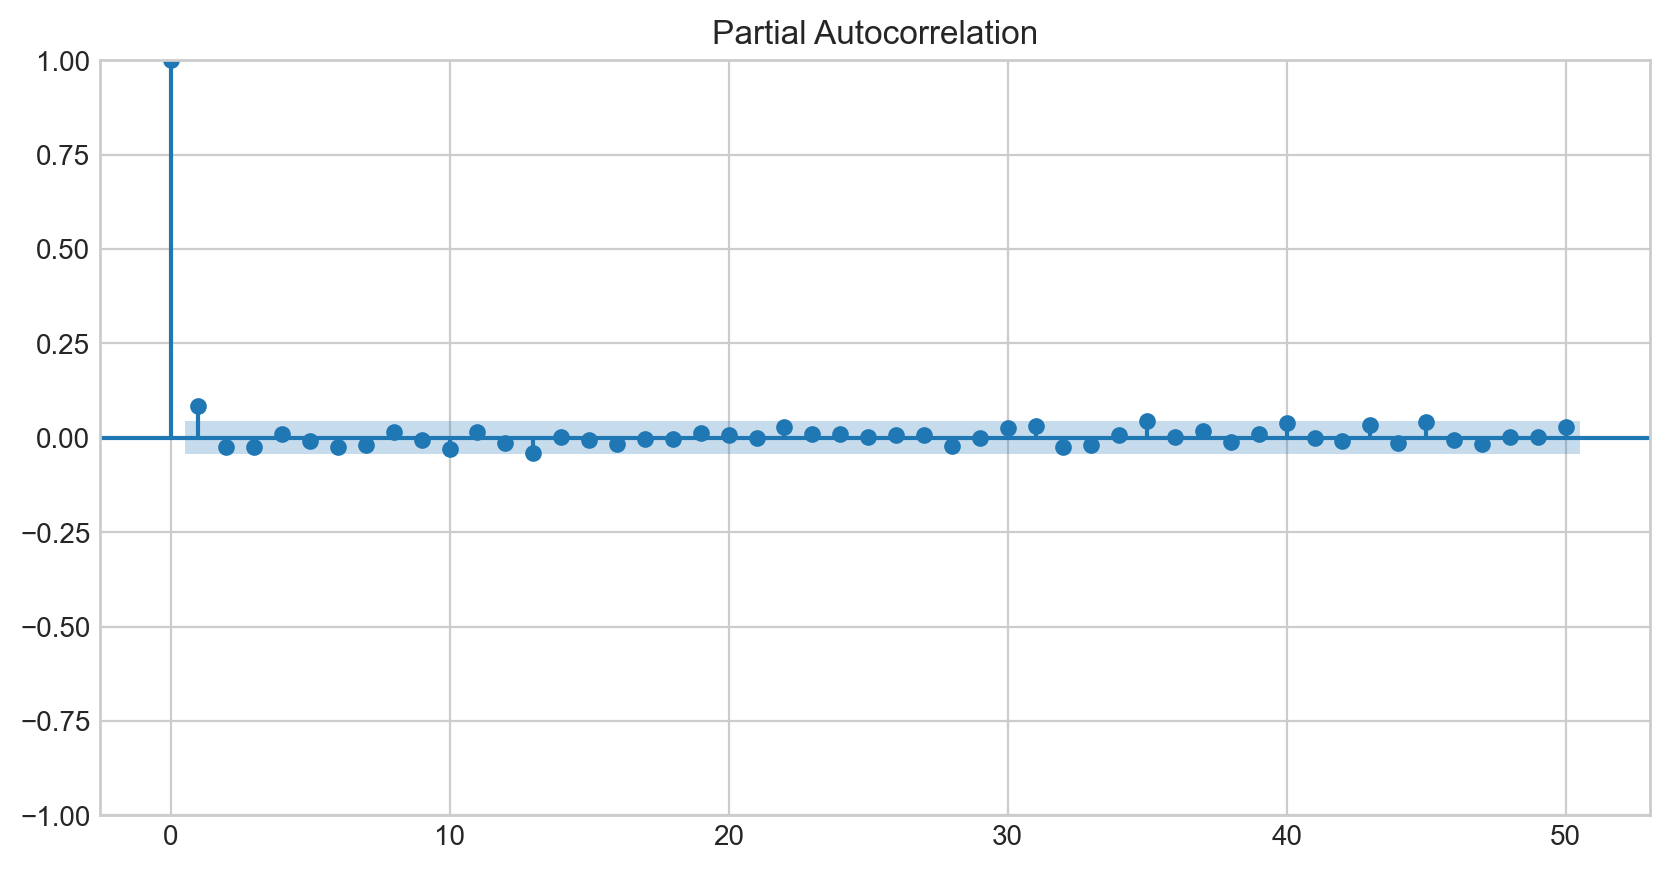

In [117]:
### plot acf high ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_acf(train_high_set['High_sq_DIFF1'].dropna(), ax=axes,lags=50);

### plot pacf high ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_pacf(train_high_set['High_sq_DIFF1'].dropna(), ax=axes,lags=50);

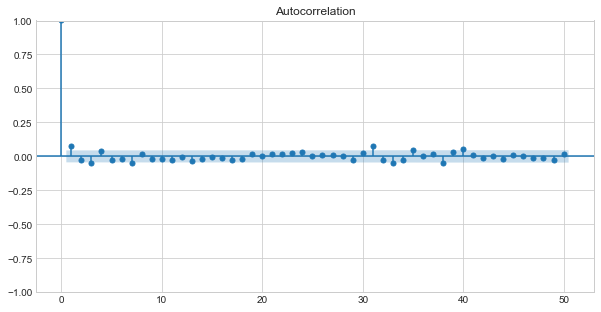

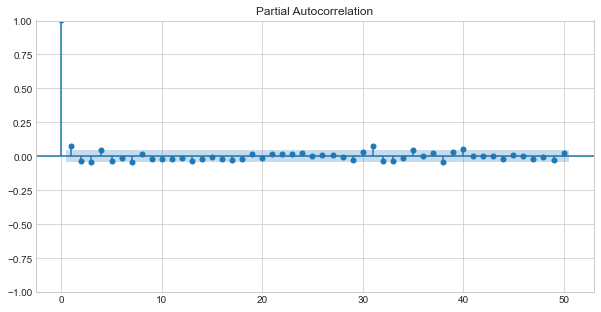

In [68]:
### plot acf high ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_acf(train_high_set['High_box_DIFF1'].dropna(), ax=axes,lags=50);

### plot pacf high ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_pacf(train_high_set['High_box_DIFF1'].dropna(), ax=axes,lags=50);

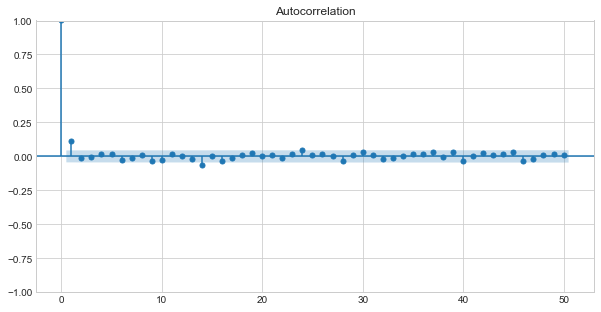

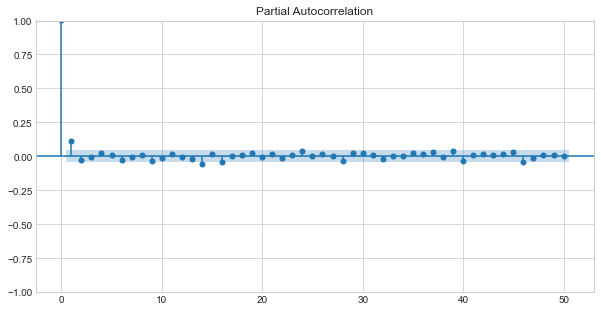

In [69]:
### plot acf low ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_acf(train_low_set['Low_DIFF1'].dropna(), ax=axes,lags=50);


### plot pacf l0w ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_pacf(train_low_set['Low_DIFF1'].dropna(), ax=axes,lags=50);

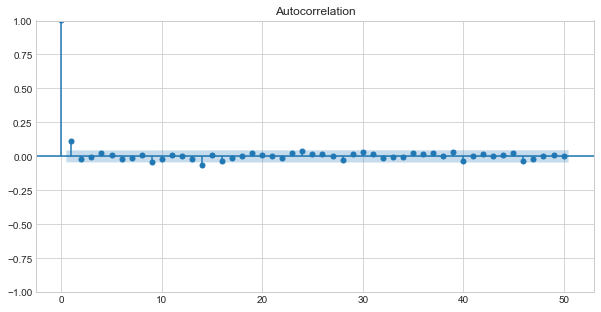

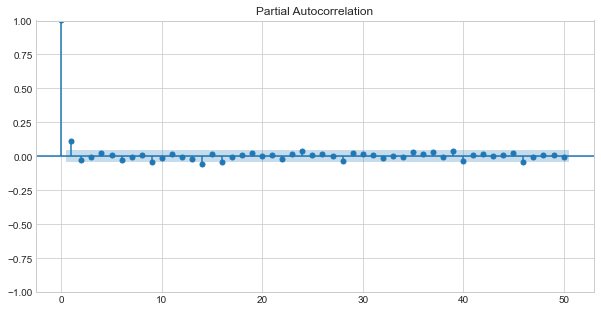

In [70]:
### plot acf low ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_acf(train_low_set['Low_log_DIFF1'].dropna(), ax=axes,lags=50);

### plot pacf low ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_pacf(train_low_set['Low_log_DIFF1'].dropna(), ax=axes,lags=50);

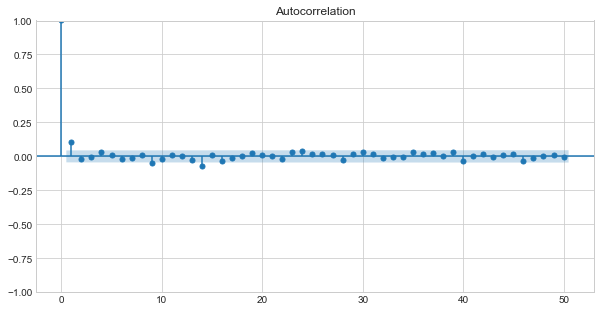

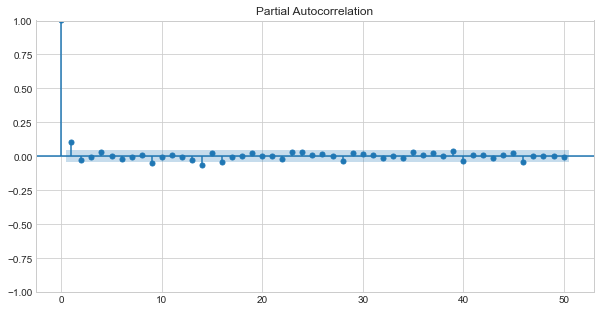

In [71]:
### plot acf low ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_acf(train_low_set['Low_recip_DIFF1'].dropna(), ax=axes,lags=50);

### plot pacf low ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_pacf(train_low_set['Low_recip_DIFF1'].dropna(), ax=axes,lags=50);

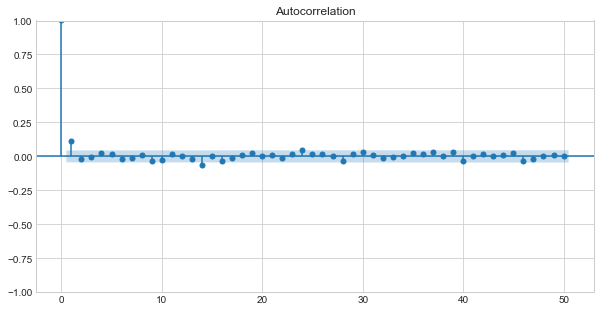

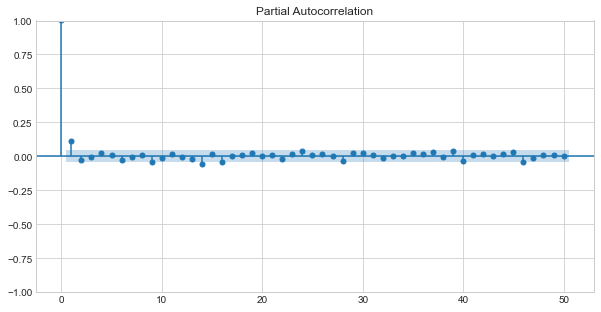

In [72]:
### plot acf low ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_acf(train_low_set['Low_sqrt_DIFF1'].dropna(), ax=axes,lags=50);

### plot pacf low ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_pacf(train_low_set['Low_sqrt_DIFF1'].dropna(), ax=axes,lags=50);

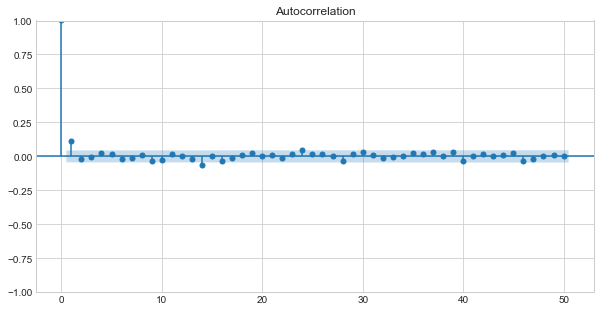

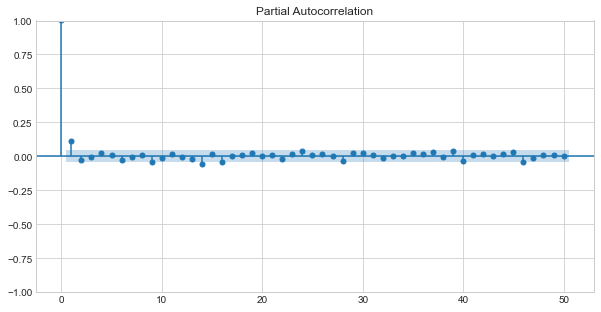

In [73]:
### plot acf low ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_acf(train_low_set['Low_sqrt_DIFF1'].dropna(), ax=axes,lags=50);

### plot pacf low ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_pacf(train_low_set['Low_sqrt_DIFF1'].dropna(), ax=axes,lags=50);

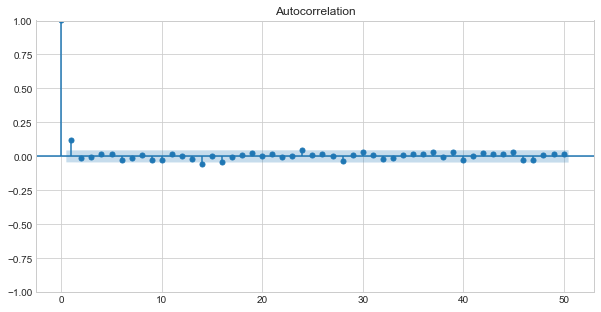

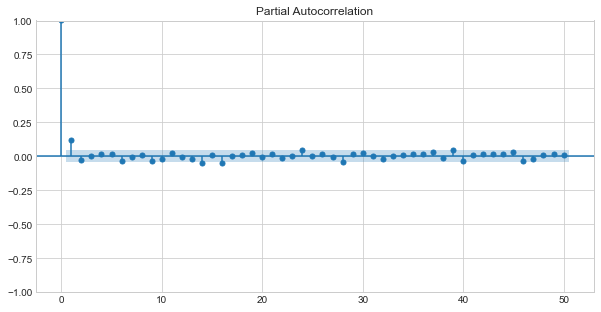

In [74]:
### plot acf low ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_acf(train_low_set['Low_sq_DIFF1'].dropna(), ax=axes,lags=50);

### plot pacf low ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_pacf(train_low_set['Low_sq_DIFF1'].dropna(), ax=axes,lags=50);

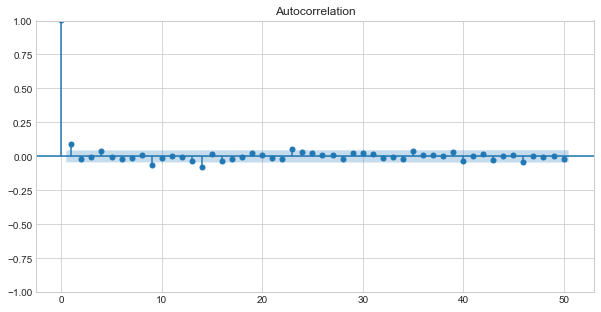

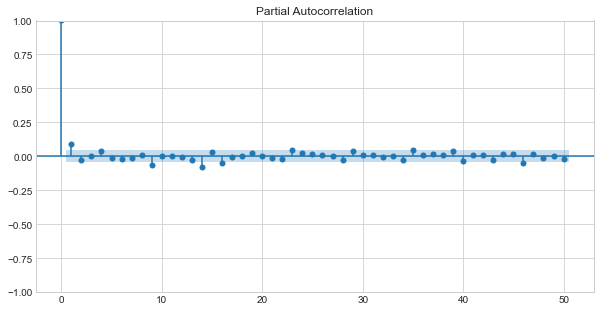

In [75]:
### plot acf low ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_acf(train_low_set['Low_box_DIFF1'].dropna(), ax=axes,lags=50);

### plot pacf low ###

fig, axes = plt.subplots(figsize=(10, 5))
plot_pacf(train_low_set['Low_box_DIFF1'].dropna(), ax=axes,lags=50);

## ARIMA MODELS

In [59]:
#!pip install pmdarima

In [563]:
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
#from pmdarima import auto_arima

In [544]:
### High Arima models pm ###
arima_high_log_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_high_set['High_log'] )
arima_high_log_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_log'] )
arima_high_log_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_high_set['High_log'] )

arima_high_recip_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_high_set['High_recip'] )
arima_high_recip_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_recip'] )
arima_high_recip_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_high_set['High_recip'] )

arima_high_sqrt_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_high_set['High_sqrt'] )
arima_high_sqrt_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_sqrt'] )
arima_high_sqrt_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_high_set['High_sqrt'] )

arima_high_sq_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_high_set['High_sq'] )
arima_high_sq_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_sq'] )
arima_high_sq_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_high_set['High_sq'] )

arima_high_box_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_high_set['High_box'] )
arima_high_box_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_box'] )
arima_high_box_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_high_set['High_box'] )

In [564]:
### High Arima models pm no fit ###
arima_high_log_110 = pm.ARIMA(order=(1, 1, 0))
arima_high_log_011 = pm.ARIMA(order=(0, 1, 1))
arima_high_log_111 = pm.ARIMA(order=(1, 1, 1))

arima_high_recip_110 = pm.ARIMA(order=(1, 1, 0))
arima_high_recip_011 = pm.ARIMA(order=(0, 1, 1))
arima_high_recip_111 = pm.ARIMA(order=(1, 1, 1))

arima_high_sqrt_110 = pm.ARIMA(order=(1, 1, 0))
arima_high_sqrt_011 = pm.ARIMA(order=(0, 1, 1))
arima_high_sqrt_111 = pm.ARIMA(order=(1, 1, 1))

arima_high_sq_110 = pm.ARIMA(order=(1, 1, 0))
arima_high_sq_011 = pm.ARIMA(order=(0, 1, 1))
arima_high_sq_111 = pm.ARIMA(order=(1, 1, 1))

arima_high_box_110 = pm.ARIMA(order=(1, 1, 0))
arima_high_box_011 = pm.ARIMA(order=(0, 1, 1))
arima_high_box_111 = pm.ARIMA(order=(1, 1, 1))

In [545]:
### Low Arima models pm ###
arima_low_log_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_low_set['Low_log'] )
arima_low_log_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_low_set['Low_log'] )
arima_low_log_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_low_set['Low_log'] )

arima_low_recip_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_low_set['Low_recip'] )
arima_low_recip_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_low_set['Low_recip'])
arima_low_recip_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_low_set['Low_recip'] )

arima_low_sqrt_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_low_set['Low_sqrt'] )
arima_low_sqrt_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_low_set['Low_sqrt'] )
arima_low_sqrt_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_low_set['Low_sqrt'] )

arima_low_sq_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_low_set['Low_sq'] )
arima_low_sq_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_low_set['Low_sq'] )
arima_low_sq_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_low_set['Low_sq'] )

arima_low_box_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_low_set['Low_box'] )
arima_low_box_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_low_set['Low_box'] )
arima_low_box_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_low_set['Low_box'] )

In [565]:
### Low Arima models pm no fit ###
arima_low_log_110 = pm.ARIMA(order=(1, 1, 0))
arima_low_log_011 = pm.ARIMA(order=(0, 1, 1))
arima_low_log_111 = pm.ARIMA(order=(1, 1, 1))

arima_low_recip_110 = pm.ARIMA(order=(1, 1, 0))
arima_low_recip_011 = pm.ARIMA(order=(0, 1, 1))
arima_low_recip_111 = pm.ARIMA(order=(1, 1, 1))

arima_low_sqrt_110 = pm.ARIMA(order=(1, 1, 0))
arima_low_sqrt_011 = pm.ARIMA(order=(0, 1, 1))
arima_low_sqrt_111 = pm.ARIMA(order=(1, 1, 1))

arima_low_sq_110 = pm.ARIMA(order=(1, 1, 0))
arima_low_sq_011 = pm.ARIMA(order=(0, 1, 1))
arima_low_sq_111 = pm.ARIMA(order=(1, 1, 1))

arima_low_box_110 = pm.ARIMA(order=(1, 1, 0))
arima_low_box_011 = pm.ARIMA(order=(0, 1, 1))
arima_low_box_111 = pm.ARIMA(order=(1, 1, 1))

In [566]:
### High models in a list ###
my_high_arima_list = [arima_high_log_110,arima_high_log_011 ,arima_high_log_111,
           arima_high_recip_110,arima_high_recip_011,arima_high_recip_111,
           arima_high_sqrt_110,arima_high_sqrt_011,arima_high_sqrt_111,
           arima_high_sq_110,arima_high_sq_011,arima_high_sq_111,
           arima_high_box_110,arima_high_box_011,arima_high_box_111]

In [567]:
### Low models in a list ###
my_low_arima_list = [arima_low_log_110,arima_low_log_011 ,arima_low_log_111,
           arima_low_recip_110,arima_low_recip_011,arima_low_recip_111,
           arima_low_sqrt_110,arima_low_sqrt_011,arima_low_sqrt_111,
           arima_low_sq_110,arima_low_sq_011,arima_low_sq_111,
           arima_low_box_110,arima_low_box_011,arima_low_box_111]

In [568]:
my_high_arima_names_list = ['high_log_110','high_log_011','high_log_111',
                         'high_recip_110','high_recip_011','high_recip_111',
                         'high_sqrt_110','high_sqrt_011','high_sqrt_111',
                         'high_sq_110','high_sq_011','high_sq_111',
                         'high_box_110','high_box_011','high_box_111']
                         
my_low_arima_names_list = ['low_log_110','low_log_011','low_log_111',
                         'low_recip_110','low_recip_011','low_recip_111',
                         'low_sqrt_110','low_sqrt_011','low_sqrt_111',
                         'low_sq_110','low_sq_011','low_sq_111',
                         'low_box_110','low_box_011','low_box_111'] 

# my time series class

In [571]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
class pre_model_selection:
    
    def __init__(self,model,model_name,model_order):
        
        self.model = model
        self.model_name = model_name
        self.model_order = model_order
        self.model_aic = model.aic()
        self.y = None
        self.yhat = None
        self.transformation_type = None
        self.yhat = None
        self.level = None
        self.AIC = None
        self.r_squared = None
        self.rmse = None
        self.mape = None
        self.mae = None
        
    ### get metrics ########################################################
    def get_r_squared(self):
        self.r_squared = round(r2_score(self.y,self.yhat),7)
        return self.r_squared,
    
    def get_rmse(self):
        self.rmse = round(mean_squared_error(self.y,self.yhat,squared=False),7)
        return self.rmse
        
    
    def get_mape(self):
        self.mape = round(mean_absolute_percentage_error(self.y,self.yhat),7)
        return  self.mape
    
    def get_mae(self):
        self.mae = round(mean_absolute_error(self.y,self.yhat),7)
        return self.mae
    
    def get_AIC(self):
      
        residuals = (np.array(self.y) - np.array(self.yhat))[0]
        rss = sum(residuals**2)
        k= self.model_order[0]+self.model_order[1]+self.model_order[2] + 1 # p + d + q + 1
        n = len(self.yhat)
        self.AIC = round( 2*k + n*( np.log( 2*(np.pi)*rss/n)+1),7 )
        
        return self.AIC
    
   

    
    
    
        
    ### get methods ########################################################
    def get_aic(self):
        return self.model.aic()
    
    def get_name(self):
        return self.model_name
    
    def get_model_order(self):
        return self.model_order
    
    def get_transformation_type(self):
        return self.transformation_type
    
    def get_level(self):
        return self.level
    
    def get_model(self):
        return self.model
    
    ### setter methods ######################################################
    def set_yhat(self,x):
        self.yhat = x
        
    def set_transformation_type(self,x):
        transformations = [None,'log','sqrt','sq','recipical','box']
        if x.lower() in transformations:
            self.transformation_type = x
        else:
            print(f'Invalid input, value must be {transformations}')
            
    def set_yhat(self,x):
        
        if self.transformation_type == 'log':
            self.yhat = invert_log_transformer(x)
        
        elif self.transformation_type == 'sqrt':
            self.yhat = invert_sqrt_transformer(x)
        
        elif self.transformation_type == 'sq':
            self.yhat = invert_sq_transformer(x)
        
        elif self.transformation_type == 'recipical':
            self.yhat = invert_recipical_transformer(x)
        
        elif self.transformation_type == 'box':
            if self.level == 'high':
                self.yhat = invert_boxcox_transformer_high(x,lambda_high)
            else:
                self.yhat = invert_boxcox_transformer_low(x,lambda_low)
        else:
            self.yhat = x
        
                
    def set_level(self,x):
        
        levels = ['high','low',None]
        
        if x.lower() in levels:
            self.level = x
        else:
            print(f'invalid input, levels must be {levels}')
            
    def set_y(self,x):
        self.y = x
            
    ######################################################
    
    def __str__(self):
        return f"####################\nMODEL:{self.model_name}\nOrder:{self.model_order}\nTransform:{self.transformation_type}\nLevel:{self.level}\n\n\nR_Square:{self.r_squared}\nAIC:{self.AIC}\nrmse:{self.rmse}\nmape:{self.mape}\nmae:{self.mae}\n##############################\n\n\n"
    
    

### best high models

In [550]:
best_high_models_search = []
order_list = [(0,1,1),(1,1,0),(1,1,1)]
dummy = 0

for i,j in zip(my_high_arima_list,my_high_arima_names_list):
    index = dummy%3
    model = pre_model_selection(i,j,order_list[index])
    best_high_models_search.append(model)
    dummy = dummy + 1
        
from operator import attrgetter
best_high_models_search.sort(key = attrgetter('model_aic'), reverse = False)

for i in best_high_models_search:
    print(i.get_name())
    print(i.get_aic())

high_sqrt_011
-18149.008348262985
high_sqrt_110
-18148.396836436175
high_sqrt_111
-18147.245745087494
high_box_011
-17887.555641029066
high_box_110
-17886.916889989
high_box_111
-17885.875561099074
high_recip_011
-16334.215374381918
high_recip_110
-16333.56554999737
high_recip_111
-16332.481407599302
high_log_011
-15711.882084453511
high_log_110
-15711.239914613721
high_log_111
-15710.128338415023
high_sq_011
-11556.861224031645
high_sq_110
-11556.290304790135
high_sq_111
-11555.073528093126


In [290]:
# skip do not run
arima_high_log_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_log'] )
arima_high_recip_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_recip'] )
arima_high_sqrt_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_sqrt'] )
arima_high_sq_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_sq'] )
arima_high_box_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_box'] )

best_high_models = [arima_high_log_011, 
                    arima_high_recip_011,
                    arima_high_sqrt_011,
                    arima_high_sq_011,
                    arima_high_box_011]

my_high_arima_names_list = ['high_log_011','high_recip_011','high_sqrt_011','high_sq_011','high_box_011']

best_high_models_final = []
order_list = [(0,1,1)]

for i,j in zip(best_high_models,my_high_arima_names_list):
    index = 0
    model = pre_model_selection(i,j,order_list[index])
    best_high_models_final.append(model)
        
from operator import attrgetter
best_high_models_final.sort(key = attrgetter('model_aic'), reverse = False)

for i in best_high_models_final:
    print(i.get_name())
    print(i.get_aic())

high_sqrt_011
-18149.008348262985
high_box_011
-17887.555641029066
high_recip_011
-16334.215374381918
high_log_011
-15711.882084453511
high_sq_011
-11556.861224031645


### best low models

In [551]:
best_low_models_search = []
order_list = [(0,1,1),(1,1,0),(1,1,1)]
dummy = 0

for i,j in zip(my_low_arima_list,my_low_arima_names_list):
    index = dummy%3
    model = pre_model_selection(i,j,order_list[index])
    best_low_models_search.append(model)
    dummy = dummy +1
        
from operator import attrgetter
best_low_models_search.sort(key = attrgetter('model_aic'), reverse = False)

for i in best_low_models_search:
    print(i.get_name())
    print(i.get_aic())

low_sqrt_011
-18416.34388925563
low_sqrt_110
-18415.253386203687
low_sqrt_111
-18414.58340118635
low_box_011
-17968.423967756542
low_box_110
-17967.60265158904
low_box_111
-17966.737299141634
low_recip_011
-16563.577268219608
low_recip_110
-16562.567399970103
low_recip_111
-16561.837961937123
low_log_011
-15967.143088034947
low_log_110
-15966.077334222857
low_log_111
-15965.399949874489
low_sq_011
-11857.054222624683
low_sq_110
-11855.883478840471
low_sq_111
-11855.295947039824


In [292]:
# skip do not run 
arima_low_log_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_low_set['Low_log'] )
arima_low_recip_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_low_set['Low_recip'])
arima_low_sqrt_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_low_set['Low_sqrt'] )
arima_low_sq_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_low_set['Low_sq'] )
arima_low_box_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_low_set['Low_box'] )

best_low_models = [arima_low_log_011,
                    arima_low_recip_011,
                    arima_low_sqrt_011,
                    arima_low_sq_011,
                    arima_low_box_011 ]

my_low_arima_names_list =  ['low_log_011','low_recip_011','low_sqrt_011','low_sq_011','low_box_011']

best_low_models_final = []
order_list = [(0,1,1)]

for i,j in zip(best_low_models,my_low_arima_names_list):
    index = 0
    model = pre_model_selection(i,j,order_list[index])
    best_low_models_final.append(model)
        
from operator import attrgetter
best_low_models_final.sort(key = attrgetter('model_aic'), reverse = False)

for i in best_low_models_final:
    print(i.get_name())
    print(i.get_aic())

low_sqrt_011
-18416.34388925563
low_box_011
-17968.423967756542
low_recip_011
-16563.577268219608
low_log_011
-15967.143088034947
low_sq_011
-11857.054222624683


In [552]:
for i in best_high_models_search:
    i.set_level('high')
    

best_high_models_search[0].set_transformation_type('sqrt')
best_high_models_search[1].set_transformation_type('sqrt')
best_high_models_search[2].set_transformation_type('sqrt')
best_high_models_search[3].set_transformation_type('box')
best_high_models_search[4].set_transformation_type('box')
best_high_models_search[5].set_transformation_type('box')
best_high_models_search[6].set_transformation_type('recipical')
best_high_models_search[7].set_transformation_type('recipical')
best_high_models_search[8].set_transformation_type('recipical')
best_high_models_search[9].set_transformation_type('log')
best_high_models_search[10].set_transformation_type('log')
best_high_models_search[11].set_transformation_type('log')
best_high_models_search[12].set_transformation_type('sq')
best_high_models_search[13].set_transformation_type('sq')
best_high_models_search[14].set_transformation_type('sq')

In [553]:
for i in best_low_models_search:
    i.set_level('low')
    

best_low_models_search[0].set_transformation_type('sqrt')
best_low_models_search[1].set_transformation_type('sqrt')
best_low_models_search[2].set_transformation_type('sqrt')
best_low_models_search[3].set_transformation_type('box')
best_low_models_search[4].set_transformation_type('box')
best_low_models_search[5].set_transformation_type('box')
best_low_models_search[6].set_transformation_type('recipical')
best_low_models_search[7].set_transformation_type('recipical')
best_low_models_search[8].set_transformation_type('recipical')
best_low_models_search[9].set_transformation_type('log')
best_low_models_search[10].set_transformation_type('log')
best_low_models_search[11].set_transformation_type('log')
best_low_models_search[12].set_transformation_type('sq')
best_low_models_search[13].set_transformation_type('sq')
best_low_models_search[14].set_transformation_type('sq')

In [573]:
validation_high_names = ['High_sqrt','High_sqrt','High_sqrt',
                         'High_box','High_box','High_box',
                         'High_recip','High_recip','High_recip',
                         'High_log','High_log','High_log',
                         'High_sq','High_sq','High_sq']

validation_low_names = ['Low_sqrt','Low_sqrt','Low_sqrt',
                        'Low_box','Low_box','Low_box',
                        'Low_recip','Low_recip','Low_recip','Low_recip',
                        'Low_log','Low_log','Low_log',
                        'Low_sq','Low_sq','Low_sq']

## Cross Validation

In [ ]:
### High Arima models pm ###
arima_high_log_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_high_set['High_log'] )
arima_high_log_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_log'] )
arima_high_log_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_high_set['High_log'] )

arima_high_recip_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_high_set['High_recip'] )
arima_high_recip_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_recip'] )
arima_high_recip_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_high_set['High_recip'] )

arima_high_sqrt_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_high_set['High_sqrt'] )
arima_high_sqrt_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_sqrt'] )
arima_high_sqrt_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_high_set['High_sqrt'] )

arima_high_sq_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_high_set['High_sq'] )
arima_high_sq_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_sq'] )
arima_high_sq_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_high_set['High_sq'] )

arima_high_box_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_high_set['High_box'] )
arima_high_box_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_box'] )
arima_high_box_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_high_set['High_box'] )

In [572]:
### High Arima models pm ###
arima_high_log_110 = pm.ARIMA(order=(1, 1, 0))
arima_high_log_011 = pm.ARIMA(order=(0, 1, 1))
arima_high_log_111 = pm.ARIMA(order=(1, 1, 1))

arima_high_recip_110 = pm.ARIMA(order=(1, 1, 0))
arima_high_recip_011 = pm.ARIMA(order=(0, 1, 1))
arima_high_recip_111 = pm.ARIMA(order=(1, 1, 1))

arima_high_sqrt_110 = pm.ARIMA(order=(1, 1, 0))
arima_high_sqrt_011 = pm.ARIMA(order=(0, 1, 1))
arima_high_sqrt_111 = pm.ARIMA(order=(1, 1, 1))

arima_high_sq_110 = pm.ARIMA(order=(1, 1, 0))
arima_high_sq_011 = pm.ARIMA(order=(0, 1, 1))
arima_high_sq_111 = pm.ARIMA(order=(1, 1, 1))

arima_high_box_110 = pm.ARIMA(order=(1, 1, 0))
arima_high_box_011 = pm.ARIMA(order=(0, 1, 1))
arima_high_box_111 = pm.ARIMA(order=(1, 1, 1))
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
### Low Arima models pm no fit ###
arima_low_log_110 = pm.ARIMA(order=(1, 1, 0))
arima_low_log_011 = pm.ARIMA(order=(0, 1, 1))
arima_low_log_111 = pm.ARIMA(order=(1, 1, 1))

arima_low_recip_110 = pm.ARIMA(order=(1, 1, 0))
arima_low_recip_011 = pm.ARIMA(order=(0, 1, 1))
arima_low_recip_111 = pm.ARIMA(order=(1, 1, 1))

arima_low_sqrt_110 = pm.ARIMA(order=(1, 1, 0))
arima_low_sqrt_011 = pm.ARIMA(order=(0, 1, 1))
arima_low_sqrt_111 = pm.ARIMA(order=(1, 1, 1))

arima_low_sq_110 = pm.ARIMA(order=(1, 1, 0))
arima_low_sq_011 = pm.ARIMA(order=(0, 1, 1))
arima_low_sq_111 = pm.ARIMA(order=(1, 1, 1))

arima_low_box_110 = pm.ARIMA(order=(1, 1, 0))
arima_low_box_011 = pm.ARIMA(order=(0, 1, 1))
arima_low_box_111 = pm.ARIMA(order=(1, 1, 1))

In [557]:
best_high_models_search

In [558]:
validation_high_names

['High_sqrt',
 'High_sqrt',
 'High_sqrt',
 'High_box',
 'High_box',
 'High_box',
 'High_recip',
 'High_recip',
 'High_recip',
 'High_log',
 'High_log',
 'High_log',
 'High_sq',
 'High_sq',
 'High_sq']

In [670]:
high_high_models = [arima_high_sqrt_110,arima_high_sqrt_011,arima_high_sqrt_111,
                    arima_high_box_110,arima_high_box_011,arima_high_box_111,
                    arima_high_recip_110,arima_high_recip_011,arima_high_recip_111,
                    arima_high_log_110,arima_high_log_011,arima_high_log_111,
                    arima_high_sq_110,arima_high_sq_011,arima_high_sq_111]

In [671]:
low_train_models = [arima_low_sqrt_110,arima_low_sqrt_011,arima_low_sqrt_111,
                    arima_low_box_110,arima_low_box_011,arima_low_box_111,
                    arima_low_recip_110,arima_low_recip_011,arima_low_recip_111,
                    arima_low_log_110,arima_low_log_011,arima_low_log_111,
                    arima_low_sq_110,arima_low_sq_011,arima_low_sq_111]

In [672]:
validation_high_names

['High_sqrt',
 'High_sqrt',
 'High_sqrt',
 'High_box',
 'High_box',
 'High_box',
 'High_recip',
 'High_recip',
 'High_recip',
 'High_log',
 'High_log',
 'High_log',
 'High_sq',
 'High_sq',
 'High_sq']

In [673]:
def rolling_validation_one_step(model,train,test):
    
    Train = train.copy()
    Test = test.copy()
    predictions = []
    size = len(test)
    
    model.fit(Train)
    
    for i in range(size):
        pred= model.predict(1)
        predictions.append(pred)
        Train = Train.append(Test[i:i+1])
        model.fit(Train)
        
    return predictions

In [674]:
# new cross validaion High
high_predictions_collection = []

for i,j in zip(high_train_models,validation_high_names):
    high_predictions_collection.append(rolling_validation_one_step(i,train_high_set[j],validation_high_set[j]))

In [675]:
# new cross validaion  Low
low_predictions_collection = []

for i,j in zip(low_train_models,validation_low_names):
    low_predictions_collection.append(rolling_validation_one_step(i,train_low_set[j],validation_low_set[j]))

In [677]:
validation_high_names

['High_sqrt',
 'High_sqrt',
 'High_sqrt',
 'High_box',
 'High_box',
 'High_box',
 'High_recip',
 'High_recip',
 'High_recip',
 'High_log',
 'High_log',
 'High_log',
 'High_sq',
 'High_sq',
 'High_sq']

In [ ]:
invert_log_transformer
invert_recipical_transformer
invert_sqrt_transformer
invert_sq_transformer
invert_boxcox_transformer_high  
invert_boxcox_transformer_low 

In [664]:
,invert_sqrt_transformer(high_predictions_collection[0])

mean_squared_error(y,yhat,squared=False)

500

In [680]:
### high
#################################################################################################
rmse_high_sqrt110 = mean_squared_error(validation_high_set['High'],
                          invert_sqrt_transformer(np.array(high_predictions_collection[0])),
                          squared=False)
rmse_high_sqrt011 = mean_squared_error(validation_high_set['High'],
                          invert_sqrt_transformer(np.array(high_predictions_collection[1])),
                          squared=False)
rmse_high_sqrt111 = mean_squared_error(validation_high_set['High'],
                          invert_sqrt_transformer(np.array(high_predictions_collection[2])),
                          squared=False)
#################################################################################################
rmse_high_box110 = mean_squared_error(validation_high_set['High'],
                          invert_boxcox_transformer_high(np.array(high_predictions_collection[3]),lambda_high),
                          squared=False)
rmse_high_box011 = mean_squared_error(validation_high_set['High'],
                          invert_boxcox_transformer_high(np.array(high_predictions_collection[4]),lambda_high),
                          squared=False)
rmse_high_box111 = mean_squared_error(validation_high_set['High'],
                          invert_boxcox_transformer_high(np.array(high_predictions_collection[5]),lambda_high),
                          squared=False)
#################################################################################################
rmse_high_recip110 = mean_squared_error(validation_high_set['High'],
                          invert_recipical_transformer(np.array(high_predictions_collection[6])),
                          squared=False)
rmse_high_recip011 = mean_squared_error(validation_high_set['High'],
                          invert_recipical_transformer(np.array(high_predictions_collection[7])),
                          squared=False)
rmse_high_recip111 = mean_squared_error(validation_high_set['High'],
                          invert_recipical_transformer(np.array(high_predictions_collection[8])),
                          squared=False)
#################################################################################################
rmse_high_log110 = mean_squared_error(validation_high_set['High'],
                          invert_log_transformer(np.array(high_predictions_collection[9])),
                          squared=False)
rmse_high_log011 = mean_squared_error(validation_high_set['High'],
                          invert_log_transformer(np.array(high_predictions_collection[10])),
                          squared=False)
rmse_high_log111 = mean_squared_error(validation_high_set['High'],
                          invert_log_transformer(np.array(high_predictions_collection[11])),
                          squared=False)
#################################################################################################
rmse_high_sq110 = mean_squared_error(validation_high_set['High'],
                          invert_sq_transformer(np.array(high_predictions_collection[12])),
                          squared=False)
rmse_high_sq011 = mean_squared_error(validation_high_set['High'],
                          invert_sq_transformer(np.array(high_predictions_collection[13])),
                          squared=False)
rmse_high_sq111 = mean_squared_error(validation_high_set['High'],
                          invert_sq_transformer(np.array(high_predictions_collection[14])),
                          squared=False)
#################################################################################################
high_rmse = [rmse_high_sqrt110,rmse_high_sqrt011,rmse_high_sqrt111,
             rmse_high_box110,rmse_high_box011,rmse_high_box111,
             rmse_high_recip110,rmse_high_recip011,rmse_high_recip111,
             rmse_high_log110,rmse_high_log011,rmse_high_log111,
             rmse_high_sq110,rmse_high_sq011,rmse_high_sq111]

high_rmse_name = ['rmse_high_sqrt110','rmse_high_sqrt011','rmse_high_sqrt111',
                  'rmse_high_box110','rmse_high_box011','rmse_high_box111',
                  'rmse_high_recip110','rmse_high_recip011','rmse_high_recip111',
                  'rmse_high_log110','rmse_high_log011','rmse_high_log111',
                  'rmse_high_sq110','rmse_high_sq011','rmse_high_sq111']
#################################################################################################
High_rmse_score_dictionary = {}

for i,j in zip(high_rmse_name,high_rmse):
    High_rmse_score_dictionary[i] = j
#################################################################################################

In [681]:
### Low
#################################################################################################
rmse_low_sqrt110 = mean_squared_error(validation_low_set['Low'],
                          invert_sqrt_transformer(np.array(low_predictions_collection[0])),
                          squared=False)
rmse_low_sqrt011 = mean_squared_error(validation_low_set['Low'],
                          invert_sqrt_transformer(np.array(low_predictions_collection[1])),
                          squared=False)
rmse_low_sqrt111 = mean_squared_error(validation_low_set['Low'],
                          invert_sqrt_transformer(np.array(high_predictions_collection[2])),
                          squared=False)
#################################################################################################
rmse_low_box110 = mean_squared_error(validation_low_set['Low'],
                          invert_boxcox_transformer_low(np.array(low_predictions_collection[3]),lambda_low),
                          squared=False)
rmse_low_box011 = mean_squared_error(validation_low_set['Low'],
                          invert_boxcox_transformer_low(np.array(low_predictions_collection[4]),lambda_low),
                          squared=False)
rmse_low_box111 = mean_squared_error(validation_low_set['Low'],
                          invert_boxcox_transformer_low(np.array(low_predictions_collection[5]),lambda_low),
                          squared=False)
#################################################################################################
rmse_low_recip110 = mean_squared_error(validation_low_set['Low'],
                          invert_recipical_transformer(np.array(low_predictions_collection[6])),
                          squared=False)
rmse_low_recip011 = mean_squared_error(validation_low_set['Low'],
                          invert_recipical_transformer(np.array(low_predictions_collection[7])),
                          squared=False)
rmse_low_recip111 = mean_squared_error(validation_low_set['Low'],
                          invert_recipical_transformer(np.array(low_predictions_collection[8])),
                          squared=False)
#################################################################################################
rmse_low_log110 = mean_squared_error(validation_low_set['Low'],
                          invert_log_transformer(np.array(low_predictions_collection[9])),
                          squared=False)
rmse_low_log011 = mean_squared_error(validation_low_set['Low'],
                          invert_log_transformer(np.array(low_predictions_collection[10])),
                          squared=False)
rmse_low_log111 = mean_squared_error(validation_low_set['Low'],
                          invert_log_transformer(np.array(low_predictions_collection[11])),
                          squared=False)
#################################################################################################
rmse_low_sq110 = mean_squared_error(validation_low_set['Low'],
                          invert_sq_transformer(np.array(low_predictions_collection[12])),
                          squared=False)
rmse_low_sq011 = mean_squared_error(validation_low_set['Low'],
                          invert_sq_transformer(np.array(low_predictions_collection[13])),
                          squared=False)
rmse_low_sq111 = mean_squared_error(validation_low_set['Low'],
                          invert_sq_transformer(np.array(low_predictions_collection[14])),
                          squared=False)
#################################################################################################
low_rmse = [rmse_low_sqrt110,rmse_low_sqrt011,rmse_low_sqrt111,
             rmse_low_box110,rmse_low_box011,rmse_low_box111,
             rmse_low_recip110,rmse_low_recip011,rmse_low_recip111,
             rmse_low_log110,rmse_low_log011,rmse_low_log111,
             rmse_low_sq110,rmse_low_sq011,rmse_low_sq111]

low_rmse_name = ['rmse_low_sqrt110','rmse_low_sqrt011','rmse_low_sqrt111',
                  'rmse_low_box110','rmse_low_box011','rmse_low_box111',
                  'rmse_low_recip110','rmse_low_recip011','rmse_low_recip111',
                  'rmse_low_log110','rmse_low_log011','rmse_low_log111',
                  'rmse_low_sq110','rmse_low_sq011','rmse_low_sq111']
#################################################################################################
Low_rmse_score_dictionary = {}

for i,j in zip(low_rmse_name,low_rmse):
    Low_rmse_score_dictionary[i] = j
#################################################################################################

In [682]:
High_rmse_score_dictionary

{'rmse_high_sqrt110': 0.0040159991593026485,
 'rmse_high_sqrt011': 0.004014046320439276,
 'rmse_high_sqrt111': 0.004014527584341267,
 'rmse_high_box110': 0.004017906724629283,
 'rmse_high_box011': 0.004015731390578715,
 'rmse_high_box111': 0.00401606207689584,
 'rmse_high_recip110': 0.004015732091438617,
 'rmse_high_recip011': 0.004013311126382556,
 'rmse_high_recip111': 0.004013761083464319,
 'rmse_high_log110': 0.004015789853737936,
 'rmse_high_log011': 0.004013720640113732,
 'rmse_high_log111': 0.004014156109793449,
 'rmse_high_sq110': 0.004017266087815966,
 'rmse_high_sq011': 0.004015255094928179,
 'rmse_high_sq111': 0.004015617250077171}

In [683]:
Low_rmse_score_dictionary

{'rmse_low_sqrt110': 0.003966654802407972,
 'rmse_low_sqrt011': 0.003966528204493729,
 'rmse_low_sqrt111': 0.008691281787955535,
 'rmse_low_box110': 0.003973964208103698,
 'rmse_low_box011': 0.003973376850278467,
 'rmse_low_box111': 0.0039766320065390635,
 'rmse_low_recip110': 0.003968909068699976,
 'rmse_low_recip011': 0.003968390086971329,
 'rmse_low_recip111': 0.003971040596920781,
 'rmse_low_log110': 1.2505871189774558,
 'rmse_low_log011': 0.003967558714425642,
 'rmse_low_log111': 0.003970052275217318,
 'rmse_low_sq110': 0.7822098766051678,
 'rmse_low_sq011': 0.003965062889338473,
 'rmse_low_sq111': 0.00396722395519229}

In [ ]:
# rmse_high_recip011': 0.004013311126382556

# rmse_low_sq011': 0.003965062889338473

In [ ]:
for i,j in zip(best_high_models_search,validation_high_names):
    
    cv = model_selection.RollingForecastCV(h=1,step=1,initial=3) #starts on 2019-08-30(3 days ahead because it gave nan)
    predictions = cross_val_predict( i.get_model() , validation_high_set[j], cv=cv, return_raw_predictions=True)
    
    yhat = predictions[3:].copy() # starts on 2019-08-30
    y = validation_high_set['High'][3:].copy() # starts on 2019-08-30
    
    i.set_yhat(yhat)
    i.set_y(y)
    i.get_r_squared()
    i.get_rmse()
    i.get_mape()
    i.get_mae()
    i.get_AIC()

In [61]:
for i,j in zip(best_high_models_search,validation_high_names):
    
    cv = model_selection.RollingForecastCV(h=1,step=1,initial=3) #starts on 2019-08-30(3 days ahead because it gave nan)
    predictions = cross_val_predict( i.get_model() , validation_high_set[j], cv=cv, return_raw_predictions=True)
    
    yhat = predictions[3:].copy() # starts on 2019-08-30
    y = validation_high_set['High'][3:].copy() # starts on 2019-08-30
    
    i.set_yhat(yhat)
    i.set_y(y)
    i.get_r_squared()
    i.get_rmse()
    i.get_mape()
    i.get_mae()
    i.get_AIC()

In [75]:
best_high_models_search.sort(key = attrgetter('AIC'), reverse = False)
print('Top 5 best AIC\n')
for i in best_high_models_search[0:5]:
    print(i.get_name())
    print(i.get_AIC())
    print()

Top 5 best AIC

high_recip_110
-1251.8795537

high_box_110
-1251.8003728

high_recip_011
-1251.7876656

high_box_011
-1251.7825119

high_sqrt_110
-1251.7594405



In [76]:
best_high_models_search.sort(key = attrgetter('r_squared'), reverse = True)
print('Top 5 best r_squared\n')
for i in best_high_models_search[0:5]:
    print(i.get_name())
    print(i.get_r_squared())
    print()

Top 5 best r_squared

high_recip_011
(0.9930691,)

high_sqrt_011
(0.993064,)

high_log_011
(0.9930495,)

high_sq_011
(0.993048,)

high_box_011
(0.9930452,)



In [62]:
best_high_models_search.sort(key = attrgetter('rmse'), reverse = False)
print('Top 5 best rmse\n')
for i in best_high_models_search[0:5]:
    print(i.get_name())
    print(i.get_rmse())
    print()

Top 5 best rmse

high_recip_011
0.0039796

high_sqrt_011
0.0039811

high_log_011
0.0039853

high_sq_011
0.0039857

high_box_011
0.0039865



In [78]:
best_high_models_search.sort(key = attrgetter('mape'), reverse = False)
print('Top 5 best mape\n')
for i in best_high_models_search[0:5]:
    print(i.get_name())
    print(i.get_mape())
    print()

Top 5 best mape

high_recip_011
0.0025871

high_sqrt_011
0.0025875

high_sq_110
0.0025884

high_recip_110
0.0025894

high_log_110
0.0025894



In [79]:
best_high_models_search.sort(key = attrgetter('mae'), reverse = False)
print('Top 5 best mae\n')
for i in best_high_models_search[0:5]:
    print(i.get_name())
    print(i.get_mae())
    print()

Top 5 best mae

high_recip_011
0.0029816

high_sqrt_011
0.002982

high_sq_110
0.0029828

high_recip_110
0.002984

high_log_110
0.0029841



In [63]:
for i,j in zip(best_low_models_search,validation_low_names):
    
    cv = model_selection.RollingForecastCV(h=1,step=1,initial=3) #starts on 2019-08-30(3 days ahead because it gave nan)
    predictions = cross_val_predict( i.get_model() , validation_low_set[j], cv=cv, return_raw_predictions=True)
    
    yhat = predictions[3:].copy() # starts on 2019-08-30
    y = validation_low_set['Low'][3:].copy() # starts on 2019-08-30
    
    i.set_yhat(yhat)
    i.set_y(y)
    i.get_r_squared()
    i.get_rmse()
    i.get_mape()
    i.get_mae()
    i.get_AIC()

In [87]:
best_low_models_search.sort(key = attrgetter('AIC'), reverse = False)
print('Top 5 best AIC\n')
for i in best_low_models_search[0:5]:
    print(i.get_name())
    print(i.get_AIC())

Top 5 best AIC

low_recip_110
-1271.6739467
low_log_110
-1271.4827405
low_sq_110
-1270.6452959
low_sq_111
-1269.1851983
low_box_111
-1265.2917247


In [82]:
best_low_models_search.sort(key = attrgetter('r_squared'), reverse = True)
print('Top 5 r_squared\n')
for i in best_low_models_search[0:5]:
    print(i.get_name())
    print(i.get_r_squared())

Top 5 r_squared

low_sqrt_011
(0.9930017,)
low_recip_111
(0.9929911,)
low_sqrt_111
(0.9929862,)
low_box_011
(0.9929849,)
low_log_111
(0.9929841,)


In [64]:
best_low_models_search.sort(key = attrgetter('rmse'), reverse = False)
print('Top 5 best rmse\n')
for i in best_low_models_search[0:5]:
    print(i.get_name())
    print(i.get_rmse())

Top 5 best rmse

low_sqrt_011
0.0040086
low_recip_111
0.0040117
low_sqrt_111
0.0040131
low_box_011
0.0040134
low_log_111
0.0040137


In [84]:
best_low_models_search.sort(key = attrgetter('mape'), reverse = False)
print('Top 5 best mape\n')
for i in best_low_models_search[0:5]:
    print(i.get_name())
    print(i.get_mape())

Top 5 best mape

low_sqrt_011
0.0025716
low_box_011
0.0025726
low_recip_111
0.0025794
low_recip_011
0.0025798
low_sq_110
0.00258


In [86]:
best_low_models_search.sort(key = attrgetter('mae'), reverse = False)
print('Top 5 best mae\n')
for i in best_low_models_search[0:5]:
    print(i.get_name())
    print(i.get_mae())
    print()

Top 5 best mae

low_sqrt_011
0.0029488

low_box_011
0.00295

low_recip_011
0.0029578

low_recip_111
0.0029583

low_sq_110
0.0029587



# Dianostic Testing

In [66]:
#best_high_models_search # (0,1,1) recip

In [67]:
#best_low_models_search # (0,1,1) sqrt

In [ ]:
# rmse_high_recip011': 0.004013311126382556

# rmse_low_sq011': 0.003965062889338473

In [684]:
best_low_model2 = pm.ARIMA(order=(0, 1, 1)).fit( low_set['Low_sq'] )

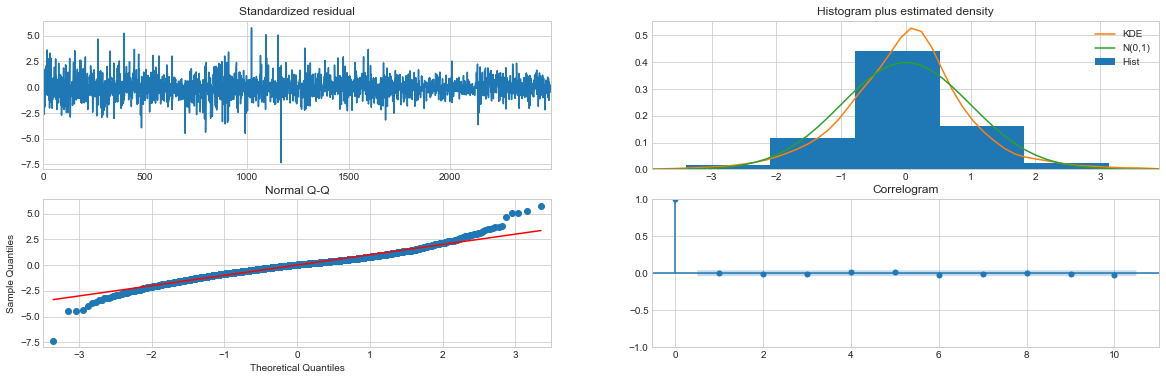

In [685]:
best_low_model2.plot_diagnostics(figsize=(20,6));

In [686]:
#perform Ljung-Box test on residuals with lag=5
sm.stats.acorr_ljungbox(best_low_model2.resid(), lags=[1], return_df=True)

lb_stat  lb_pvalue
1  0.011927   0.913034

In [687]:
best_low_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2496
Model:               SARIMAX(0, 1, 1)   Log Likelihood                7539.122
Date:                Thu, 16 Dec 2021   AIC                         -15072.245
Time:                        02:25:30   BIC                         -15054.779
Sample:                             0   HQIC                        -15065.903
                               - 2496                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0001      0.000     -0.433      0.665      -0.001       0.000
ma.L1          0.1342      0.017      7.748      0.000       0.100       0.168
sigma2         0.0001   2.35e-06     59.124      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1442.19
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [440]:
best_high_model = pm.ARIMA(order=(0, 1, 1)).fit( high_set['High_recip'] )

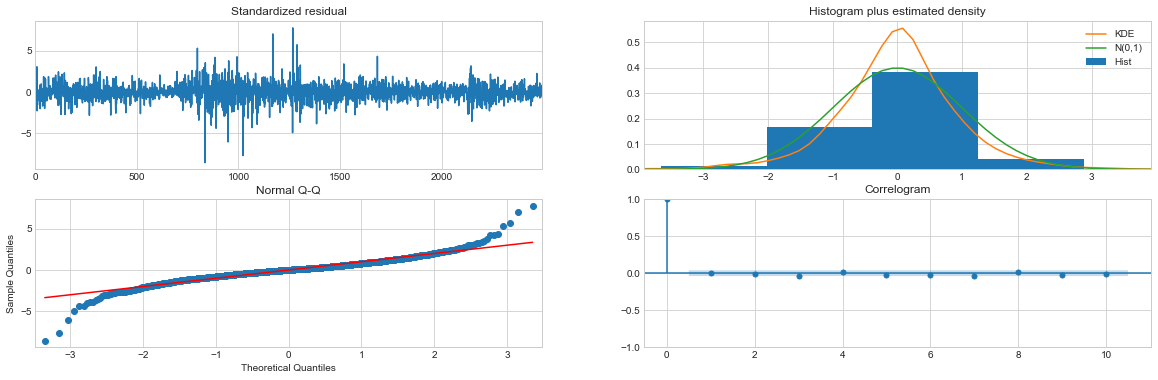

In [214]:
best_high_model.plot_diagnostics(figsize=(20,6));

In [302]:
#perform Ljung-Box test on residuals with lag=5
sm.stats.acorr_ljungbox(best_high_model.resid(), lags=[1], return_df=True)

lb_stat  lb_pvalue
1  0.151649   0.696964

In [220]:
best_high_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2496
Model:               SARIMAX(0, 1, 1)   Log Likelihood               10328.649
Date:                Sat, 11 Dec 2021   AIC                         -20651.297
Time:                        20:13:53   BIC                         -20633.831
Sample:                             0   HQIC                        -20644.956
                               - 2496                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.618e-05   8.68e-05      0.302      0.763      -0.000       0.000
ma.L1          0.1090      0.014      7.833      0.000       0.082       0.136
sigma2      1.482e-05   1.87e-07     79.041      0.000    1.45e-05    1.52e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7307.98
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [441]:
best_low_model = pm.ARIMA(order=(0, 1, 1)).fit( low_set['Low_sqrt'] )

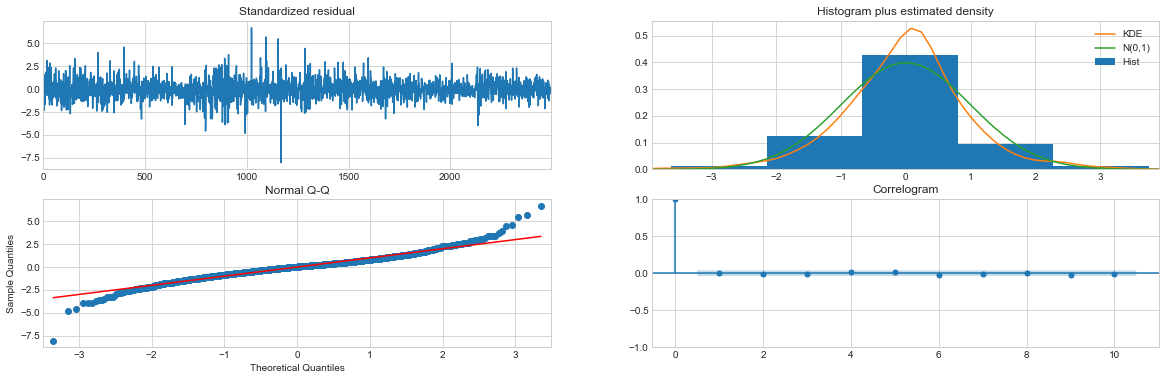

In [222]:
best_low_model.plot_diagnostics(figsize=(20,6));

In [301]:
#perform Ljung-Box test on residuals with lag=5
sm.stats.acorr_ljungbox(best_low_model.resid(), lags=[1], return_df=True)

lb_stat  lb_pvalue
1  0.000873   0.976428

In [227]:
best_low_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2496
Model:               SARIMAX(0, 1, 1)   Log Likelihood               11623.624
Date:                Sat, 11 Dec 2021   AIC                         -23241.247
Time:                        20:20:39   BIC                         -23223.781
Sample:                             0   HQIC                        -23234.906
                               - 2496                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.897e-05   5.18e-05     -0.366      0.714      -0.000    8.26e-05
ma.L1          0.1315      0.016      8.096      0.000       0.100       0.163
sigma2      5.246e-06   8.25e-08     63.563      0.000    5.08e-06    5.41e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2296.20
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Forecast

In [750]:
# rmse_high_recip011': 0.004013311126382556

# rmse_low_sq011': 0.003965062889338473

In [711]:
def rolling_validation_one_step(model,train,test):
    
    Train = train.copy()
    Test = test.copy()
    predictions = []
    confindent_interval = []
    size = len(test)
    
    model.fit(Train)
    
    for i in range(size):
        pred,CI= model.predict(1,return_conf_int=True)
        predictions.append(pred)
        confindent_interval.append(CI)
        Train = Train.append(Test[i:i+1])
        model.fit(Train)
        
    return invert_recipical_transformer(np.array(predictions)),invert_recipical_transformer(np.array(confindent_interval))

In [722]:
best_model_high1 = pm.ARIMA(order=(0, 1, 1))

pred_high,CI_high = rolling_validation_one_step(model=best_model_high1,
                                        train=high_set['High_recip'],
                                        test=test_high_set['High_recip'])

In [723]:
date_test = pd.date_range('2021-07-27','2021-11-29',freq='B')

In [748]:
results_high1 = pd.DataFrame({'Date':date_test,
                              'Actual':test_high_set['High'],
                              'Predictions':pred_high.flatten(),
                              'Confindent Interval': list(CI_high)})

results_high1.set_index('Date', inplace=True)

In [749]:
results_high1

Actual  Predictions                         Confindent Interval
Date                                                                        
2021-07-27  1.18411     1.182089  [[1.1927266272213488, 1.1716394739247176]]
2021-07-28  1.18494     1.184295   [[1.194970503896715, 1.1738082175807674]]
2021-07-29  1.18927     1.184975  [[1.1956605708229662, 1.1744781680931955]]
2021-07-30  1.19087     1.189706  [[1.2004772082482018, 1.1791269069383097]]
2021-08-02  1.18969     1.190963  [[1.2017550296344948, 1.1803636802252953]]
...             ...          ...                                         ...
2021-11-23  1.12750     1.128076  [[1.1376594058242748, 1.1186524811949612]]
2021-11-24  1.12554     1.127386   [[1.136956388301873, 1.1179763216569665]]
2021-11-25  1.12299     1.125287  [[1.1348190508141722, 1.1159127818346164]]
2021-11-26  1.13303     1.122686   [[1.132173343397273, 1.1133571849320307]]
2021-11-29  1.13117     1.134127    [[1.143815526268184, 1.124600632591591]]

[90 rows x 3 columns]

In [751]:
def rolling_validation_one_step(model,train,test):
    
    Train = train.copy()
    Test = test.copy()
    predictions = []
    confindent_interval = []
    size = len(test)
    
    model.fit(Train)
    
    for i in range(size):
        pred,CI= model.predict(1,return_conf_int=True)
        predictions.append(pred)
        confindent_interval.append(CI)
        Train = Train.append(Test[i:i+1])
        model.fit(Train)
        
    return invert_sq_transformer(np.array(predictions)),invert_sq_transformer(np.array(confindent_interval))

In [752]:
best_model_low1 = pm.ARIMA(order=(0, 1, 1))

pred_low,CI_low = rolling_validation_one_step(model=best_model_low1,
                                        train=low_set['Low_sq'],
                                        test=test_low_set['Low_sq'])

In [753]:
date_test = pd.date_range('2021-07-27','2021-11-29',freq='B')

In [754]:
results_low1 = pd.DataFrame({'Date':date_test,
                              'Actual':test_low_set['Low'],
                              'Predictions':pred_low.flatten(),
                              'Confindent Interval': list(CI_low)})

results_low1.set_index('Date', inplace=True)

In [755]:
results_low1

Actual  Predictions                         Confindent Interval
Date                                                                        
2021-07-27  1.17701     1.176436   [[1.166574279085906, 1.1862149802021165]]
2021-07-28  1.17721     1.177038  [[1.1671837194799082, 1.1868104940987048]]
2021-07-29  1.18402     1.177184  [[1.1673330639443615, 1.1869534768303347]]
2021-07-30  1.18517     1.184889   [[1.1751004105880776, 1.194596574879321]]
2021-08-02  1.18590     1.185162  [[1.1753784756163739, 1.1948662498834404]]
...             ...          ...                                         ...
2021-11-23  1.12260     1.122880  [[1.1126495123776698, 1.1330175503555389]]
2021-11-24  1.11861     1.122491  [[1.1122588989395077, 1.1326301066168774]]
2021-11-25  1.11954     1.118015  [[1.1077423167459874, 1.1281932869677038]]
2021-11-26  1.12044     1.119671   [[1.1094162071827371, 1.129833355180963]]
2021-11-29  1.12582     1.120470  [[1.1102246413449093, 1.1306233645741635]]

[90 rows x 3 columns]

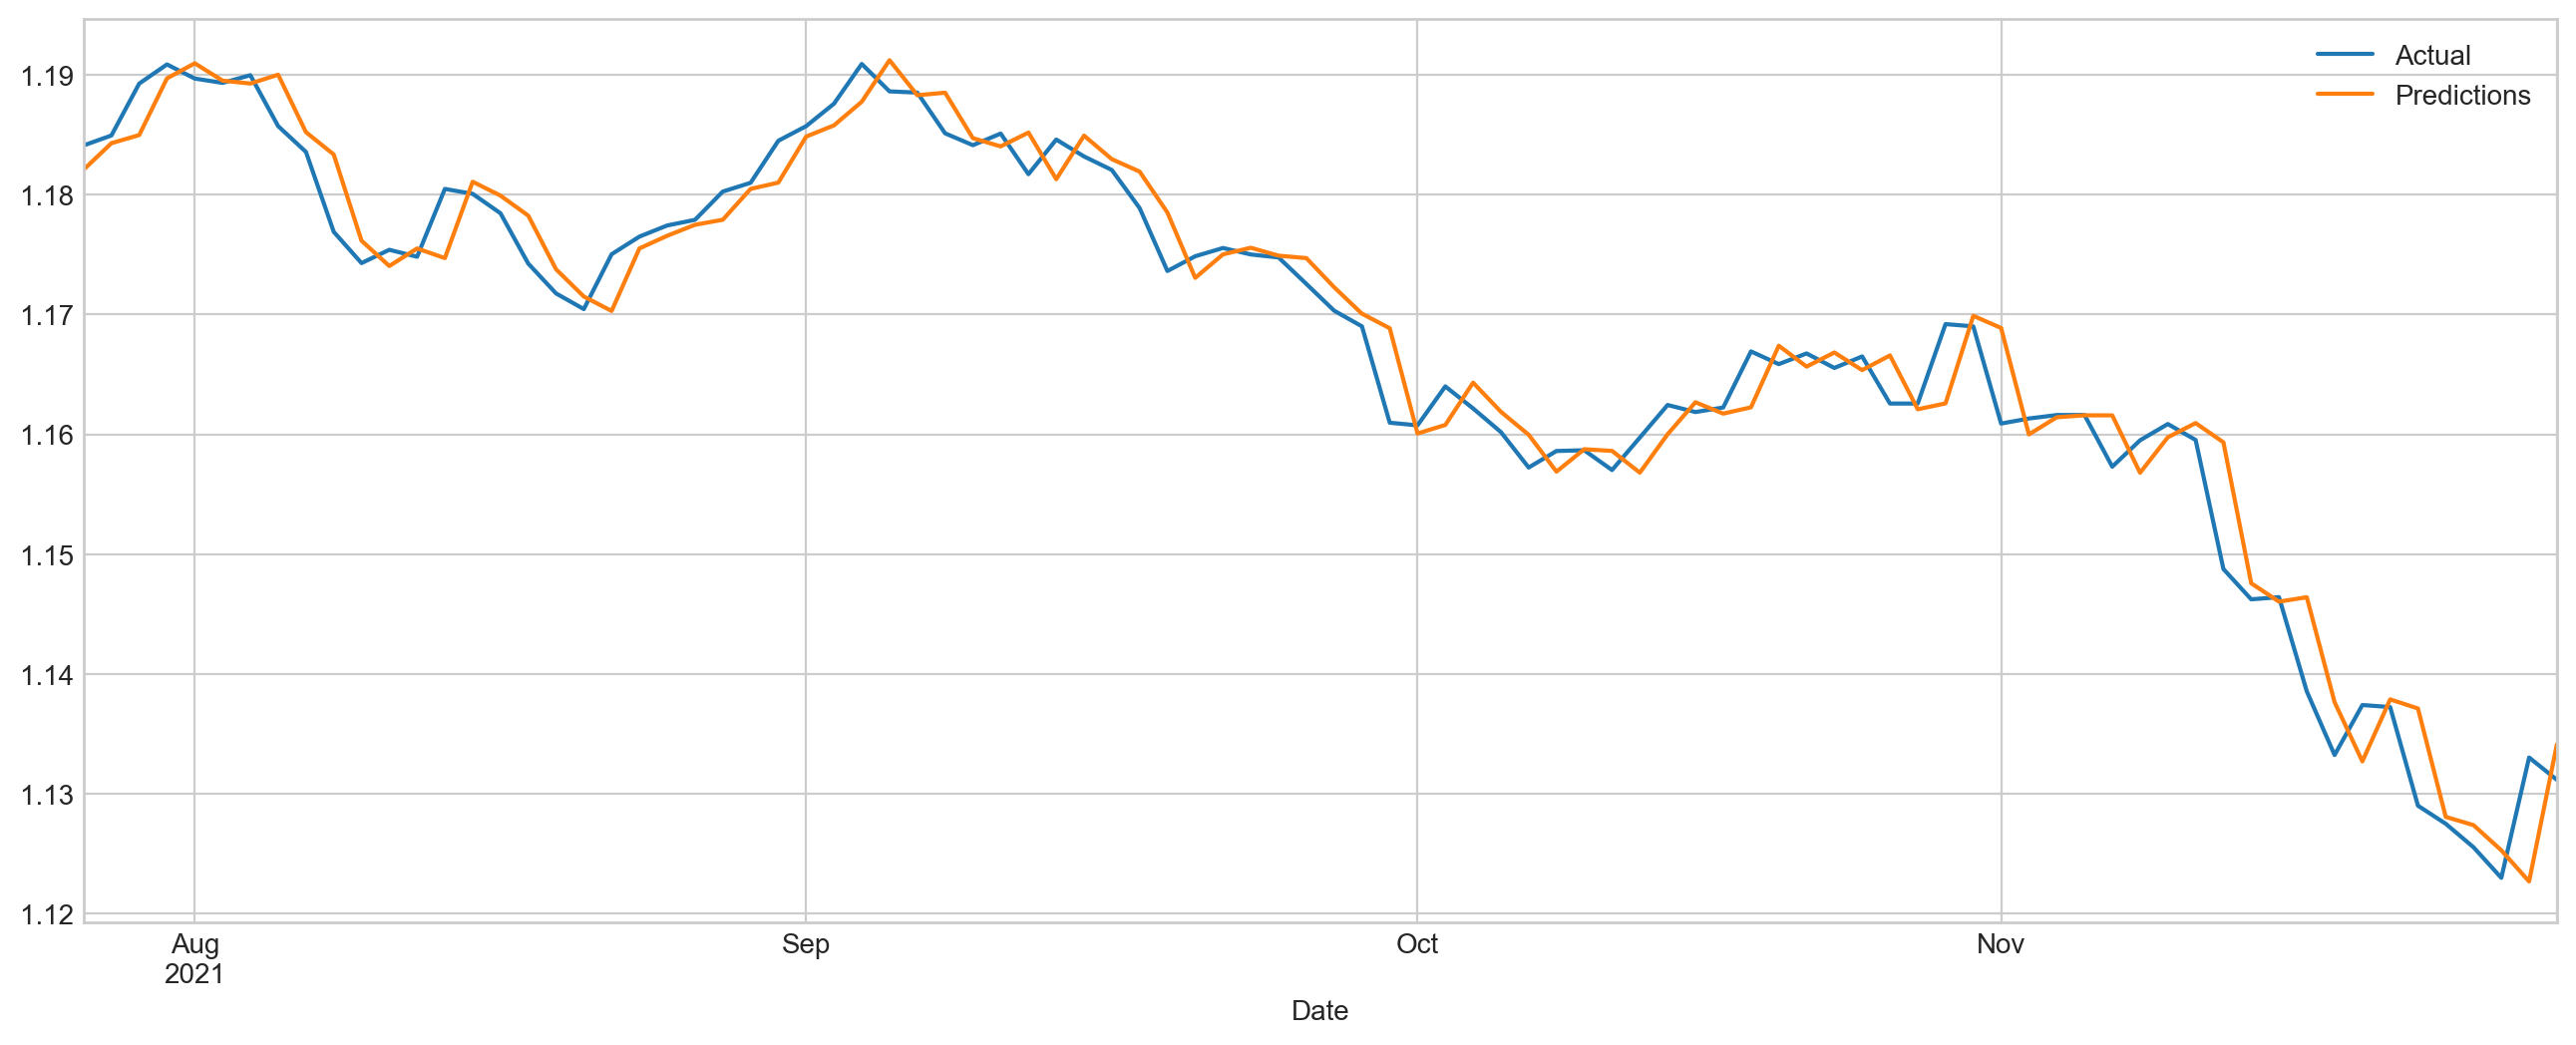

In [756]:
fig, axes = plt.subplots(figsize = (16,6),dpi=200)

results_high1[['Actual','Predictions']].plot(ax=axes);

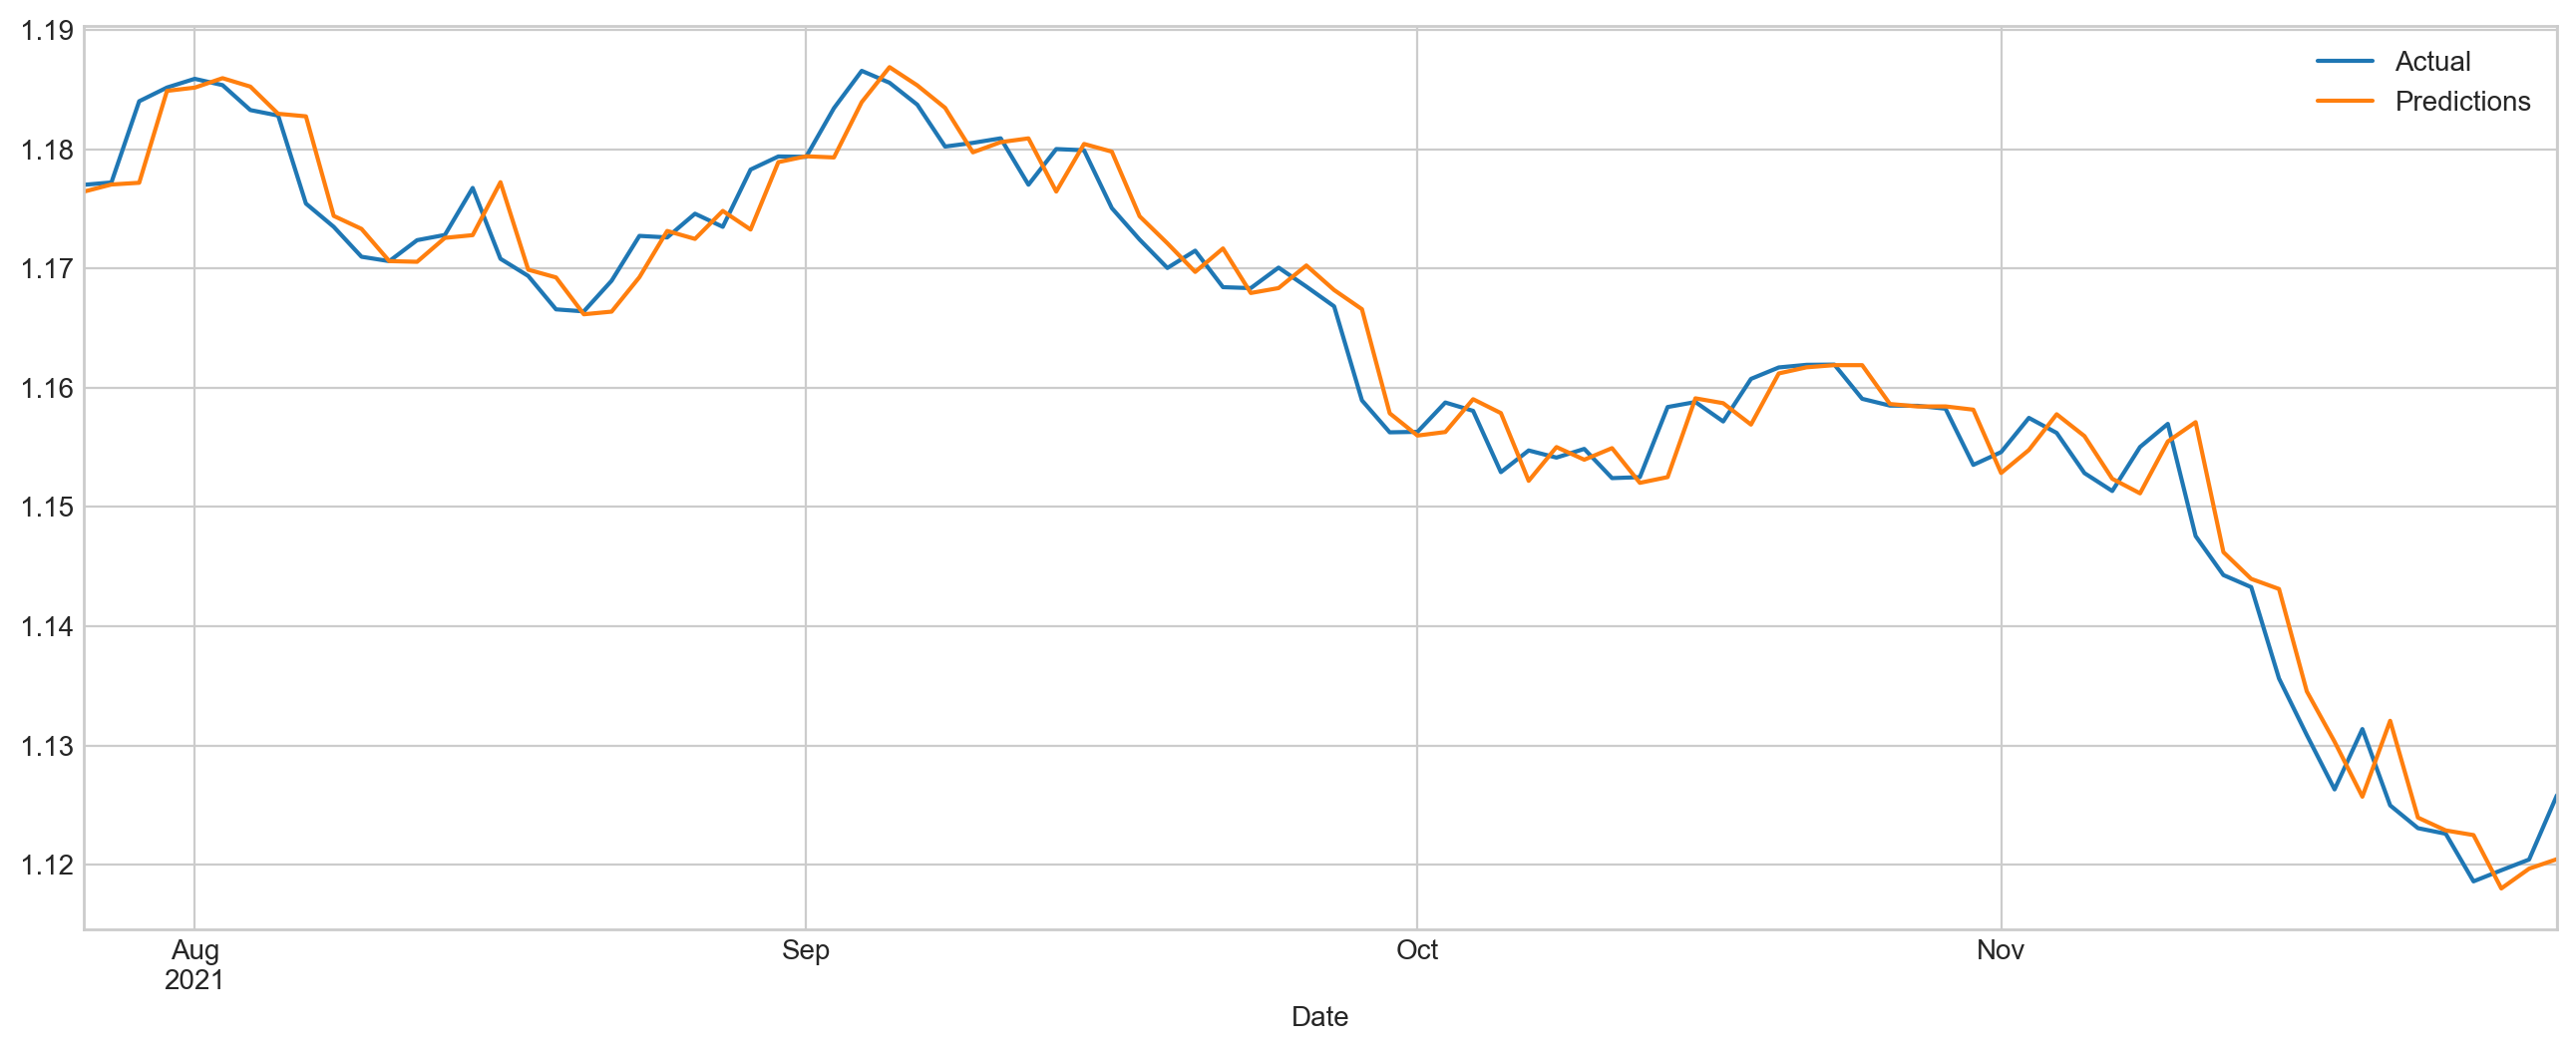

In [757]:
fig, axes = plt.subplots(figsize = (16,6),dpi=200)

results_low1[['Actual','Predictions']].plot(ax=axes);

In [758]:
mean_squared_error(results_high1['Actual'],results_high1['Predictions'],squared=False)

0.0033376195543601333

In [759]:
mean_squared_error(results_low1['Actual'],results_low1['Predictions'],squared=False)

0.0031458967115303455

In [966]:
results_high1[89:90]

Actual  Predictions                       Confindent Interval
Date                                                                      
2021-11-29  1.13117     1.134127  [[1.143815526268184, 1.124600632591591]]

In [967]:
results_low1[89:90]

Actual  Predictions                         Confindent Interval
Date                                                                        
2021-11-29  1.12582      1.12047  [[1.1102246413449093, 1.1306233645741635]]

In [538]:
ths = test_high_set['High_recip'].copy()
pred = []
confindent_inteval = []
new_train =Train
for i in range(len(ths)):
    pred1,CI = model.predict(1,return_conf_int=True)
    pred.append(pred1)
    confindent_inteval.append(CI)
    new_train = new_train.append(ths[i:i+1])
    model = pm.ARIMA(order=(0, 1, 1)).fit(new_train)
    

In [523]:
high_set['High_recip']

Date
2012-01-02    0.771123
2012-01-03    0.764748
2012-01-04    0.765000
2012-01-05    0.772595
2012-01-06    0.780512
                ...   
2021-07-20    0.847278
2021-07-21    0.847120
2021-07-22    0.845287
2021-07-23    0.848428
2021-07-26    0.846217
Freq: B, Name: High_recip, Length: 2496, dtype: float64

In [540]:
len(pred)

90

In [539]:
for i in pred:
    print(invert_recipical_transformer(i))

[1.18208902]
[1.18429483]
[1.18497471]
[1.18970628]
[1.19096331]
[1.18951691]
[1.18927527]
[1.19001178]
[1.18521805]
[1.18335426]
[1.17616019]
[1.17404682]
[1.17551002]
[1.17470593]
[1.18107866]
[1.17992286]
[1.17825166]
[1.1737749]
[1.17150028]
[1.17029525]
[1.17551264]
[1.17657038]
[1.17748669]
[1.17790785]
[1.18048172]
[1.18100923]
[1.18484871]
[1.18578058]
[1.18775442]
[1.19122413]
[1.18830077]
[1.18850984]
[1.18471403]
[1.18403045]
[1.18518229]
[1.18129419]
[1.18492782]
[1.18296441]
[1.18192504]
[1.17851053]
[1.17305855]
[1.17501959]
[1.17557027]
[1.1749106]
[1.17470541]
[1.17227552]
[1.17006662]
[1.16885452]
[1.16006855]
[1.16078276]
[1.16431317]
[1.1618828]
[1.15996246]
[1.15688786]
[1.15875672]
[1.158618]
[1.156802]
[1.16000979]
[1.16267705]
[1.1617289]
[1.16225471]
[1.16739429]
[1.16565171]
[1.16683045]
[1.16535831]
[1.16658512]
[1.16209071]
[1.16258128]
[1.16989023]
[1.16887445]
[1.15999159]
[1.16142385]
[1.16158896]
[1.16158202]
[1.15679102]
[1.15975456]
[1.16093933]
[1.1593

In [541]:
results_high.head()

Actual  Predictions
Date                            
2021-07-30  1.19087     1.191873
2021-08-02  1.18969     1.193147
2021-08-03  1.18933     1.191097
2021-08-04  1.18997     1.190385
2021-08-05  1.18572     1.190959

In [470]:
hs = high_set['High_recip'].copy()
hs

Date
2012-01-02    0.771123
2012-01-03    0.764748
2012-01-04    0.765000
2012-01-05    0.772595
2012-01-06    0.780512
                ...   
2021-07-20    0.847278
2021-07-21    0.847120
2021-07-22    0.845287
2021-07-23    0.848428
2021-07-26    0.846217
Freq: B, Name: High_recip, Length: 2496, dtype: float64

In [471]:
ths = test_high_set['High_recip'].copy()
ths

Date
2021-07-27    0.844516
2021-07-28    0.843925
2021-07-29    0.840852
2021-07-30    0.839722
2021-08-02    0.840555
                ...   
2021-11-23    0.886918
2021-11-24    0.888462
2021-11-25    0.890480
2021-11-26    0.882589
2021-11-29    0.884040
Freq: B, Name: High_recip, Length: 90, dtype: float64

In [490]:
hs.append(ths[0:1])

Date
2012-01-02    0.771123
2012-01-03    0.764748
2012-01-04    0.765000
2012-01-05    0.772595
2012-01-06    0.780512
                ...   
2021-07-21    0.847120
2021-07-22    0.845287
2021-07-23    0.848428
2021-07-26    0.846217
2021-07-27    0.844516
Name: High_recip, Length: 2497, dtype: float64

In [489]:
ths[0:2]

Date
2021-07-27    0.844516
2021-07-28    0.843925
Freq: B, Name: High_recip, dtype: float64

In [463]:
ths[2]

0.8408519511969527

In [493]:
ths[0:0+1]

Date
2021-07-27    0.844516
Freq: B, Name: High_recip, dtype: float64

#  $\color{red}{\textbf{6 Outliers}}$

In [289]:
date_residuals = pd.date_range('2012-01-02','2021-07-26',freq='B')

In [290]:
# residuals High dataframe
residuals_high_df = pd.DataFrame({'Date':date_residuals,'residuals':best_high_model.resid()})
residuals_high_df['Date']  = pd.to_datetime( residuals_high_df['Date'] )
residuals_high_df.set_index('Date', inplace=True)

In [291]:
residuals_high_df.head()

residuals
Date                 
2012-01-02   0.771097
2012-01-03  -0.006401
2012-01-04   0.000915
2012-01-05   0.007469
2012-01-06   0.007078

In [292]:
UB_high = residuals_high_df['residuals'].mean() + 2*residuals_high_df['residuals'].std()
LB_high = residuals_high_df['residuals'].mean() - 2*residuals_high_df['residuals'].std()

residuals_high_df['residuals'].describe()

count    2496.000000
mean        0.000312
std         0.015908
min        -0.032962
25%        -0.001884
50%         0.000075
75%         0.001895
max         0.771097
Name: residuals, dtype: float64

In [293]:
residuals_high_df[residuals_high_df['residuals'] < LB_high]

residuals
Date                 
2015-03-18  -0.032962

In [294]:
residuals_high_df[residuals_high_df['residuals'] > UB_high]

residuals
Date                 
2012-01-02   0.771097

In [295]:
# residuals Low dataframe
residuals_low_df = pd.DataFrame({'Date':date_residuals,'residuals':best_low_model.resid()})
residuals_low_df['Date']  = pd.to_datetime( residuals_low_df['Date'] )
residuals_low_df.set_index('Date', inplace=True)

In [296]:
residuals_low_df.head()

residuals
Date                 
2012-01-02   1.136540
2012-01-03   0.000670
2012-01-04  -0.001572
2012-01-05  -0.005388
2012-01-06  -0.002507

In [297]:
UB_low = residuals_low_df['residuals'].mean() + 2*residuals_low_df['residuals'].std()
LB_low = residuals_low_df['residuals'].mean() - 2*residuals_low_df['residuals'].std()

residuals_low_df['residuals'].describe()

count    2496.000000
mean        0.000454
std         0.022864
min        -0.018447
25%        -0.001228
50%         0.000088
75%         0.001158
max         1.136540
Name: residuals, dtype: float64

In [298]:
residuals_low_df[residuals_low_df['residuals'] < LB_low]

Empty DataFrame
Columns: [residuals]
Index: []

In [299]:
residuals_low_df[residuals_low_df['residuals'] > UB_low]

residuals
Date                 
2012-01-02    1.13654

In [300]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
shapiro(residuals_high_df['residuals'])

ShapiroResult(statistic=0.09251344203948975, pvalue=0.0)

# $\color{red}{\textbf{6 Conclusion}}$

In [439]:
date_test = pd.date_range('2021-07-30','2021-11-29',freq='B')

In [321]:
best_high_model # recipical

ARIMA(order=(0, 1, 1))

In [322]:
best_low_model

ARIMA(order=(0, 1, 1))

In [366]:
cv = model_selection.RollingForecastCV(h=1,step=1,initial=3) #

predictions = cross_val_predict( best_high_model , test_high_set['High_recip'], cv=cv, return_raw_predictions=True)

In [367]:
predictions_high = predictions[3:] # test_high_set[3:]

In [368]:
results_high = pd.DataFrame({'Date':date_test,
                            'Actual':list(test_high_set[3:]['High']),
                            'Predictions':(list(invert_recipical_transformer(predictions_high).flatten()))})

results_high.set_index('Date', inplace=True)

In [369]:
results_high

Actual  Predictions
Date                            
2021-07-30  1.19087     1.191873
2021-08-02  1.18969     1.193147
2021-08-03  1.18933     1.191097
2021-08-04  1.18997     1.190385
2021-08-05  1.18572     1.190959
...             ...          ...
2021-11-23  1.12750     1.127118
2021-11-24  1.12554     1.126933
2021-11-25  1.12299     1.124682
2021-11-26  1.13303     1.122056
2021-11-29  1.13117     1.133977

[87 rows x 2 columns]

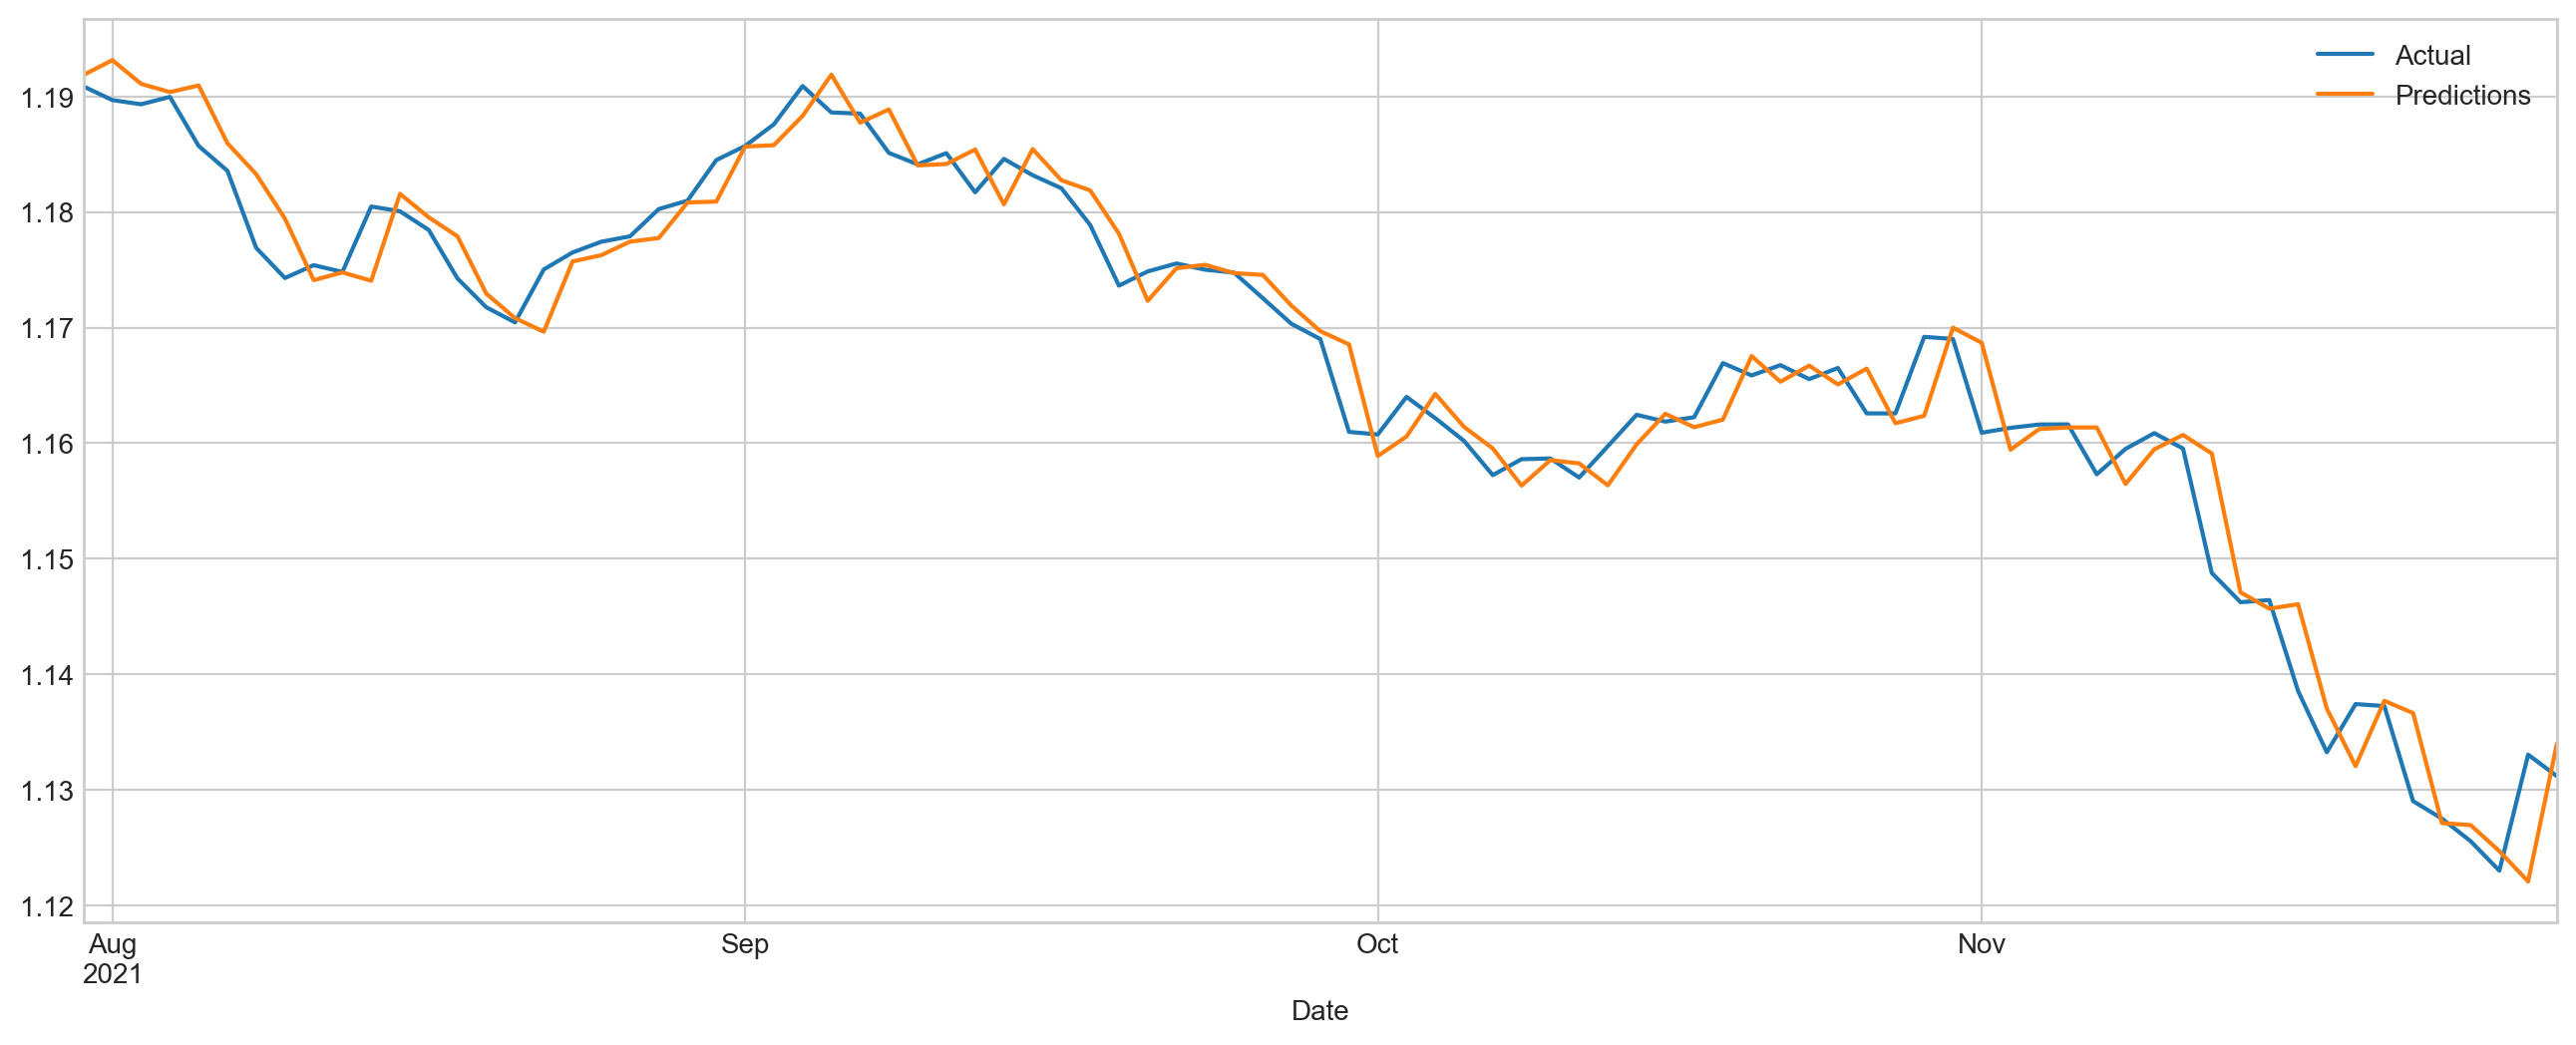

In [370]:
fig, axes = plt.subplots(figsize = (16,6),dpi=200)

results_high.plot(ax=axes);

In [372]:
mean_squared_error(results_high['Actual'],results_high['Predictions'],squared=False)

0.0034581537690185236

In [373]:
cv = model_selection.RollingForecastCV(h=1,step=1,initial=3) #

predictions2 = cross_val_predict( best_low_model , test_low_set['Low_sqrt'], cv=cv, return_raw_predictions=True)

In [374]:
predictions_low = predictions2[3:] 

In [375]:
results_low = pd.DataFrame({'Date':date_test,
                            'Actual':list(test_low_set[3:]['Low']),
                            'Predictions':(list(invert_sqrt_transformer(predictions_low).flatten()))})

results_low.set_index('Date', inplace=True)

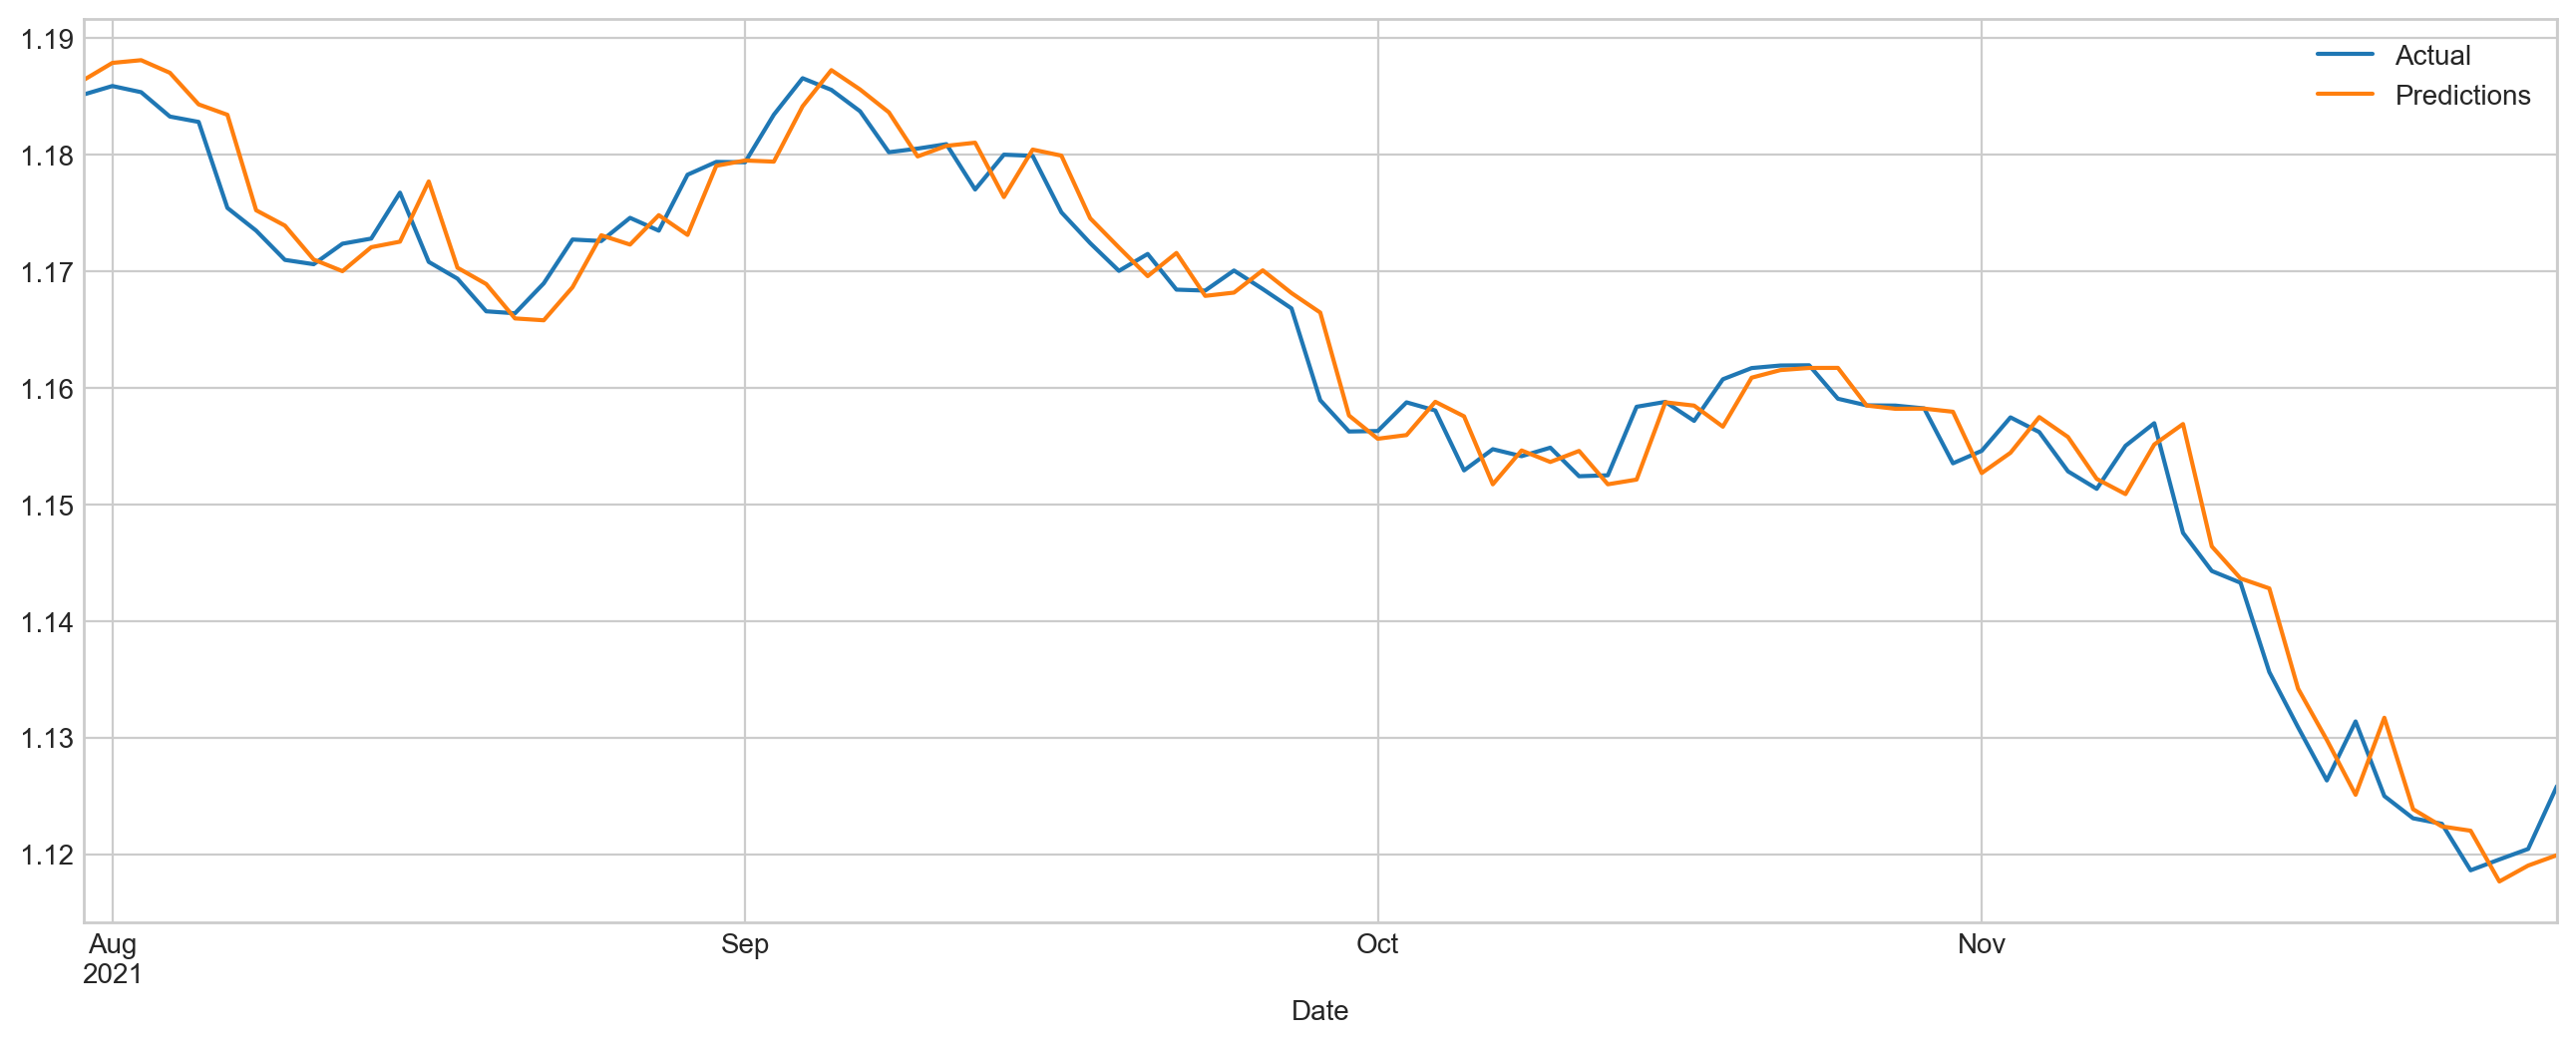

In [376]:
fig, axes = plt.subplots(figsize = (16,6),dpi=200)

results_low.plot(ax=axes);

In [377]:
mean_squared_error(results_low['Actual'],results_low['Predictions'],squared=False)

0.003227370030043178

In [381]:
results_high.head(),results_low.head()

(             Actual  Predictions
 Date                            
 2021-07-30  1.19087     1.191873
 2021-08-02  1.18969     1.193147
 2021-08-03  1.18933     1.191097
 2021-08-04  1.18997     1.190385
 2021-08-05  1.18572     1.190959,
              Actual  Predictions
 Date                            
 2021-07-30  1.18517     1.186413
 2021-08-02  1.18590     1.187884
 2021-08-03  1.18537     1.188117
 2021-08-04  1.18328     1.187034
 2021-08-05  1.18282     1.184323)

# $\color{red}{\textbf{7 Weaknesses}}$

In [ ]:
residuals = (np.array(self.y) - np.array(self.yhat))[0]
        rss = sum(residuals**2)
        k= self.model_order[0]+self.model_order[1]+self.model_order[2] + 1 # p + d + q + 1
        n = len(self.yhat)
        self.AIC = round( 2*k + n*( np.log( 2*(np.pi)*rss/n)+1),7 )

In [348]:
invert_recipical_transformer(predictions_high)

array([[1.1918734 ],
       [1.19314671],
       [1.19109708],
       [1.19038456],
       [1.19095851],
       [1.18595729],
       [1.18328034],
       [1.17943291],
       [1.17410872],
       [1.17477573],
       [1.17405251],
       [1.18157644],
       [1.17954509],
       [1.17789768],
       [1.17294345],
       [1.17082078],
       [1.1696374 ],
       [1.17571938],
       [1.17626693],
       [1.17743874],
       [1.17775122],
       [1.18083035],
       [1.18090703],
       [1.18566704],
       [1.18579091],
       [1.18832163],
       [1.19188914],
       [1.18773708],
       [1.18888113],
       [1.18403888],
       [1.18415966],
       [1.18541136],
       [1.18066755],
       [1.18544925],
       [1.18275095],
       [1.18187698],
       [1.17812852],
       [1.1723115 ],
       [1.17513847],
       [1.17543464],
       [1.17471641],
       [1.174561  ],
       [1.17189032],
       [1.16969427],
       [1.16854409],
       [1.15888104],
       [1.16057426],
       [1.164

In [407]:
x,y = best_high_model.predict(10,return_conf_int=True,alpha=0.50)
invert_recipical_transformer(x),invert_recipical_transformer(y)

(array([1.18208902, 1.18205243, 1.18201584, 1.18197926, 1.18194268,
        1.18190611, 1.18186953, 1.18183296, 1.18179639, 1.18175982]),
 array([[1.1857283 , 1.178472  ],
        [1.18749476, 1.17665975],
        [1.1888021 , 1.17530662],
        [1.18988713, 1.17417581],
        [1.19083397, 1.17318319],
        [1.19168416, 1.17228721],
        [1.19246184, 1.17146374],
        [1.19318251, 1.17069728],
        [1.19385683, 1.16997718],
        [1.1944925 , 1.16929572]]))

In [409]:
x,y = best_low_model.predict(10,return_conf_int=True,alpha=0.50)
invert_sqrt_transformer(x),invert_sqrt_transformer(y)

(array([1.17644003, 1.17639889, 1.17635774, 1.1763166 , 1.17627546,
        1.17623432, 1.17619317, 1.17615203, 1.17611089, 1.17606976]),
 array([[1.17309121, 1.17979363],
        [1.17134394, 1.18146472],
        [1.170043  , 1.18268948],
        [1.16895535, 1.18370096],
        [1.16799958, 1.18458055],
        [1.16713579, 1.18536817],
        [1.16634086, 1.18608693],
        [1.1656    , 1.18675161],
        [1.16490307, 1.18737238],
        [1.16424273, 1.18795655]]))

In [386]:
test_low_set.head()

Low  Day   Low_log  Low_recip  Low_sqrt    Low_sq   Low_box  \
Date                                                                          
2021-07-27  1.17701    1  0.162977   0.849610  1.084901  1.385353  0.122359   
2021-07-28  1.17721    2  0.163147   0.849466  1.084993  1.385823  0.122452   
2021-07-29  1.18402    3  0.168915   0.844580  1.088127  1.401903  0.125571   
2021-07-30  1.18517    4  0.169886   0.843761  1.088655  1.404628  0.126089   
2021-08-02  1.18590    0  0.170502   0.843241  1.088990  1.406359  0.126417   

            Low_DIFF1  Low_log_DIFF1  Low_recip_DIFF1  Low_sqrt_DIFF1  \
Date                                                                    
2021-07-27    0.00066       0.000561        -0.000477        0.000304   
2021-07-28    0.00020       0.000170        -0.000144        0.000092   
2021-07-29    0.00681       0.005768        -0.004886        0.003134   
2021-07-30    0.00115       0.000971        -0.000820        0.000528   
2021-08-02    0.00073       0.000616        -0.000519        0.000335   

            Low_sq_DIFF1  Low_box_DIFF1  
Date                                     
2021-07-27      0.001553       0.000307  
2021-07-28      0.000471       0.000093  
2021-07-29      0.016080       0.003119  
2021-07-30      0.002725       0.000518  
2021-08-02      0.001731       0.000328

In [391]:
results_high.head()

Actual  Predictions
Date                            
2021-07-30  1.19087     1.191873
2021-08-02  1.18969     1.193147
2021-08-03  1.18933     1.191097
2021-08-04  1.18997     1.190385
2021-08-05  1.18572     1.190959

In [608]:
# custom rolling function

def rolling_cv(train_set,min_train_size,horizon):
    
    for i in range(len(train_set)-min_train_size-horizon+1):
        split_train = train_set[:min_train_size+i]
        split_val = train_set[min_train_size+i:min_train_size+horizon]
        yield split_train, split_val

In [616]:
# valid score metric
def cross_val_score(model,train,cv,metric):
    
    cv_scores = []
    predictions = []
    for cv_train, cv_test in cv:
        model.fit(cv_train)
        preds = model.predict(1)
        predictions.append(preds)
        score = metric(y_true=invert_recipical_transformer(cv_test),y_pred=invert_recipical_transformer(preds))
        cv_scores.append(score)
        
    return cv_scores,predictions

In [617]:
Train = high_set['High_recip'].copy()
Test =  test_high_set['High_recip'].copy()
model = pm.ARIMA(order=(0, 1, 1))

In [618]:
size_Train = len(Train)
size_Train

2496

In [619]:
size_Test = len(Test)
size_Test

90

In [620]:
my_set = Train.append(Test)
my_set

Date
2012-01-02    0.771123
2012-01-03    0.764748
2012-01-04    0.765000
2012-01-05    0.772595
2012-01-06    0.780512
                ...   
2021-11-23    0.886918
2021-11-24    0.888462
2021-11-25    0.890480
2021-11-26    0.882589
2021-11-29    0.884040
Name: High_recip, Length: 2586, dtype: float64

In [647]:
def rolling_validation_one_step(model,train,test):
    
    Train = train.copy()
    Test = test.copy()
    predictions = []
    size = len(test)
    
    model.fit(Train)
    
    for i in range(size):
        pred= model.predict(1)
        predictions.append(pred)
        Train = Train.append(Test[i:i+1])
        model.fit(Train)
        
    return predictions   

In [645]:
model = pm.ARIMA(order=(0, 1, 1))
Train = high_set['High_recip'].copy()
Test = test_high_set['High_recip'].copy()

x = rolling_validation_one_step(model,Train,Test)

In [646]:
invert_recipical_transformer(np.array(x))

array([[1.18208902],
       [1.18429483],
       [1.18497471],
       [1.18970628],
       [1.19096331],
       [1.18951691],
       [1.18927527],
       [1.19001178],
       [1.18521805],
       [1.18335426],
       [1.17616019],
       [1.17404682],
       [1.17551002],
       [1.17470593],
       [1.18107866],
       [1.17992286],
       [1.17825166],
       [1.1737749 ],
       [1.17150028],
       [1.17029525],
       [1.17551264],
       [1.17657038],
       [1.17748669],
       [1.17790785],
       [1.18048172],
       [1.18100923],
       [1.18484871],
       [1.18578058],
       [1.18775442],
       [1.19122413],
       [1.18830077],
       [1.18850984],
       [1.18471403],
       [1.18403045],
       [1.18518229],
       [1.18129419],
       [1.18492782],
       [1.18296441],
       [1.18192504],
       [1.17851053],
       [1.17305855],
       [1.17501959],
       [1.17557027],
       [1.1749106 ],
       [1.17470541],
       [1.17227552],
       [1.17006662],
       [1.168

In [642]:
invert_recipical_transformer(np.array(x))

array([[1.18208902],
       [1.18429483],
       [1.18497471],
       [1.18970628],
       [1.19096331],
       [1.18951691],
       [1.18927527],
       [1.19001178],
       [1.18521805],
       [1.18335426],
       [1.17616019],
       [1.17404682],
       [1.17551002],
       [1.17470593],
       [1.18107866],
       [1.17992286],
       [1.17825166],
       [1.1737749 ],
       [1.17150028],
       [1.17029525],
       [1.17551264],
       [1.17657038],
       [1.17748669],
       [1.17790785],
       [1.18048172],
       [1.18100923],
       [1.18484871],
       [1.18578058],
       [1.18775442],
       [1.19122413],
       [1.18830077],
       [1.18850984],
       [1.18471403],
       [1.18403045],
       [1.18518229],
       [1.18129419],
       [1.18492782],
       [1.18296441],
       [1.18192504],
       [1.17851053],
       [1.17305855],
       [1.17501959],
       [1.17557027],
       [1.1749106 ],
       [1.17470541],
       [1.17227552],
       [1.17006662],
       [1.168

In [ ]:
ths = test_high_set['High_recip'].copy()
pred = []
confindent_inteval = []
new_train =Train
for i in range(len(ths)):
    pred1,CI = model.predict(1,return_conf_int=True)
    pred.append(pred1)
    confindent_inteval.append(CI)
    new_train = new_train.append(ths[i:i+1])
    model = pm.ARIMA(order=(0, 1, 1)).fit(new_train)

In [ ]:
### High Arima models pm ###
arima_high_log_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_high_set['High_log'] )
arima_high_log_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_log'] )
arima_high_log_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_high_set['High_log'] )

arima_high_recip_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_high_set['High_recip'] )
arima_high_recip_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_recip'] )
arima_high_recip_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_high_set['High_recip'] )

arima_high_sqrt_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_high_set['High_sqrt'] )
arima_high_sqrt_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_sqrt'] )
arima_high_sqrt_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_high_set['High_sqrt'] )

arima_high_sq_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_high_set['High_sq'] )
arima_high_sq_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_sq'] )
arima_high_sq_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_high_set['High_sq'] )

arima_high_box_110 = pm.ARIMA(order=(1, 1, 0)).fit( train_high_set['High_box'] )
arima_high_box_011 = pm.ARIMA(order=(0, 1, 1)).fit( train_high_set['High_box'] )
arima_high_box_111 = pm.ARIMA(order=(1, 1, 1)).fit( train_high_set['High_box'] )